**Eric Meinhardt / emeinhardt@ucsd.edu**

In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Requirements</a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#glypy-basics" data-toc-modified-id="glypy-basics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>glypy</code> basics</a></span><ul class="toc-item"><li><span><a href="#Create-a-specific-glycan,-show-it-as-a-tree-and-in-linear-code" data-toc-modified-id="Create-a-specific-glycan,-show-it-as-a-tree-and-in-linear-code-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create a specific glycan, show it as a tree and in linear code</a></span></li><li><span><a href="#List-of-linear-code-expressions" data-toc-modified-id="List-of-linear-code-expressions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>List of linear code expressions</a></span></li><li><span><a href="#Declare-some-syntactic-categories" data-toc-modified-id="Declare-some-syntactic-categories-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Declare some syntactic categories</a></span></li></ul></li><li><span><a href="#Bottom-up-parsing" data-toc-modified-id="Bottom-up-parsing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bottom-up parsing</a></span><ul class="toc-item"><li><span><a href="#Parenthesis-checking" data-toc-modified-id="Parenthesis-checking-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Parenthesis checking</a></span></li><li><span><a href="#String-manipulation-boilerplate" data-toc-modified-id="String-manipulation-boilerplate-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>String manipulation boilerplate</a></span><ul class="toc-item"><li><span><a href="#Generating-contiguous-subsequences" data-toc-modified-id="Generating-contiguous-subsequences-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Generating contiguous subsequences</a></span></li><li><span><a href="#Generating-prefixes-and-suffixes" data-toc-modified-id="Generating-prefixes-and-suffixes-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Generating prefixes and suffixes</a></span></li><li><span><a href="#Deprefixing-and-desuffixing" data-toc-modified-id="Deprefixing-and-desuffixing-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Deprefixing and desuffixing</a></span></li><li><span><a href="#Circumfixing" data-toc-modified-id="Circumfixing-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Circumfixing</a></span></li><li><span><a href="#Decircumfixing" data-toc-modified-id="Decircumfixing-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Decircumfixing</a></span></li><li><span><a href="#Infixing" data-toc-modified-id="Infixing-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>Infixing</a></span></li><li><span><a href="#Deinfixing" data-toc-modified-id="Deinfixing-4.2.7"><span class="toc-item-num">4.2.7&nbsp;&nbsp;</span>Deinfixing</a></span></li></ul></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Conversion-to-json/s-expressions" data-toc-modified-id="Conversion-to-json/s-expressions-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Conversion to json/s-expressions</a></span></li><li><span><a href="#Krambeck-et-al.-2009's-ligand-&quot;...&quot;-uncertainty-operator" data-toc-modified-id="Krambeck-et-al.-2009's-ligand-&quot;...&quot;-uncertainty-operator-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Krambeck et al. 2009's <code>ligand</code> "..." uncertainty operator</a></span></li><li><span><a href="#Krambeck-et-al.-2009's-continuation-&quot;_&quot;-uncertainty-operator" data-toc-modified-id="Krambeck-et-al.-2009's-continuation-&quot;_&quot;-uncertainty-operator-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Krambeck et al. 2009's <code>continuation</code> "_" uncertainty operator</a></span></li><li><span><a href="#Identifying-what-continuation-wildcards-can-capture-that-ligand-wildcards-can't" data-toc-modified-id="Identifying-what-continuation-wildcards-can-capture-that-ligand-wildcards-can't-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Identifying what continuation wildcards can capture that ligand wildcards can't</a></span><ul class="toc-item"><li><span><a href="#Continuation-matches-are-a-superset-of-ligand-matches" data-toc-modified-id="Continuation-matches-are-a-superset-of-ligand-matches-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Continuation matches are a superset of ligand matches</a></span></li><li><span><a href="#What's-unique-to-continuation-matches?" data-toc-modified-id="What's-unique-to-continuation-matches?-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>What's unique to continuation matches?</a></span></li></ul></li><li><span><a href="#Krambeck-et-al.-2009's-possible-branch-point-&quot;-|-&quot;-uncertainty-operator" data-toc-modified-id="Krambeck-et-al.-2009's-possible-branch-point-&quot;-|-&quot;-uncertainty-operator-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Krambeck et al. 2009's <code>possible branch point</code> " | " uncertainty operator</a></span></li><li><span><a href="#Three-way-comparison" data-toc-modified-id="Three-way-comparison-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Three-way comparison</a></span></li></ul></li><li><span><a href="#One-off-example-analysis" data-toc-modified-id="One-off-example-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>One-off example analysis</a></span></li></ul></div>

# Motivation

**Purpose:** This is software-as-'tool for thinking' aimed at illuminating the not-always-clear or elaborated meaning of linear code's uncertainty operators. In particular, Krambeck et al. (2009)'s "_", "...", and " | " are the three examined here.

**Plan:** To accomplish this, the notebook builds on `glypy`. While `glypy` does not support linear code uncertainty operators, it does let you move between different representations of *individual glycan (types)*. After defining rules for identifying subsequences within the linear code expression of a glycan that match an uncertainty operator, this notebook then generates all nonempty matches for the operator within the glycan linear code expression.

## Requirements

 - `glypy` (and therefore Python 2)
 - `funcy`
 - `matplotlib`

# Imports

In [2]:
from funcy import *

In [3]:
from itertools import product

In [4]:
from copy import deepcopy

In [5]:
from collections import OrderedDict

In [6]:
from json import dumps

In [7]:
def pprint(dictionary):
    print(dumps(dictionary, indent=2))

In [8]:
import glypy

In [9]:
from glypy.plot import plot
%matplotlib inline

In [10]:
import glypy.io.linear_code

# `glypy` basics

The code in this section illustrates some of the basic `glypy` operations used elsewhere, defines some convenient functions for translating between `glypy` objects and linear code, plotting associated trees, and picks out the set of monosaccharide abbreviations that `glypy` understands.

## Create a specific glycan, show it as a tree and in linear code

In [11]:
#much of the code snippets in this subsection are taken directly from 
# the glypy docs

In [12]:
monosaccharides = glypy.monosaccharides

In [13]:
glcnac1 = monosaccharides["GlcNAc"]
glcnac2 = monosaccharides["GlcNAc"]

glcnac1.add_monosaccharide(glcnac2, position=4)
bdman = monosaccharides["bdMan"]
glcnac2.add_monosaccharide(bdman, position=4)
adman1 = monosaccharides["adMan"]
bdman.add_monosaccharide(adman1, position=3)
adman2 = monosaccharides["adMan"]
bdman.add_monosaccharide(adman2, position=6)

n_linked_core = glypy.Glycan(root=glcnac1)
print(n_linked_core)

RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n

RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n

RES 1b:b-dman-HEX-1:5

RES 1b:b-dman-HEX-1:5

RES
1b:b-dglc-HEX-1:5
2s:n-acetyl
3b:b-dglc-HEX-1:5
4s:n-acetyl
5b:b-dman-HEX-1:5
6b:a-dman-HEX-1:5
7b:a-dman-HEX-1:5
LIN
1:1d(2+1)2n
2:1o(4+-1)3d
3:3d(2+1)4n
4:3o(4+-1)5d
5:5o(3+-1)6d
6:5o(6+-1)7d



(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=3.061616997868383e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f20301afdd0>)

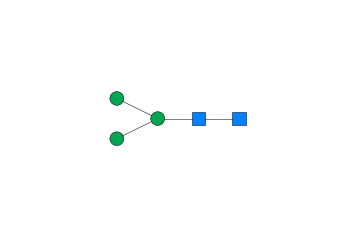

In [14]:
plot(n_linked_core)

In [15]:
glypy.io.linear_code.to_linear_code(n_linked_core)

'Ma6(Ma3)Mb4GNb4GNb'

(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=3.061616997868383e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2030104cd0>)

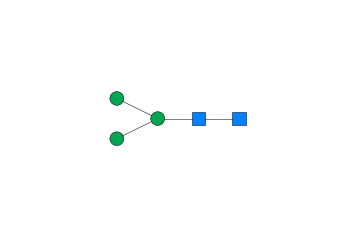

In [16]:
plot(glypy.io.linear_code.parse_linear_code('Ma6(Ma3)Mb4GNb4GNb'))

In [17]:
def gen(glycan):
    '''
    Abbreviation for 
      `glypy.io.linear_code.to_linear_code(glycan)`
    '''
    return glypy.io.linear_code.to_linear_code(glycan)

def parse(linear_code_expression):
    '''
    Abbreviation for 
      `glypy.io.linear_code.parse_linear_code(linear_code_expression)`
    '''
    return glypy.io.linear_code.parse_linear_code(linear_code_expression)

def parsePlot(linear_code_expression):
    '''
    Abbreviation for 
      `plot(glypy.io.linear_code.parse_linear_code(linear_code_expression))`
    '''
    plot(glypy.io.linear_code.parse_linear_code(linear_code_expression))

'GN?'

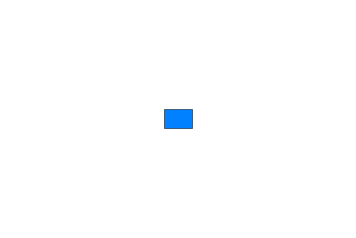

In [18]:
parsePlot('GN')
GN_parsed = parse('GN');
gen(GN_parsed)

In [19]:
GN_parsed

RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n

'GNb'

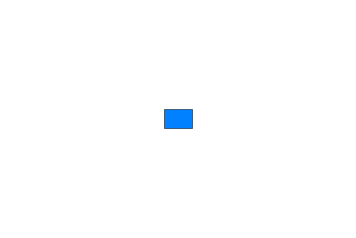

In [20]:
gen(monosaccharides["GlcNAc"])
parsePlot('GNb')

## List of linear code expressions

In [21]:
#Banin et al., 2002, Fig. 1
Bea2002Fig1 = ['GNb2Ma3(Ab4GNb2Ma6)Mb4GNb4(Fa6)GNa']

Bea2002B21 = ['Fa4GNb3Ab4Gb']
Bea2002B22 = ['GNb2Ma3(NNa3Ab3GNb2Ma6)Mb4GNb',
              'Ab3ANb4(NNa3)Ab4Gb',
              'Ab4(GNb4GNb3)(Ab4(Fa3)GNb6)Ab4Gb']
Bea2002B23 = ['{nGa6Ga4(-Ab3-)Ub2Ha3Ha3Ha3}'] #glypy chokes on this - see next cell
Bea2002B24 = ['GNb3Ab#4-Trifluoroacetamidophenol'] #glypy chokes on this - see next cell
Bea2002s = [Bea2002Fig1, Bea2002B21, Bea2002B22]#, Bea2002B23, Bea2002B24]
Banins = cat(Bea2002s)

In [22]:
for each in concat(Bea2002B23, Bea2002B24):
    try:
        parsePlot(each)
    except Exception as e:
        print(e)

Could not identify residue '...Ha3Ha3Ha3}' at 28
Could not identify residue '...midophenol' at 33


GNb2Ma3(Ab4GNb2Ma6)Mb4GNb4(Fa6)GNa
------
====
Fa4GNb3Ab4Gb
------
====
GNb2Ma3(NNa3Ab3GNb2Ma6)Mb4GNb
------
Ab3ANb4(NNa3)Ab4Gb
------
Ab4(GNb4GNb3)(Ab4(Fa3)GNb6)Ab4Gb
------
====


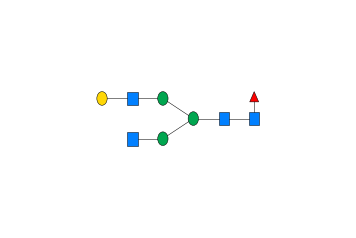

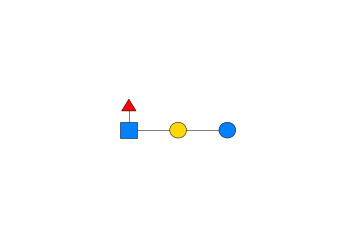

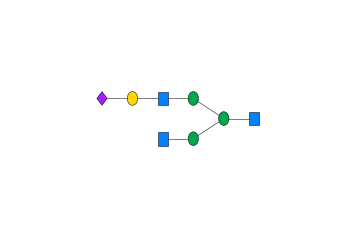

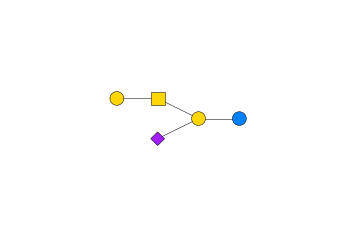

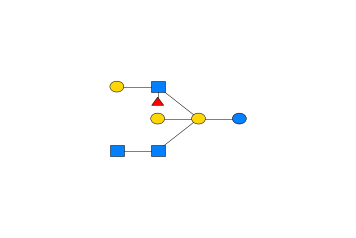

In [23]:
for eachBea in Bea2002s:
    for lce in eachBea:
        print(lce)
        parsePlot(lce)
        print('------')
    print('====')

In [24]:
#Krambeck et al. 2009, Fig. 1
Kea2009Fig1 = [
    'Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
    'Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
    'Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN']
Kea2009Fig1

#Krambeck et al. 2009, Fig. 5
Kea2009Fig5 = [
    'GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN',
    'NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN']
Kea2009Fig5

['Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN']

['GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN',
 'NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN']

In [25]:
LCEs = deepcopy(Kea2009Fig1) + deepcopy(Kea2009Fig5)# + deepcopy(Banins)

Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
------
Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
------
Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
------


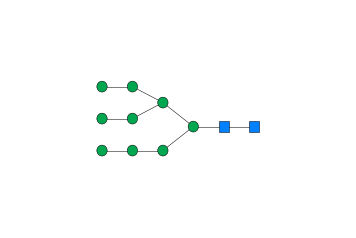

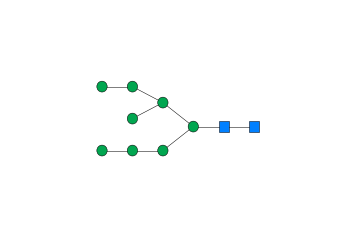

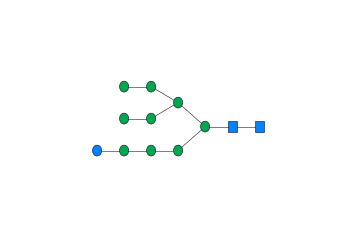

In [26]:
for lce in Kea2009Fig1:
    print(lce)
    parsePlot(lce)
    print('------')


GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN
------
NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN
------


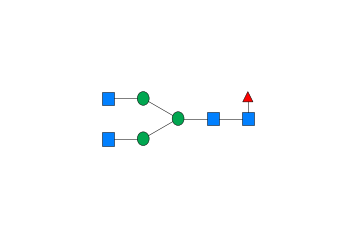

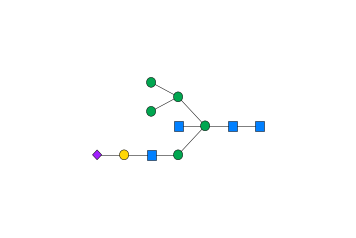

In [27]:
for lce in Kea2009Fig5:
    print(lce)
    parsePlot(lce)
    print('------')

In [28]:
# #Krambeck et al. 2017, Table 7, `'substrate' column
# ['(Ma2Ma',
# '(Ma3(Ma2Ma3(Ma6)Ma6)',
# '(Ma3(Ma6)Ma6',
# ]

Below is the glycan that will be used elsewhere in the notebook to illustrate the differences between different uncertainty operators.

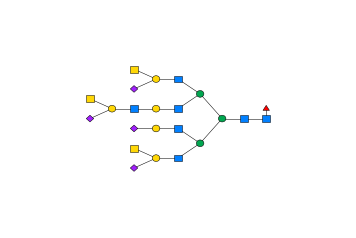

In [29]:
# monster = 'NNa6Ab4GNb4(NNa3(ANb4)Ab4GNb2)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GNb;Asn'
# monster = 'NNa6Ab4GNb4(NNa3(ANb4)Ab4GNb2)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GNb'
monster = 'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'
parsePlot(monster)
# parse_exp(monster, 's-exp')

In [30]:
testTree = monster

In [31]:
# a syntactically possible (but biologically rediculous) Glycan sufficient 

#wrong child/index order
# testTree = 'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'

# testTree = 'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'

#ASIDE:
#One equivalent possible lisp-y notation (that can fit on one line if need be):
# (GN :b4 (GN :b4 (M :a3 (M :b2 (GN :b4 (A :a3 M
#                                          :a6 (M :a6 NN))))
#                    :b4 (GN :a3 M 
#                            :b4 M)
#                    :a6 (M :a3 (M :a3 M
#                                  :a6 M)
#                           :a6 (M :a3 M)))))
# What does this illustrate?
#   -> + of linear code: more compact than more general tree notations when 
#       chaining (unary branching) is more typical than (multi-child) branching.
#   -> - of linear code: the more MUs + the 'bushier' the glycan, the harder it 
#      is to see the gross hierarchical structure at a glance from linear code.
# parsePlot(testTree)

In [32]:
testTree

'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'

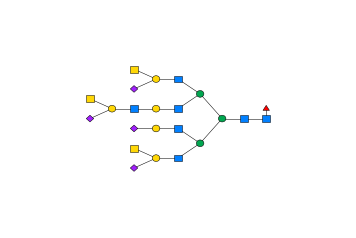

In [33]:
parsePlot(testTree)

In [34]:
# parsePlot('NNa6Ma6(Ma3)Ab4GNb')
# parsePlot('Ma3(NNa6Ma6)Ab4GNb')

In [35]:
# A BNF grammar for (right-to-left=conventional) linear code in 
#  'rightward-ascending normal form',  i.e. the rightmost child of any node has 
#  the highest bond index = as you move leftward among a node's children, the 
#  bond index decreases and vice versa. (No uncertainty operators.)
# 
# (exp) non-leftmost-branch* stem <- exp
# SU-with-bond-info* SU_bare (bond_type)  <- stem
# SU_bare bond-type bond-location  <- SU-with-bond-info
# b | a <- bond-type
# 9 | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1 <- bond-location
# '(' exp ')' <- non-leftmost-branch


# A grammar for left-to-right linear code in 'rightward-ascending' normal form:
# 
# exp -> stem non-rightmost-branch* (exp) 
# stem -> (bond_type) SU_bare SU-with-bond-info*
# SU-with-bond-info -> SU_bare bond-type bond-location
# bond-type -> a | b
# bond-location -> 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
# non-rightmost-branch -> '(' exp ')'

## Declare some syntactic categories

In [36]:
parentheses = ('(',')')

In [37]:
print(list(monosaccharides))
len(list(monosaccharides))

['Hep', 'Ribose', 'NeuGc', 'Hex', 'bdGal', 'GlcN', 'Fru', '2-Amino-2-deoxyglucose', u'2-Keto-3-deoxynanonic acid', 'NeuAc2', 'Oct', 'Glucose', 'Psicose', 'Non', 'Psi', 'Allose', 'Neu5Ac', 'GlcNAc', 'MurNAc', 'Gal', 'Neu5Gc', 'Quinovose', 'ManAnhydro', 'Fucose', 'Tri', u'Neuraminic acid', 'Fructose', 'Ery', 'Gul', 'Rha', 'GalNac', 'Bac', 'Glucosamine', u'Muramic Acid', 'Dec', 'Tyv', 'Tyvelose', 'Kdn', 'Kdo', 'Oli', 'Sorbose', 'bdMan', 'Lyx', 'Rhamnose', 'Ara', 'Tag', 'Fructofuranose', u'Glucuronic Acid', 'Tal', 'Rib', 'Threose', 'Sug', 'Erythrose', 'GlcNA', 'Mur', 'Tet', 'Pen', 'Talose', 'Neu', 'Altose', 'Olivose', u'Neu5,9Ac2', 'MurNGc', 'Fuc', 'Thr', 'bdGlc', 'Xylose', 'GlcA', u'Sialic Acid', 'Sed', 'GalNAc', 'Qui', 'Arabinose', 'IdoA', 'NeuAc', 'Man', 'Galactose', u'Galacturonic Acid', 'Glc', 'GlcNac', 'KDN', 'N-Acetylglucosamine', 'adMan', 'Xulose', 'Mannose', 'GalA', 'Xul', 'Tagatose', 'Lyxose', 'HexNAc', 'All', 'Ido', u'Iduronic Acid', 'aMan', 'Bacillosamine', 'Sedulose', 'Sor', '

100

In [38]:
#Not every monosaccharide that glypy knows about has a linear code 
# abbreviation it also knows about
MS_codes = set()
has_no_code = set()

#For whatever reason, glypy also associates bond types ('a', 'b') to 
# monosaccharide abbreviations.

for each in list(monosaccharides):
    print('-----')
    try:
        print(gen(monosaccharides.get(each)))
        print('*')
        result = gen(monosaccharides.get(each))
        MS_codes.add(result)
        if result[-1] == '?':
            MS_codes.add(result[:-1])
    except Exception as e:
        print(each)
        print(e)
        has_no_code.add(each)
        print('!')
    print('----')

-----
Ga
*
----
-----
B?
*
----
-----
NJa
*
----
-----
Hex
Linear Code does not support generic monosaccharide RES 1b:x-HEX-1:5
!
----
-----
Ab
*
----
-----
G[Q]b
*
----
-----
E?
*
----
-----
G[Q]b
*
----
-----
Ka
*
----
-----
NN[9N]a
*
----
-----
M?
*
----
-----
Gb
*
----
-----
E?
*
----
-----
Ga
*
----
-----
E?
*
----
-----
O?
*
----
-----
NNa
*
----
-----
GNb
*
----
-----
MurNAc
'(r)_lactate'
!
----
-----
Ab
*
----
-----
NJa
*
----
-----
G?
*
----
-----
ManAnhydro
'anhydro'
!
----
-----
Fa
*
----
-----
Tri
Linear Code does not support generic monosaccharide RES 1b:x-TRI-x:x
!
----
-----
N[5Q]?
*
----
-----
E?
*
----
-----
G?
*
----
-----
G?
*
----
-----
H?
*
----
-----
ANb
*
----
-----
H[2Q, 4Q]a
*
----
-----
G[Q]b
*
----
-----
Muramic Acid
'(r)_lactate'
!
----
-----
Dec
Linear Code does not support generic monosaccharide RES 1b:x-DEC-x:x
!
----
-----
G?
*
----
-----
G?
*
----
-----
Ka
*
----
-----
W?
*
----
-----
G?
*
----
-----
E?
*
----
-----
Mb
*
----
-----
X?
*
----
-----
H?
*


In [39]:
len(MS_codes)
print(MS_codes)
print(has_no_code)

39

set(['NJa', 'H[2Q, 4Q]a', 'NNa', 'O?', 'L?', 'Ma', 'M?', 'N[5Q]?', 'I?', 'Fa', 'G?', 'GNb', 'N[5Q]', 'E?', 'X?', 'Ub', 'Ka', 'B', 'E', 'G', 'Mb', 'I', 'H', 'R?', 'M', 'L', 'O', 'Ab', 'W', 'X', 'NN[9N]a', 'ANb', 'G[Q]b', 'H?', 'R', 'Gb', 'Ga', 'W?', 'B?'])
set(['Tri', 'Sug', 'MurNGc', 'Mur', 'Hex', 'MurNAc', 'Pen', 'ManAnhydro', u'Muramic Acid', 'Dec', 'Tet', 'HexNAc'])


In [40]:
print(list(filter(lambda c: '?' in c, MS_codes)))

['O?', 'L?', 'M?', 'N[5Q]?', 'I?', 'G?', 'E?', 'X?', 'R?', 'H?', 'W?', 'B?']


In [41]:
MS_codes.add('GN')
MS_codes.add('GNa')

In [42]:
SUs = MS_codes
# MSs = MS_codes

In [43]:
bonds = set(map(str, range(1,10)))
bonds

{'1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [44]:
bond_type_and_loc = set(map(partial(str_join, ''), 
                            product("ab?", 
                                    list(map(str, range(1,10))) + ['?'])))
bond_type_and_loc

{'?1',
 '?2',
 '?3',
 '?4',
 '?5',
 '?6',
 '?7',
 '?8',
 '?9',
 '??',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a7',
 'a8',
 'a9',
 'a?',
 'b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b?'}

In [45]:
print(SUs)
print(len(SUs))
SU_bare = {'A', 'AN', 'B', 'E', 'F', 'G', 'GN', 'G[Q]', 'H', 'H[2Q, 4Q]', 'I', 'K', 'L', 'M', 'NG', 'NJ', 'NN', 'NN[9N]', 'N[5Q]', 'O', 'P', 'PH', 'R', 'S', 'U', 'W', 'X'}
len(SU_bare)
len(SU_bare | SUs)

set(['NJa', 'H[2Q, 4Q]a', 'GN', 'NNa', 'O?', 'L?', 'Ma', 'M?', 'N[5Q]?', 'I?', 'Fa', 'G?', 'GNb', 'N[5Q]', 'E?', 'GNa', 'X?', 'Ub', 'Ka', 'B', 'E', 'G', 'Mb', 'I', 'H', 'R?', 'M', 'L', 'O', 'Ab', 'W', 'X', 'NN[9N]a', 'ANb', 'G[Q]b', 'H?', 'R', 'Gb', 'Ga', 'W?', 'B?'])
41


27

55

In [46]:
#some of these are nonsense, but that's fine for the purpose of this notebook...
SUs_with_bonds = set(map(partial(str_join, ''),
                         product(SU_bare,
                                 bond_type_and_loc)))
#                          product(SUs,
#                                  bonds)))
SUs_with_bonds

{'A?1',
 'A?2',
 'A?3',
 'A?4',
 'A?5',
 'A?6',
 'A?7',
 'A?8',
 'A?9',
 'A??',
 'AN?1',
 'AN?2',
 'AN?3',
 'AN?4',
 'AN?5',
 'AN?6',
 'AN?7',
 'AN?8',
 'AN?9',
 'AN??',
 'ANa1',
 'ANa2',
 'ANa3',
 'ANa4',
 'ANa5',
 'ANa6',
 'ANa7',
 'ANa8',
 'ANa9',
 'ANa?',
 'ANb1',
 'ANb2',
 'ANb3',
 'ANb4',
 'ANb5',
 'ANb6',
 'ANb7',
 'ANb8',
 'ANb9',
 'ANb?',
 'Aa1',
 'Aa2',
 'Aa3',
 'Aa4',
 'Aa5',
 'Aa6',
 'Aa7',
 'Aa8',
 'Aa9',
 'Aa?',
 'Ab1',
 'Ab2',
 'Ab3',
 'Ab4',
 'Ab5',
 'Ab6',
 'Ab7',
 'Ab8',
 'Ab9',
 'Ab?',
 'B?1',
 'B?2',
 'B?3',
 'B?4',
 'B?5',
 'B?6',
 'B?7',
 'B?8',
 'B?9',
 'B??',
 'Ba1',
 'Ba2',
 'Ba3',
 'Ba4',
 'Ba5',
 'Ba6',
 'Ba7',
 'Ba8',
 'Ba9',
 'Ba?',
 'Bb1',
 'Bb2',
 'Bb3',
 'Bb4',
 'Bb5',
 'Bb6',
 'Bb7',
 'Bb8',
 'Bb9',
 'Bb?',
 'E?1',
 'E?2',
 'E?3',
 'E?4',
 'E?5',
 'E?6',
 'E?7',
 'E?8',
 'E?9',
 'E??',
 'Ea1',
 'Ea2',
 'Ea3',
 'Ea4',
 'Ea5',
 'Ea6',
 'Ea7',
 'Ea8',
 'Ea9',
 'Ea?',
 'Eb1',
 'Eb2',
 'Eb3',
 'Eb4',
 'Eb5',
 'Eb6',
 'Eb7',
 'Eb8',
 'Eb9',
 'Eb?',
 'F?1',
 '

# Bottom-up parsing

The code here supports looking at a linear code expression and identifying substrings that match the substitution rules for some uncertainty operator.

## Parenthesis checking

Code for parsing Dyck languages and variants related to uncertainty operators.

In [47]:
def has_balanced_parens(s):
    '''
    Indicates whether the string in question has balanced parentheses.
    '''
    paren_stack = []
    for x in s:
        if x == '(':
            paren_stack.append(x)
        if x == ')':
            if len(paren_stack) == 0:
                return False
#             top = paren_stack[-1]
            paren_stack.pop()
    return len(paren_stack) == 0

In [48]:
positive_test_cases_balanced = ['', '()', '(())', '()()', '()(())']
negative_test_cases_balanced = ['(', ')', '())', '(()', '(()(', '))']

In [49]:
for c in positive_test_cases_balanced:
    print("{0}, {1}".format(c, has_balanced_parens(c)))
print('---')
for c in negative_test_cases_balanced:
    print("{0}, {1}".format(c, has_balanced_parens(c)))

, True
(), True
(()), True
()(), True
()(()), True
---
(, False
), False
()), False
((), False
(()(, False
)), False


In [50]:
def every_left_paren_has_a_right_paren(s):
    '''
    Indicates whether every open parenthesis has a matching close parenthesis.
    '''
    paren_stack = []
    for x in s:
        if x == '(':
            paren_stack.append(x)
        if x == ')':
#             if len(paren_stack) == 0:
#                 return False
#             top = paren_stack[-1]
            if len(paren_stack) > 0:
                paren_stack.pop()
    return len(paren_stack) == 0

In [51]:
positive_test_cases_for_every_left_a_right = deepcopy(positive_test_cases_balanced)
positive_test_cases_for_every_left_a_right.extend([')', '())', '))'])
positive_test_cases_for_every_left_a_right

negative_test_cases_for_every_left_a_right = ['(', '(()', '()(', '(()(',')(()']
negative_test_cases_for_every_left_a_right

['', '()', '(())', '()()', '()(())', ')', '())', '))']

['(', '(()', '()(', '(()(', ')(()']

In [52]:
for c in positive_test_cases_for_every_left_a_right:
    print("{0}, {1}".format(c, every_left_paren_has_a_right_paren(c)))
print('---')    
for c in negative_test_cases_for_every_left_a_right:
    print("{0}, {1}".format(c, every_left_paren_has_a_right_paren(c)))

, True
(), True
(()), True
()(), True
()(()), True
), True
()), True
)), True
---
(, False
((), False
()(, False
(()(, False
)((), False


## String manipulation boilerplate

### Generating contiguous subsequences

In [53]:
def generate_subsequences(s, as_generator=False, with_contexts=False):
    '''
    Given a sequence of length n, generates all O(n^2) contiguous subsequences 
    of s.
    
    If with_contexts is True, returns a sequence of 3-tuples:
        ...(left context, subsequence, right context)...
    '''
    c = with_contexts
    subseqs = (s[i:j] if not c else (s[:i], s[i:j], s[j:])
               for i in range(len(s)) 
               for j in range(i+1,len(s)+1))
    if as_generator:
        return subseqs
    else:
        return tuple(subseqs)

In [54]:
for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each)))
    
generate_subsequences((1,2,3))

for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each, 
                                                        with_contexts=True)))

: ()
a: ('a',)
ab: ('a', 'ab', 'b')
abc: ('a', 'ab', 'abc', 'b', 'bc', 'c')
abcd: ('a', 'ab', 'abc', 'abcd', 'b', 'bc', 'bcd', 'c', 'cd', 'd')


((1,), (1, 2), (1, 2, 3), (2,), (2, 3), (3,))

: ()
a: (('', 'a', ''),)
ab: (('', 'a', 'b'), ('', 'ab', ''), ('a', 'b', ''))
abc: (('', 'a', 'bc'), ('', 'ab', 'c'), ('', 'abc', ''), ('a', 'b', 'c'), ('a', 'bc', ''), ('ab', 'c', ''))
abcd: (('', 'a', 'bcd'), ('', 'ab', 'cd'), ('', 'abc', 'd'), ('', 'abcd', ''), ('a', 'b', 'cd'), ('a', 'bc', 'd'), ('a', 'bcd', ''), ('ab', 'c', 'd'), ('ab', 'cd', ''), ('abc', 'd', ''))


### Generating prefixes and suffixes

In [55]:
to_str = partial(str_join, '')
rev_to_str = compose(to_str, reversed, to_str)

def generate_prefixes(s, as_generator=False):
    l = len(s)
    prefs = (s[:i] for i in range(l+1))
    if as_generator:
        return prefs
    return list(prefs)


def generate_suffixes(s, as_generator=False):
    s_prime = to_str(reversed(s)) if type(s) == str else tuple(reversed(s))
    if as_generator:
        if type(s) == str:
            return (rev_to_str(each) 
                    for each in generate_prefixes(s_prime, as_generator))
        else:
            return (tuple(reversed(each)) 
                    for each in generate_prefixes(s_prime, as_generator))
    else:
        if type(s) == str:
            return list(map(rev_to_str, generate_prefixes(s_prime, as_generator)))
        else:
            return list(map(lambda s: tuple(reversed(s)),
                            generate_prefixes(s_prime, as_generator)))

In [56]:
for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_prefixes(each)))
#     print("{0}: {1}".format(each, list(generate_prefixes(each, True))))
    
generate_prefixes((1,2,3))

print('-----')

for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_suffixes(each)))
#     print("{0}: {1}".format(each, generate_suffixes(each, True)))
#     print("{0}: {1}".format(each, list(generate_suffixes(each, True))))
generate_suffixes((1,2,3))

: ['']
a: ['', 'a']
ab: ['', 'a', 'ab']
abc: ['', 'a', 'ab', 'abc']
abcd: ['', 'a', 'ab', 'abc', 'abcd']


[(), (1,), (1, 2), (1, 2, 3)]

-----
: ['']
a: ['', 'a']
ab: ['', 'b', 'ab']
abc: ['', 'c', 'bc', 'abc']
abcd: ['', 'd', 'cd', 'bcd', 'abcd']


[(), (3,), (2, 3), (1, 2, 3)]

### Deprefixing and desuffixing

In [57]:
def deprefix(prefix, s, prefix_not_found_behavior='identity'):
    '''
    Left-inverse of sequence concatenation: returns p\s, where p = prefix.
    
    Behavior when p is not a prefix of s is governed by 
    `prefix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    l_prefix = len(prefix)
    l_s = len(s)
    prefix_match = False
    quotient = ''
    
    if l_prefix <= l_s:
        prefix_match = s[:l_prefix] == prefix
    
    if prefix_match:
        quotient = s[l_prefix:]
        return quotient
    
    if prefix_not_found_behavior == 'identity':
        return s
    elif prefix_not_found_behavior == 'empty':
        return '' if type(s) == str else tuple()
    elif prefix_not_found_behavior == 'null':
        return None
    else:
        raise Exception("behavior must be 'identity', 'empty', or 'null': got {0}".format(prefix_not_found_behavior))

In [58]:
deprefix('foo', 'foobar')
deprefix('bar', 'foobar', 'identity')
deprefix('bar', 'foobar', 'empty')
deprefix('bar', 'foobar', 'null')

deprefix([1], [1,2,3])
deprefix([2], [1,2,3], 'identity')
deprefix([2], [1,2,3], 'empty')
deprefix([2], [1,2,3], 'null')

'bar'

'foobar'

''

[2, 3]

[1, 2, 3]

()

In [59]:
def desuffix(suffix, s, suffix_not_found_behavior='identity'):
    '''
    Right-inverse of sequence concatenation: returns s/f where f = suffix.
    
    Behavior when f is not a suffix of s is governed by 
    `suffix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    if type(s) == str:
        result = deprefix(rev_to_str(suffix), 
                          rev_to_str(s), 
                          suffix_not_found_behavior)
    if type(s) == str and result is not None:
        return rev_to_str(result)
    if type(s) != str:
        result = deprefix(tuple(reversed(suffix)), 
                          tuple(reversed(s)), 
                          suffix_not_found_behavior)
    if type(s) != str and result is not None:
        return tuple(reversed(result))
    return result

In [60]:
desuffix('bar', 'foobar')
desuffix('foo', 'foobar', 'identity')
desuffix('foo', 'foobar', 'empty')
desuffix('foo', 'foobar', 'null')

desuffix([3], [1,2,3])
desuffix([2], [1,2,3], 'identity')
desuffix([2], [1,2,3], 'empty')
desuffix([2], [1,2,3], 'null')

'foo'

'foobar'

''

(1, 2)

(1, 2, 3)

()

### Circumfixing

In [61]:
def circumfix(prefix, suffix, s):
    '''
    Returns 
        prefix + s + suffix
    '''
    return prefix + s + suffix

In [62]:
circumfix('FOO', 'BAR', 'baz')

'FOObazBAR'

### Decircumfixing

In [63]:
def decircumfix(prefix, suffix, s, circumfix_not_found_behavior='identity'):
    '''
    Inverse of circumfix(prefix, suffix, u): returns u = (prefix\s)/suffix.
    
    Behavior when s does not have (prefix, suffix) as a circumfix is governed by
    `circumfix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    has_circumfix = False
    
    deprefixed = deprefix(prefix, s, circumfix_not_found_behavior)
    
    if deprefixed is None:
        return None
    
    if circumfix_not_found_behavior == 'identity' and prefix != '':
        has_circumfix = deprefixed != s
    if not has_circumfix and circumfix_not_found_behavior == 'identity':
        return s
    
    decircumfixed = desuffix(suffix, deprefixed, circumfix_not_found_behavior)
    
    if circumfix_not_found_behavior == 'identity' and suffix != '':
        has_circumfix = decircumfixed != deprefixed
    if not has_circumfix and circumfix_not_found_behavior == 'identity':
        return s
    
    return decircumfixed

In [64]:
decircumfix('FOO', 'BAR', 'FOObazBAR')
print('---')
decircumfix('FOO', 'BAR', 'bazBAR', 'identity')
decircumfix('FOO', 'BAR', 'FOObaz', 'identity')
print('---')
decircumfix('FOO', 'BAR', 'bazBAR', 'empty')
decircumfix('FOO', 'BAR', 'FOObaz', 'empty')
print('---')
decircumfix('FOO', 'BAR', 'bazBAR', 'null')
decircumfix('FOO', 'BAR', 'FOObaz', 'null')

'baz'

---


'bazBAR'

'FOObaz'

---


''

''

---


In [65]:
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6,7,8,9))
print('---')
decircumfix((1,2,3), (7,8,9), (4,5,6,7,8,9), 'identity')
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6), 'identity')
print('---')
decircumfix((1,2,3), (7,8,9), (4,5,6,7,8,9), 'empty')
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6), 'empty')
print('---')
decircumfix((1,2,3), (7,8,9), (4,5,6,7,8,9), 'null')
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6), 'null')

(4, 5, 6)

---


(4, 5, 6, 7, 8, 9)

(1, 2, 3, 4, 5, 6)

---


()

()

---


In [66]:
decircumfix(tuple('('), tuple(')'), tuple('(Y)'))

('Y',)

### Infixing

In [67]:
def infix(u, left_context, right_context):
    '''
    Returns 
        left_context + u + right_context
    '''
    return left_context + u + right_context

In [68]:
infix('baz', 'FOO', 'BAR')

'FOObazBAR'

### Deinfixing

In [69]:
def deinfix(u, s, infix_not_found_behavior='identity'):
    '''
    Multi-inverse of infix(u, left, right): returns all (left, right)s s.t.
        s = left + u + right
    
    Behavior when s does not have u as an infix is governed by
    `infix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    all_subsequences_with_contexts = generate_subsequences(s, 
                                                           as_generator=False, 
                                                           with_contexts=True)
    relevant_subsequences = tuple(filter(lambda lcr: lcr[1] == u,
                                         all_subsequences_with_contexts))
    just_contexts = tuple(map(lambda lcr: (lcr[0], lcr[2]),
                              relevant_subsequences))
    if len(just_contexts) == 0:
        if infix_not_found_behavior == 'identity':
            return s
        elif infix_not_found_behavior == 'empty':
            return ''
        elif infix_not_found_behavior == 'null':
            return None
    
    return just_contexts

In [70]:
for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each)))
    
generate_subsequences((1,2,3))

for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each, with_contexts=True)))

: ()
a: ('a',)
ab: ('a', 'ab', 'b')
abc: ('a', 'ab', 'abc', 'b', 'bc', 'c')
abcd: ('a', 'ab', 'abc', 'abcd', 'b', 'bc', 'bcd', 'c', 'cd', 'd')


((1,), (1, 2), (1, 2, 3), (2,), (2, 3), (3,))

: ()
a: (('', 'a', ''),)
ab: (('', 'a', 'b'), ('', 'ab', ''), ('a', 'b', ''))
abc: (('', 'a', 'bc'), ('', 'ab', 'c'), ('', 'abc', ''), ('a', 'b', 'c'), ('a', 'bc', ''), ('ab', 'c', ''))
abcd: (('', 'a', 'bcd'), ('', 'ab', 'cd'), ('', 'abc', 'd'), ('', 'abcd', ''), ('a', 'b', 'cd'), ('a', 'bc', 'd'), ('a', 'bcd', ''), ('ab', 'c', 'd'), ('ab', 'cd', ''), ('abc', 'd', ''))


In [71]:
deinfix('b', 'abcd')
deinfix('X', 'aaXbbXccX')
print('---')
deinfix('Y', 'abcd', 'identity')
deinfix('Y', 'aaXbbXccX', 'identity')
print('---')
deinfix('Y', 'abcd', 'empty')
deinfix('Y', 'aaXbbXccX', 'empty')
print('---')
deinfix('Y', 'abcd', 'null')
deinfix('Y', 'aaXbbXccX', 'null')

(('a', 'cd'),)

(('aa', 'bbXccX'), ('aaXbb', 'ccX'), ('aaXbbXcc', ''))

---


'abcd'

'aaXbbXccX'

---


''

''

---


## Tokenization

In [72]:
def tokenizer(linear_code_expression, tokenize_saccharide_units=False):
    '''
    Given a linear code expression for a single molecule s, splits ('tokenizes')
    s into 'tokens' with each token consisting of one of
        - parentheses
        - a saccharide unit with bond information
        - a saccharide unit/monosaccharide
    where 'a monosaccharide with bond information' is either
        - a monosaccharide with just a bond type
        - a monosaccharide with a bond type and a bond location
    
    (Note that it is NOT the job of a tokenizer to enforce or check either 
    syntactic or semantic restrictions.)
    
    If tokenize_saccharide_units is True, then this will tokenize saccharide 
    units to separate the bare monosaccharide, the bond type, and the bond 
    location.
    '''
#     categories = (parentheses, SUs_with_bonds, SUs)
    categories = (parentheses, SUs_with_bonds, SU_bare)
    
    def right_greedy_tokenizer(lce, tokenized_result_so_far):
        '''
        Greedily (and recursively) tokenizes lce from the right.
        '''
        if lce == '':
            return tokenized_result_so_far
#         print('lce={0}'.format(lce))
        for suf in generate_suffixes(lce, True):
#             print('\tsuf={0}'.format(suf))
            for cat in categories:
#                 print('\t\tcat={0}'.format(cat))
                if suf in cat:
                    rest = desuffix(suf, lce)
#                     print('\t\trest={0}'.format(rest))
                    return right_greedy_tokenizer(rest, [suf] + 
                                                         tokenized_result_so_far)
        e = 'Tokenized portion: {0}\nUntokenized remainder: {1}'
        raise Exception(e.format(tokenized_result_so_far, lce))
    
    result = right_greedy_tokenizer(linear_code_expression, [])
    if not tokenize_saccharide_units:
        return result
    
    further_tokenized = list(cat(map(SU_tokenizer,
                                     result)))
    return further_tokenized

def split_bond_information(saccharidue_unit_maybe_with_bond_information):
    su = saccharidue_unit_maybe_with_bond_information
    if su in SU_bare and su not in SUs_with_bonds:
#     if su in SUs and su not in SUs_with_bonds:
        return (su, '', '')
    bond_location = su[-1]
    assert bond_location in '123456789?' #or bond_location in '?'
    bond_type = su[-2] if su[-2] in 'ab?' and su[:-2] in SU_bare else ''
#     bond_type = su[-2] if su[-2] in 'ab?' and su[:-2] in SUs else ''
    SU_alone = desuffix(bond_type, desuffix(bond_location, su))
    return (SU_alone, bond_type, bond_location)

def SU_tokenizer(token):
    if token in parentheses:
        return [token]
    result = list(filter(lambda x: x != '',
                         list(split_bond_information(token))))
    return result

In [73]:
LCEs

['Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN',
 'NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN']

In [74]:
LCEs[0]
print(tokenizer(LCEs[0]))
print(tokenizer(LCEs[0], True))

'Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN'

['Ma2', 'Ma2', 'Ma3', '(', 'Ma2', 'Ma3', '(', 'Ma2', 'Ma6', ')', 'Ma6', ')', 'Mb4', 'GNb4', 'GN']
['M', 'a', '2', 'M', 'a', '2', 'M', 'a', '3', '(', 'M', 'a', '2', 'M', 'a', '3', '(', 'M', 'a', '2', 'M', 'a', '6', ')', 'M', 'a', '6', ')', 'M', 'b', '4', 'GN', 'b', '4', 'GN']


In [75]:
for each in tokenizer(LCEs[0]):
    print("{0}, {1}".format(each, SU_tokenizer(each)))

Ma2, ['M', 'a', '2']
Ma2, ['M', 'a', '2']
Ma3, ['M', 'a', '3']
(, ['(']
Ma2, ['M', 'a', '2']
Ma3, ['M', 'a', '3']
(, ['(']
Ma2, ['M', 'a', '2']
Ma6, ['M', 'a', '6']
), [')']
Ma6, ['M', 'a', '6']
), [')']
Mb4, ['M', 'b', '4']
GNb4, ['GN', 'b', '4']
GN, ['GN']


In [76]:
list(map(SU_tokenizer,
         tokenizer(LCEs[0])))

[['M', 'a', '2'],
 ['M', 'a', '2'],
 ['M', 'a', '3'],
 ['('],
 ['M', 'a', '2'],
 ['M', 'a', '3'],
 ['('],
 ['M', 'a', '2'],
 ['M', 'a', '6'],
 [')'],
 ['M', 'a', '6'],
 [')'],
 ['M', 'b', '4'],
 ['GN', 'b', '4'],
 ['GN']]

In [77]:
cat(list(map(SU_tokenizer,
                 tokenizer(LCEs[0]))))
tokenizer(LCEs[0], True)

['M',
 'a',
 '2',
 'M',
 'a',
 '2',
 'M',
 'a',
 '3',
 '(',
 'M',
 'a',
 '2',
 'M',
 'a',
 '3',
 '(',
 'M',
 'a',
 '2',
 'M',
 'a',
 '6',
 ')',
 'M',
 'a',
 '6',
 ')',
 'M',
 'b',
 '4',
 'GN',
 'b',
 '4',
 'GN']

['M',
 'a',
 '2',
 'M',
 'a',
 '2',
 'M',
 'a',
 '3',
 '(',
 'M',
 'a',
 '2',
 'M',
 'a',
 '3',
 '(',
 'M',
 'a',
 '2',
 'M',
 'a',
 '6',
 ')',
 'M',
 'a',
 '6',
 ')',
 'M',
 'b',
 '4',
 'GN',
 'b',
 '4',
 'GN']

In [78]:
for each in LCEs[:3]:
    print(tokenizer(each, True))

['M', 'a', '2', 'M', 'a', '2', 'M', 'a', '3', '(', 'M', 'a', '2', 'M', 'a', '3', '(', 'M', 'a', '2', 'M', 'a', '6', ')', 'M', 'a', '6', ')', 'M', 'b', '4', 'GN', 'b', '4', 'GN']
['M', 'a', '2', 'M', 'a', '2', 'M', 'a', '3', '(', 'M', 'a', '3', '(', 'M', 'a', '2', 'M', 'a', '6', ')', 'M', 'a', '6', ')', 'M', 'b', '4', 'GN', 'b', '4', 'GN']
['G', 'a', '3', 'M', 'a', '2', 'M', 'a', '2', 'M', 'a', '3', '(', 'M', 'a', '2', 'M', 'a', '3', '(', 'M', 'a', '2', 'M', 'a', '6', ')', 'M', 'a', '6', ')', 'M', 'b', '4', 'GN', 'b', '4', 'GN']


In [79]:
for lce in LCEs:
    print('Glycan:    {0}\nTokenized: {1}'.format(lce, str_join(' ', tokenizer(lce))))

Glycan:    Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: Ma2 Ma2 Ma3 ( Ma2 Ma3 ( Ma2 Ma6 ) Ma6 ) Mb4 GNb4 GN
Glycan:    Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: Ma2 Ma2 Ma3 ( Ma3 ( Ma2 Ma6 ) Ma6 ) Mb4 GNb4 GN
Glycan:    Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: Ga3 Ma2 Ma2 Ma3 ( Ma2 Ma3 ( Ma2 Ma6 ) Ma6 ) Mb4 GNb4 GN
Glycan:    GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN
Tokenized: GNb2 Ma3 ( GNb2 Ma6 ) Mb4 GNb4 ( Fa6 ) GN
Glycan:    NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN
Tokenized: NNa6 Ab4 GNb2 Ma3 ( GNb4 ) ( Ma3 ( Ma6 ) Ma6 ) Mb4 GNb4 GN


In [80]:
for lce in LCEs:
    print('Glycan:    {0}\nTokenized: {1}'.format(lce, str_join(' ', tokenizer(lce, True))))

Glycan:    Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: M a 2 M a 2 M a 3 ( M a 2 M a 3 ( M a 2 M a 6 ) M a 6 ) M b 4 GN b 4 GN
Glycan:    Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: M a 2 M a 2 M a 3 ( M a 3 ( M a 2 M a 6 ) M a 6 ) M b 4 GN b 4 GN
Glycan:    Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: G a 3 M a 2 M a 2 M a 3 ( M a 2 M a 3 ( M a 2 M a 6 ) M a 6 ) M b 4 GN b 4 GN
Glycan:    GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN
Tokenized: GN b 2 M a 3 ( GN b 2 M a 6 ) M b 4 GN b 4 ( F a 6 ) GN
Glycan:    NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN
Tokenized: NN a 6 A b 4 GN b 2 M a 3 ( GN b 4 ) ( M a 3 ( M a 6 ) M a 6 ) M b 4 GN b 4 GN


## Conversion to json/s-expressions

In [81]:
testTree

'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'

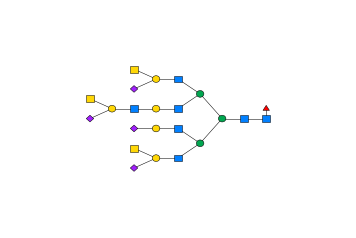

In [82]:
parsePlot(testTree)

In [83]:
# A BNF grammar for (right-to-left=conventional) linear code in 
#  'rightward-ascending normal form',  i.e. the rightmost child of any node has 
#  the highest bond index = as you move leftward among a node's children, the 
#  bond index decreases and vice versa. (No uncertainty operators.)
# 
# (exp) non-leftmost-branch* stem <- exp
# SU-with-bond-info* SU_bare (bond_type)  <- stem
# SU_bare bond-type bond-location  <- SU-with-bond-info
# b | a <- bond-type
# 9 | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1 <- bond-location
# '(' exp ')' <- non-leftmost-branch


# A grammar for left-to-right linear code in 'rightward-ascending' normal form:
# 
# exp -> stem non-rightmost-branch* (exp) 
# stem -> (bond_type) SU_bare SU-with-bond-info*
# SU-with-bond-info -> SU_bare bond-type bond-location
# bond-type -> a | b
# bond-location -> 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
# non-rightmost-branch -> '(' exp ')'

In [84]:
# def split_bond_information(saccharidue_unit_maybe_with_bond_information):
#     su = saccharidue_unit_maybe_with_bond_information
#     if su in SU_bare and su not in SUs_with_bonds:
# #     if su in SUs and su not in SUs_with_bonds:
#         return (su, '', '')
#     bond_location = su[-1]
#     assert bond_location in '123456789?' #or bond_location in '?'
#     bond_type = su[-2] if su[-2] in 'ab?' and su[:-2] in SU_bare else ''
# #     bond_type = su[-2] if su[-2] in 'ab?' and su[:-2] in SUs else ''
#     SU_alone = desuffix(bond_type, desuffix(bond_location, su))
#     return (SU_alone, bond_type, bond_location)


def is_chain_in_rightmost_path(tokens):
    if len(tokens) == 0:
        return True
    return all((each in SUs_with_bonds) or (each in SU_bare) for each in tokens)
#     return all((each in SUs_with_bonds) or (each in SUs) for each in tokens)


def is_nonrightmost_branch(tokens):
    if len(tokens) == 0:
        return True
    has_left_paren = tokens[0] == '('
    has_right_paren = tokens[-1] == ')'
    balanced = has_balanced_parens(tokens)
    return has_left_paren and has_right_paren and balanced


def destem(tokens):
    if tokens[-1] == ')':
        return tuple([''])
    stem = tuple(reversed(list(takewhile(lambda token: token not in '()',
                                         list(reversed(tokens))))))
    rest = tuple(reversed(list(dropwhile(lambda token: token not in '()',
                                         list(reversed(tokens))))))
    return stem, rest


def get_leftmost_branch(nonrightmost_subtrees_as_token_seq):
    s = nonrightmost_subtrees_as_token_seq
    end_of_first_branch = len(s)
    for i in range(len(s)-1,-1,-1):
        if s[i] == '(' and is_nonrightmost_branch(s[i:]):
            return s[i:]
    raise Exception('Does not have a well-formed leftmost branch:\n{0}'.format(nonrightmost_subtrees_as_token_seq))
    
    
def parse_nonrightmost_branches(nonrightmost_subtrees_as_token_seq):
    s = nonrightmost_subtrees_as_token_seq
    
    #fixme convert this tail-recursive function to an iterative function...
    def split_nonrightmost_branch_helper(remainder, acc):
        if len(remainder) == 0:
            return acc, remainder
        elif remainder[-1] != ')':
            return acc, remainder
        leftmost_branch = get_leftmost_branch(remainder)
        new_remainder = desuffix(leftmost_branch, remainder)
        new_acc = acc + [leftmost_branch]
        return split_nonrightmost_branch_helper(new_remainder, new_acc)
    
    grouped_branches, tail = split_nonrightmost_branch_helper(s, [])
    unwrapped_groups = tuple(map(unwrap_branch_tokens, grouped_branches))
    parsed_groups = tuple(map(parse_tokens, unwrapped_groups))
    parsed_tail = parse_tokens(tail)
    return parsed_groups + tuple([parsed_tail])


def unwrap_branch_tokens(branch_tokens):
    s = branch_tokens
    assert s[0] == '(' 
    assert s[-1] == ')'
    return s[1:-1]


def parse_subtrees(rest_tokens):
    parsed_nonrightmost_subtrees = parse_nonrightmost_branches(rest_tokens)
    result = parsed_nonrightmost_subtrees
    return result

    
def parse_exp(linear_code_expression, style='stem-and-subtrees'):
    '''
    Converts `linear_code_expression` formatted according to this BNF rule 
    (assuming leftward-ascending normal form):
      (exp) non-rightmost-branch* stem <- exp
    as a dictionary (with ordering within sequences going from left-to-right).
    '''
    tokens = tokenizer(linear_code_expression)
    return parse_tokens(tokens, style)
    

def parse_tokens(tokens, style='stem-and-subtrees'):
    stem, rest = destem(tokens)
    if rest == tuple():
        stem_and_subtrees = {'stem':tuple(reversed(stem)),
                             'subtrees':rest}
    else:
        try:
            subtrees = parse_subtrees(rest)
        except Exception as e:
            print("Tried to parse\n{0}\n as 'rest'".format(rest))
            raise e
        stem_and_subtrees = {'stem':tuple(reversed(stem)), 'subtrees':subtrees}
    if style == 'stem-and-subtrees':
        return stem_and_subtrees
    elif style == 'func-and-args':
        return stem_and_subtrees_to_func_and_args(stem_and_subtrees)
    elif style == 's-exp':
        return func_and_args_to_sexps(stem_and_subtrees_to_func_and_args(stem_and_subtrees), True)

    
def stem_to_func_and_args(stem):
    if len(stem) == 1:
        tree = OrderedDict()
        tree['func'] = stem[0]
        tree['args'] = tuple()
        return tree
#         return {'func': stem[0], 'args':tuple()}
    tree = OrderedDict()
    tree['func'] = stem[0]
    tree['args'] = tuple([stem_to_func_and_args(stem[1:])])
    return tree
#     return {'func':stem[0], 'args':tuple([stem_to_func_and_args(stem[1:])])}
    
    
def leftmost_leaf(fa_tree):
    t = fa_tree
    if len(t['args']) == 0:
        return t
    return leftmost_leaf(t['args'][-1])
    
    
def stem_and_subtrees_to_func_and_args(stem_and_subtrees):
    stem_fa = stem_to_func_and_args(stem_and_subtrees['stem'])
    my_leftmost_leaf = leftmost_leaf(stem_fa)
    my_leftmost_leaf['args'] = list(map(stem_and_subtrees_to_func_and_args,
                                         stem_and_subtrees['subtrees']))
    return stem_fa

def func_and_args_to_sexps(func_and_args, unwrap_leaves=False, separate_args=False):
    tree = func_and_args
    if len(tree['args']) == 0:
        return '({0})'.format(tree['func'])
    s = '({0}'.format(tree['func'])
    body = ' '.join(['{0}'.format(func_and_args_to_sexps(arg, unwrap_leaves, False))
                     for arg in tree['args']])
    s += ' ' + body + ')'
#     print('pre-unwrapping: {0}'.format(s))
    
    if unwrap_leaves:
        split_s = s.split(' ')
        unwrapped = map(lambda token: unwrap_branch_tokens(token )if token[0] == '(' and token[-1] == ')' else token,
                        split_s)
        joined_s = ' '.join(unwrapped)
        s = joined_s
#     print('unwrapped: {0}'.format(s))
    
    def extract_and_format_arglabels(token):
        is_leaf = token[0] != '('# and token[-1] != ')'
#         assert is_leaf, "{0} is not a leaf".format(token)
        if is_leaf:
            arg_label = token[-2:] if token[-1] != ')' else token[-3:-1]
            arg = token[:-2] if token[-1] != ')' else token[:-3]
            end_symbol = '' if token[-1] != ')' else ''
            assert arg_label in bond_type_and_loc, "{0} is not a recognized bond type\nOriginal token = {1}".format(arg_label, token)

            formatted_arg = ':' + arg_label + ' ' + arg + end_symbol
            return formatted_arg
        assert token[0] == '(', '{0} is neither a leaf nor a head label'.format(token)
        arg_label = token[-2:]
        arg = token[:-2]
        assert arg_label in bond_type_and_loc, "{0} is not a recognized bond type\nOriginal token = {1}".format(arg_label, token)

        formatted_arg = ':' + arg_label + ' ' + arg
        return formatted_arg
    
    if separate_args:
        #FIXME
        print('Currently unsupported.')
#         print('s = {0}'.format(s))
#         split_s = s.split(' ')
#         print('split_s = {0}'.format(split_s))
#         formatted = [split_s[0]] + list(map(extract_and_format_arglabels, split_s[1:]))
#         joined_s = ' '.join(formatted)
#         s = joined_s
#         print('separated s = {0}'.format(s))
        
    return s

In [85]:
print(monster)

NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN


In [86]:
print(tokenizer(monster, True))

['NN', 'a', '3', '(', 'AN', 'b', '4', ')', 'A', 'b', '4', 'GN', 'b', '2', '(', 'NN', 'a', '6', 'A', 'b', '4', 'GN', 'b', '4', ')', 'M', 'a', '3', '(', 'NN', 'a', '3', '(', 'AN', 'b', '4', ')', 'A', 'b', '4', 'GN', 'b', '3', 'A', 'b', '4', 'GN', 'b', '2', '(', 'NN', 'a', '3', '(', 'AN', 'b', '4', ')', 'A', 'b', '4', 'GN', 'b', '6', ')', 'M', 'a', '6', ')', 'M', 'a', '4', 'GN', 'b', '4', '(', 'F', 'a', '6', ')', 'GN']


In [87]:
'Ma6'[-2:]
'Ma6'[:-2]

'a6'

'M'

In [88]:
pprint(stem_to_func_and_args(['Ma']))

{
  "func": "Ma", 
  "args": []
}


In [89]:
pprint(stem_to_func_and_args(['Ma', 'GNb2', 'NNa3']))

{
  "func": "Ma", 
  "args": [
    {
      "func": "GNb2", 
      "args": [
        {
          "func": "NNa3", 
          "args": []
        }
      ]
    }
  ]
}


In [90]:
parse_exp('Ma4Ma2M')
parse_exp('Ma4(Ma2)M')
parse_exp('Ma6(Ma4)(Ma2)M')
'----'
parse_exp('Ma4Ma2M', 'func-and-args')
parse_exp('Ma4(Ma2)M', 'func-and-args')
parse_exp('Ma6(Ma4)(Ma2)M', 'func-and-args')
'----'
func_and_args_to_sexps(parse_exp('Ma4Ma2M', 'func-and-args'))
func_and_args_to_sexps(parse_exp('Ma4(Ma2)M', 'func-and-args'))
func_and_args_to_sexps(parse_exp('Ma6(Ma4)(Ma2)M', 'func-and-args'))
'----'
func_and_args_to_sexps(parse_exp('Ma4Ma2M', 'func-and-args'), True)
func_and_args_to_sexps(parse_exp('Ma4(Ma2)M', 'func-and-args'), True)
func_and_args_to_sexps(parse_exp('Ma6(Ma4)(Ma2)M', 'func-and-args'), True)
'----'
parse_exp('Ma4Ma2M', 's-exp')
parse_exp('Ma4(Ma2)M', 's-exp')
parse_exp('Ma6(Ma4)(Ma2)M', 's-exp')

{'stem': ('M', 'Ma2', 'Ma4'), 'subtrees': ()}

{'stem': ('M',),
 'subtrees': ({'stem': ('Ma2',), 'subtrees': ()},
  {'stem': ('Ma4',), 'subtrees': ()})}

{'stem': ('M',),
 'subtrees': ({'stem': ('Ma2',), 'subtrees': ()},
  {'stem': ('Ma4',), 'subtrees': ()},
  {'stem': ('Ma6',), 'subtrees': ()})}

'----'

OrderedDict([('func', 'M'),
             ('args',
              (OrderedDict([('func', 'Ma2'),
                            ('args',
                             (OrderedDict([('func', 'Ma4'),
                                           ('args', [])]),))]),))])

OrderedDict([('func', 'M'),
             ('args',
              [OrderedDict([('func', 'Ma2'), ('args', [])]),
               OrderedDict([('func', 'Ma4'), ('args', [])])])])

OrderedDict([('func', 'M'),
             ('args',
              [OrderedDict([('func', 'Ma2'), ('args', [])]),
               OrderedDict([('func', 'Ma4'), ('args', [])]),
               OrderedDict([('func', 'Ma6'), ('args', [])])])])

'----'

'(M (Ma2 (Ma4)))'

'(M (Ma2) (Ma4))'

'(M (Ma2) (Ma4) (Ma6))'

'----'

'(M (Ma2 Ma4))'

'(M Ma2 Ma4)'

'(M Ma2 Ma4 Ma6)'

'----'

'(M (Ma2 Ma4))'

'(M Ma2 Ma4)'

'(M Ma2 Ma4 Ma6)'

In [91]:
stem_and_subtrees_to_func_and_args(parse_exp('Ma2Ma2M'))
stem_and_subtrees_to_func_and_args(parse_exp('Ma4(Ma2)M'))
stem_and_subtrees_to_func_and_args(parse_exp('Ma6(Ma4)(Ma2)M'))

OrderedDict([('func', 'M'),
             ('args',
              (OrderedDict([('func', 'Ma2'),
                            ('args',
                             (OrderedDict([('func', 'Ma2'),
                                           ('args', [])]),))]),))])

OrderedDict([('func', 'M'),
             ('args',
              [OrderedDict([('func', 'Ma2'), ('args', [])]),
               OrderedDict([('func', 'Ma4'), ('args', [])])])])

OrderedDict([('func', 'M'),
             ('args',
              [OrderedDict([('func', 'Ma2'), ('args', [])]),
               OrderedDict([('func', 'Ma4'), ('args', [])]),
               OrderedDict([('func', 'Ma6'), ('args', [])])])])

In [92]:
# example_glycan = 'GNb4(GNa6(Ma4)GNb2)Ma6(GNb2Ma4)(Gb4Ma2)M'
# # (M :a2 (M :b4 Gb)
# #     :a4 (M :b2 GN)
# #     :a6 (M :b2 (GN :a4 M
# #                    :a6 GN)
# #            :b4 GN))
# parsePlot(example_glycan)
# parse_exp(example_glycan, 'stem-and-subtrees')
# pprint(stem_and_subtrees_to_func_and_args(parse_exp(example_glycan)))
# func_and_args_to_sexps(parse_exp(example_glycan, 'func-and-args'), False)
# func_and_args_to_sexps(parse_exp(example_glycan, 'func-and-args'), True)
# parse_exp(example_glycan, 's-exp')

NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN


'(GN Fa6 (GNb4 (Ma4 (Ma6 (GNb6 (Ab4 ANb4 NNa3)) (GNb2 (Ab4 (GNb3 (Ab4 ANb4 NNa3))))) (Ma3 (GNb4 (Ab4 NNa6)) (GNb2 (Ab4 ANb4 NNa3))))))'

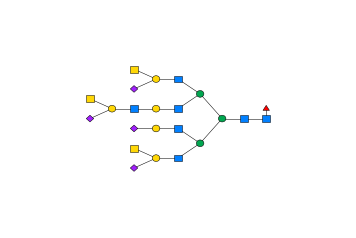

In [93]:
print(testTree)
parsePlot(testTree)
parse_exp(testTree, 's-exp')

## Krambeck et al. 2009's `ligand` "..." uncertainty operator

`...` is supposed to match "Any string (possibly empty) with parentheses matched" (Table 7)

In [94]:
def is_ligand_match(linear_code_expression):
    '''
    Indicates whether `linear_code_expression` (in its entirety) matches (i.e.
    could be substituted with/for) `...`.
    '''
    s = linear_code_expression
    if len(s) == 0:
        return True
    return has_balanced_parens(s)

In [95]:
def get_ligand_matches(linear_code_expression, as_generator=False, with_contexts=False):
    '''
    Returns the nonempty substrings within `linear_code_expression` that match 
    Krambeck et al's `ligand` uncertainty operator `...`.
    '''
    s = linear_code_expression
    subsequences = generate_subsequences(list(tokenizer(s)), True, with_contexts)
#     subsequences = generate_subsequences(s, True)
    if as_generator:
        return (is_ligand_match(subseq) 
                for subseq in subsequences)
    else:
        return tuple(filter(is_ligand_match, subsequences))

Let's investigate an example tree that has some subtrees (with their own subtrees...):

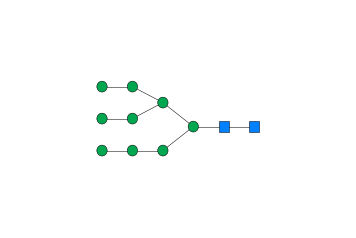

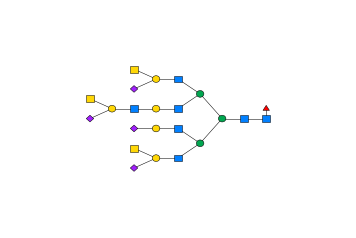

In [96]:
my_tree = LCEs[0]
parsePlot(my_tree)

my_tree = testTree
parsePlot(my_tree)

In [97]:
my_ligand_matches, my_nonmatches = split(is_ligand_match, 
                                         generate_subsequences(tokenizer(my_tree)))

len(my_ligand_matches), len(my_nonmatches)

(122, 581)

For ease of investigation/analysis it will be useful if we can isolate the subset of ligand uncertainty operator matches that are plottable from those that aren't:

/home/AD/emeinhar/anaconda3/envs/gregex/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


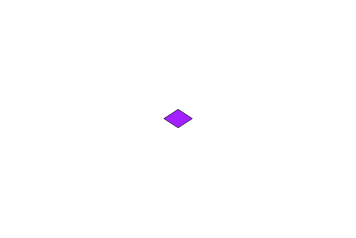

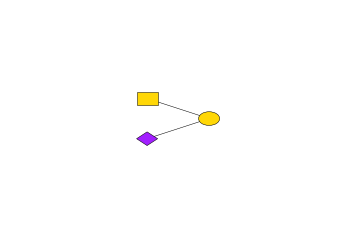

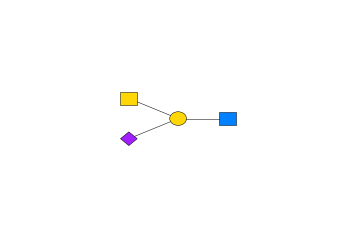

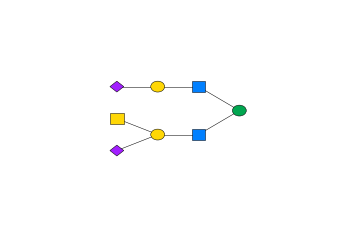

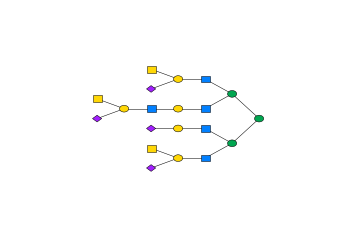

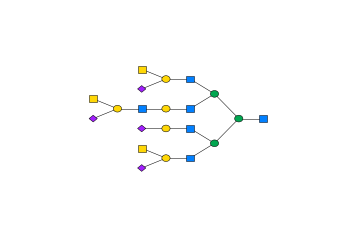

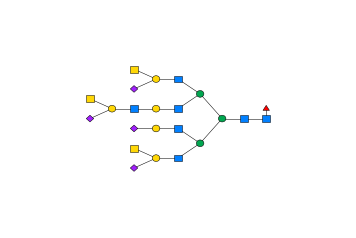

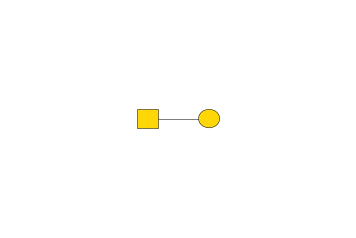

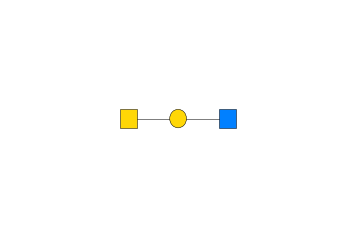

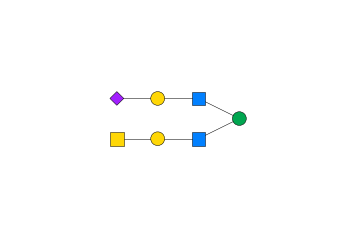

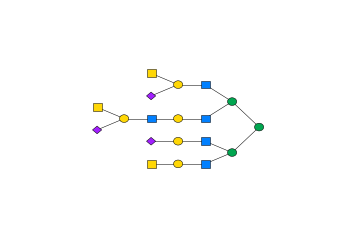

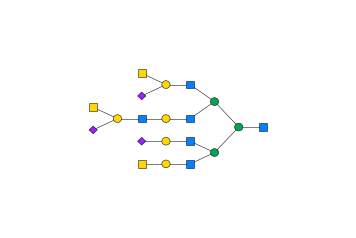

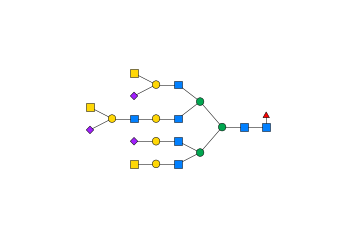

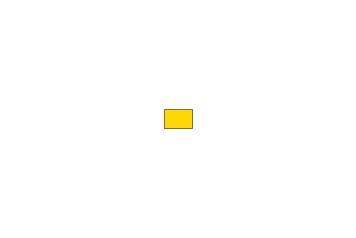

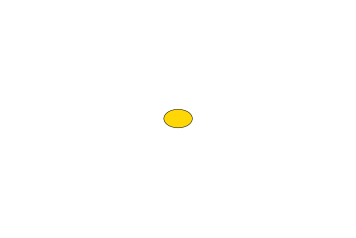

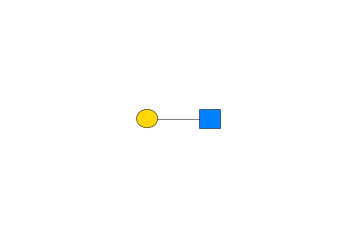

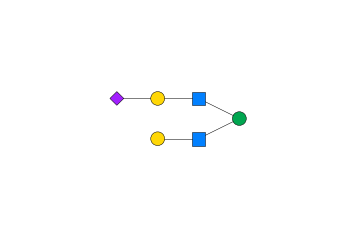

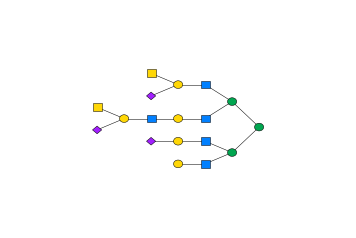

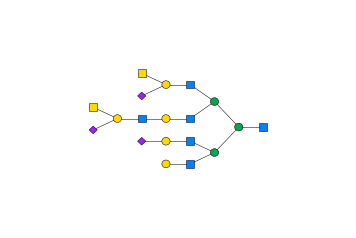

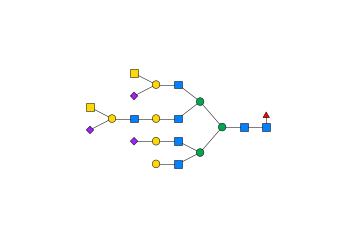

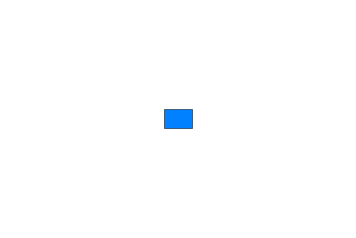

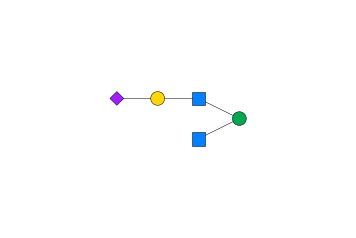

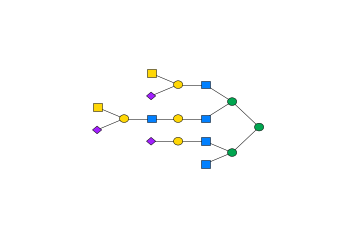

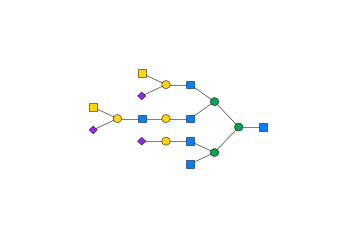

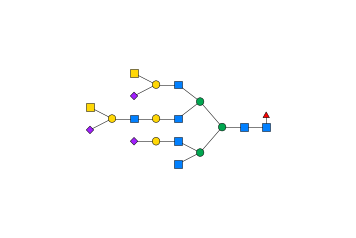

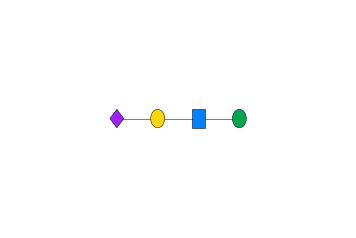

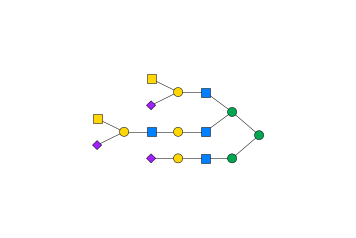

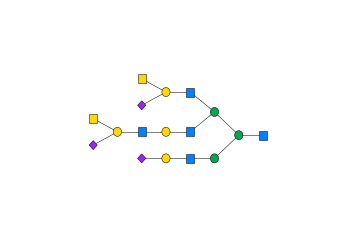

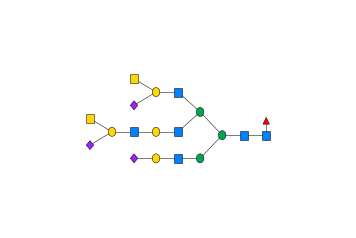

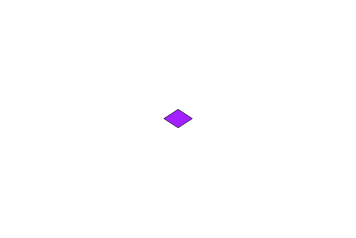

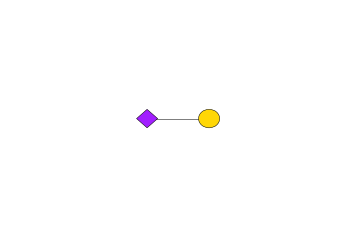

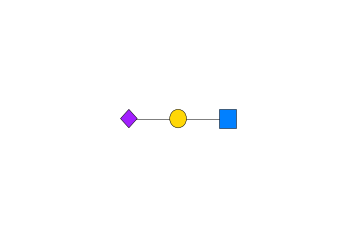

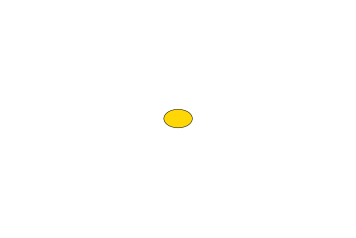

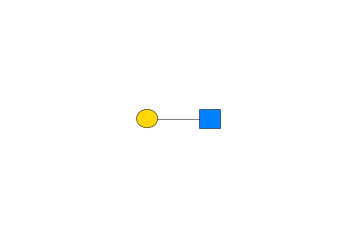

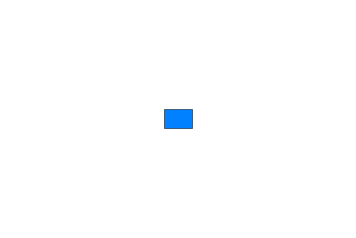

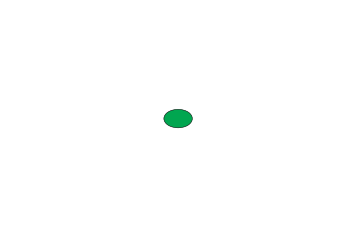

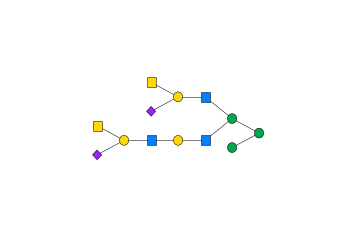

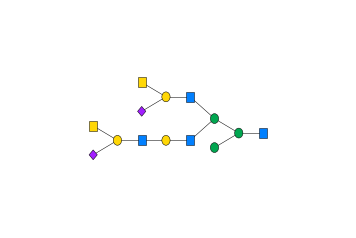

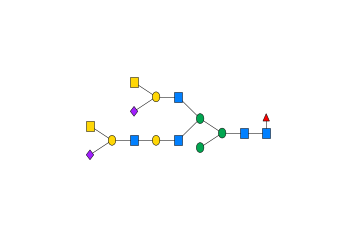

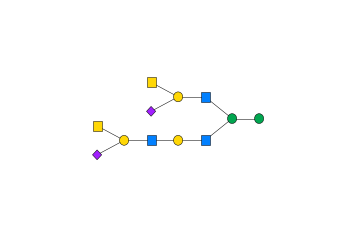

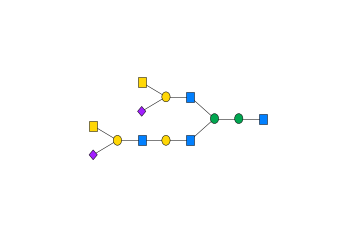

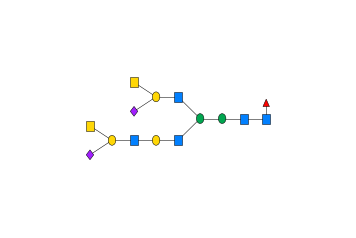

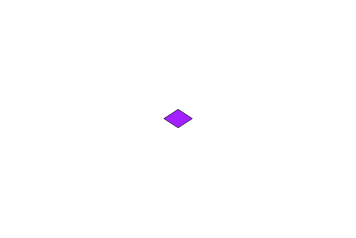

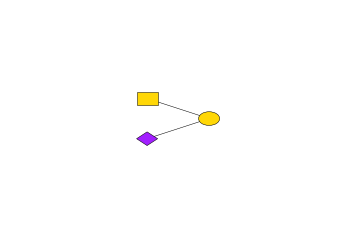

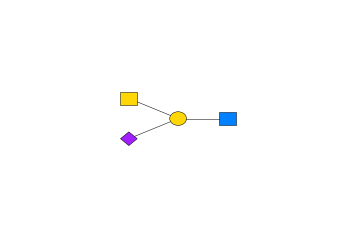

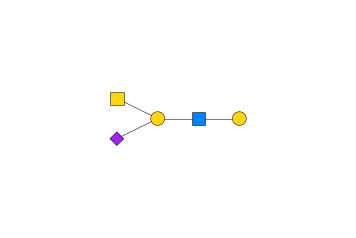

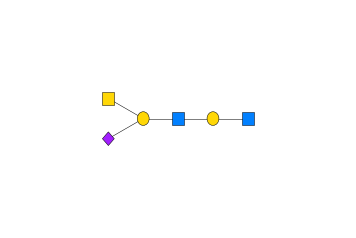

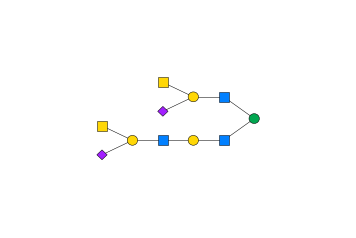

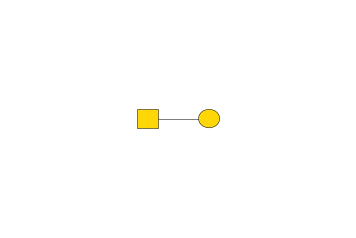

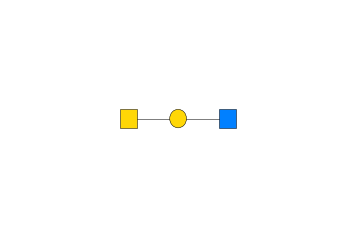

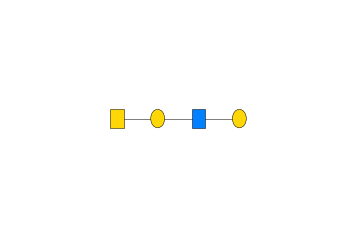

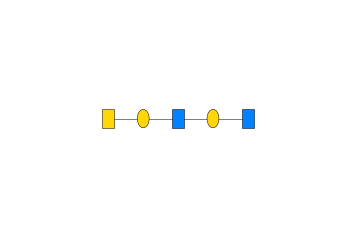

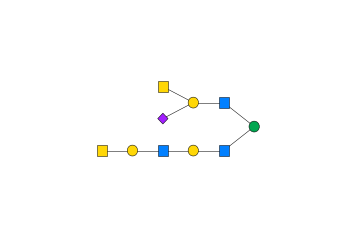

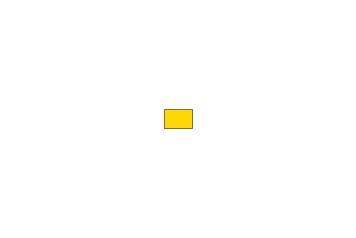

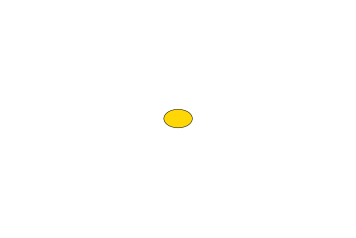

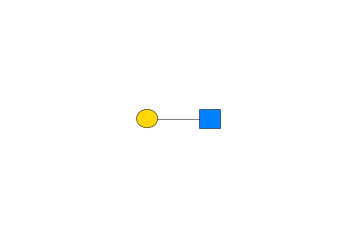

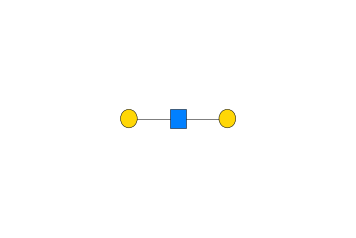

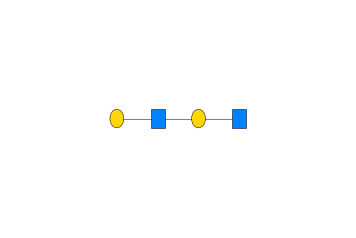

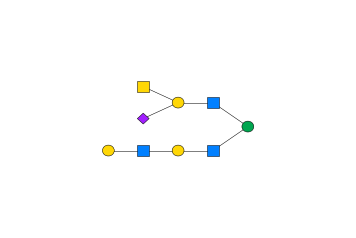

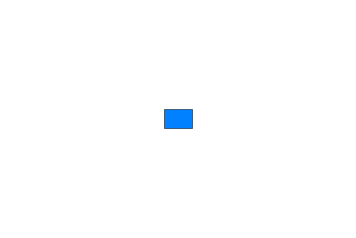

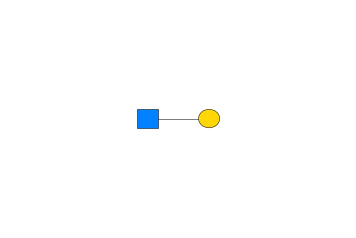

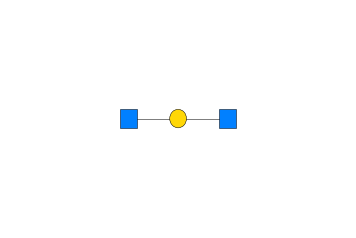

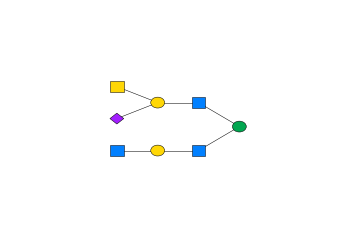

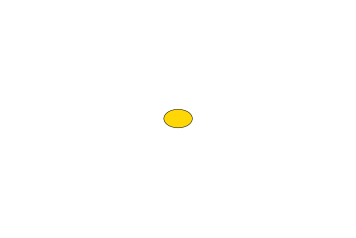

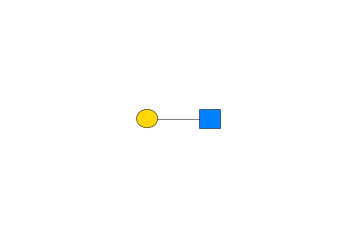

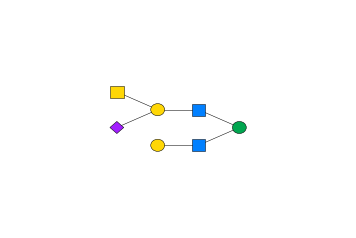

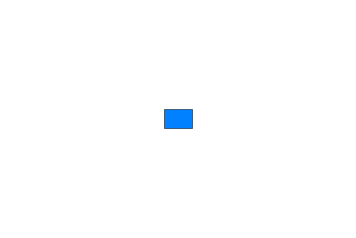

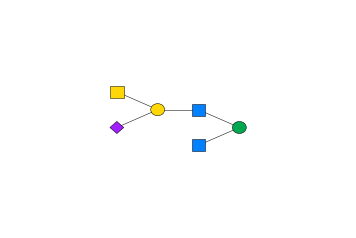

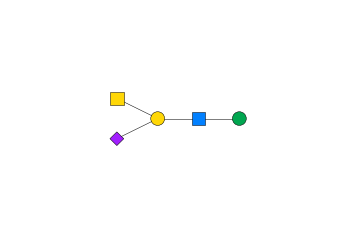

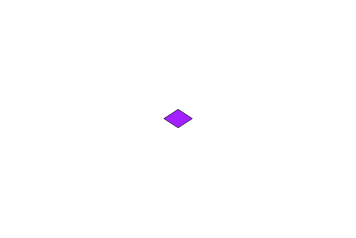

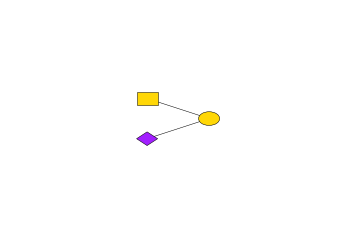

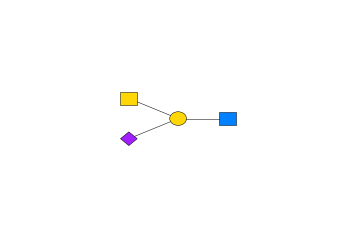

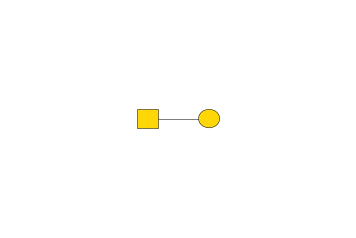

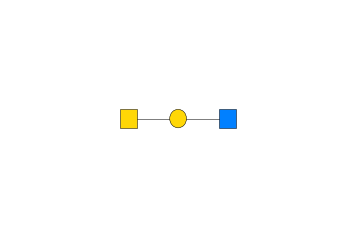

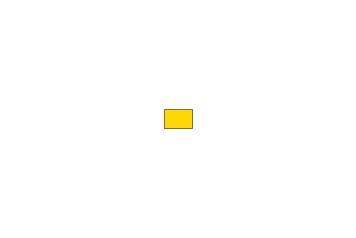

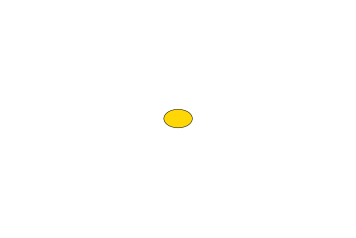

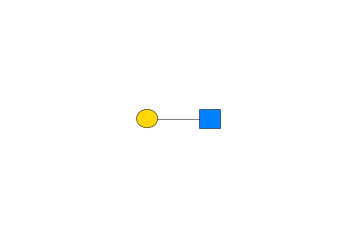

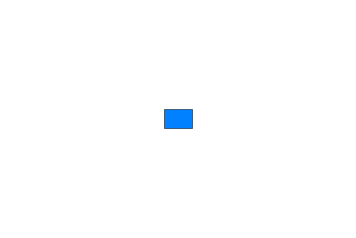

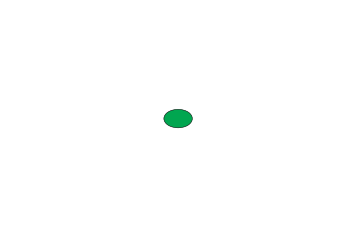

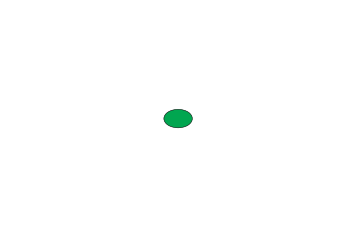

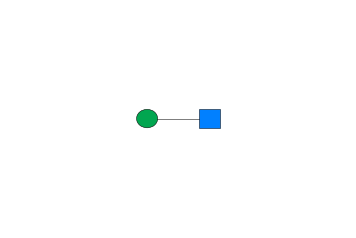

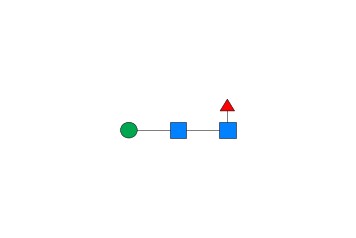

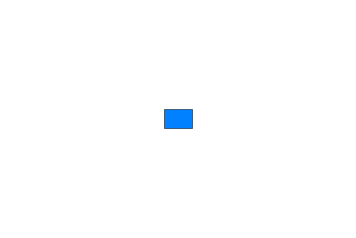

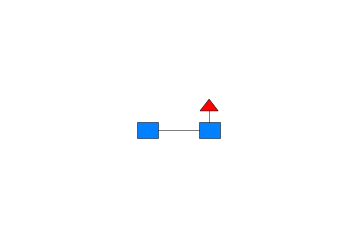

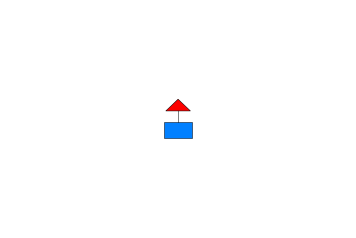

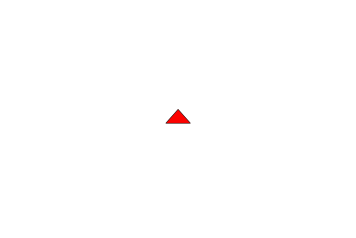

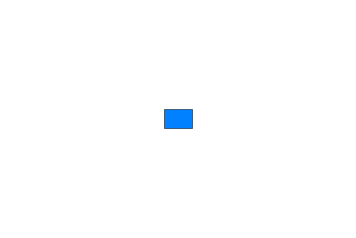

In [98]:
ligand_plottables = set()
ligand_unplottables = set()
for each_match in my_ligand_matches:
    each_lc = str_join('', each_match)
    try:
        parsePlot(each_lc)
        ligand_plottables.add(each_lc)
    except Exception as e:
        ligand_unplottables.add(each_lc)

'Well-formed' (plottable/`glypy`-parseable) matches to the ligand wildcard are all
 - chains
 - chains with (sub)trees (which may be trees or themselves contain trees, which ...)
 - chains with subtrees, but where in at least one case (viz. when the match ends with a left parenthesis), the stem and a right branch are captured by the wildcard, but the left branch is not.

In [99]:
len(ligand_plottables)

72

In [100]:
list(ligand_plottables)

['(ANb4)Ab4GNb3',
 '(ANb4)Ab4GNb2',
 'GNb6',
 '(ANb4)Ab4GNb6',
 'GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 'Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 'GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 '(NNa3(ANb4)Ab4GNb6)Ma6',
 'Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'GNb2(NNa3(ANb4)Ab4GNb6)Ma6',
 '(ANb4)Ab4GNb3Ab4',
 'NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6',
 'NNa3(ANb4)Ab4',
 'GN',
 'GNb3Ab4GNb2',
 'Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 'Ab4GNb3',
 'Ab4GNb2',
 'GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6',
 'Ab4GNb4',
 'Ab4GNb3Ab4',
 '(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'Fa6',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4

In [101]:
#These all start with a parenthesis
ligand_unplottables

{'(ANb4)',
 '(ANb4)Ab4GNb2(NNa6Ab4GNb4)',
 '(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 '(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 '(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)',
 '(Fa6)',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 '(NNa3(ANb4)Ab4GNb6)',
 '(NNa6Ab4GNb4)',
 '(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 '(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 'Ab4GNb2(NNa3(ANb4)Ab4GNb6)',
 'Ab4GNb2(NNa6Ab4GNb4)',
 'Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 'Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 'Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)',
 'GNb2(NNa3(ANb4)Ab4GNb6)',
 'GNb2(NNa6Ab4GNb4)',
 'GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 'GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4G

In [102]:
# for lce in LCEs:
#     print("{0}: {1}".format(lce, get_ligand_matches(lce)))

## Krambeck et al. 2009's `continuation` "_" uncertainty operator

`_` is supposed to match "Any string (possibly empty) where every '(' is matched with a following ')'" (Table 7)

In [103]:
def is_continuation_match(linear_code_expression):
    '''
    Indicates whether `linear_code_expression` (in its entirety) matches (i.e.
    could be substituted with/for `_`).
    '''
    s = linear_code_expression
    if len(s) == 0:
        return True
    return every_left_paren_has_a_right_paren(s)

In [104]:
def get_continuation_matches(linear_code_expression, as_generator=False, with_contexts=False):
    '''
    Returns the nonempty substrings within `linear_code_expression` that match 
    Krambeck et al's `continuation` uncertainty operator `_`.
    '''
    s = linear_code_expression
    subsequences = generate_subsequences(list(tokenizer(s)), True, with_contexts)
#     subsequences = generate_subsequences(s, True)
    if as_generator:
        return (is_continuation_match(subseq) 
                for subseq in subsequences)
    else:
        return tuple(filter(is_continuation_match, subsequences))

'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'

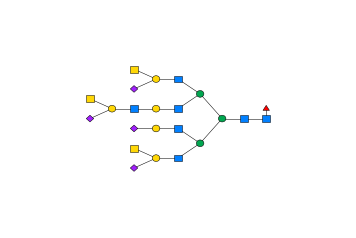

In [105]:
my_tree
parsePlot(my_tree)

In [106]:
my_continuation_matches, my_continuation_nonmatches = split(is_continuation_match, 
                                                            generate_subsequences(tokenizer(my_tree)))

len(my_continuation_matches), len(my_continuation_nonmatches)

(298, 405)

As noted above, it will be useful for ease of investigation/analysis  if we can isolate the subset of continuation uncertainty operator matches that are plottable from those that aren't:

/home/AD/emeinhar/anaconda3/envs/gregex/lib/python2.7/site-packages/glypy/structure/monosaccharide.py:424: UnknownCompositionWarning: x could not be found. It may not have an explicit composition
  composition = _get_standard_composition(self)


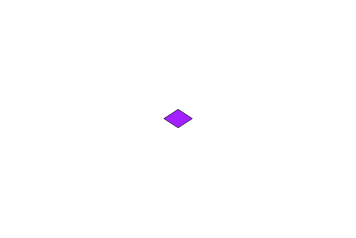

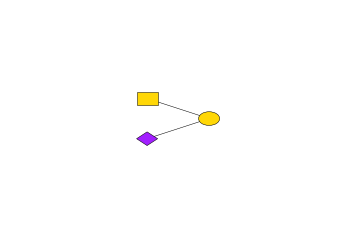

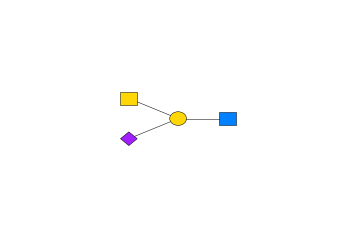

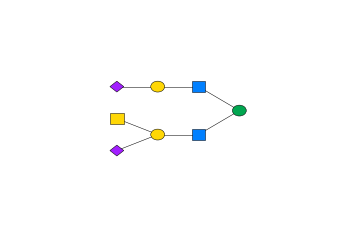

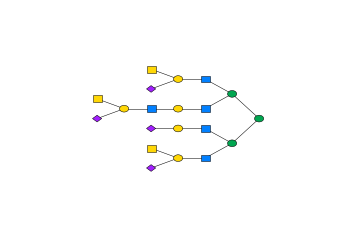

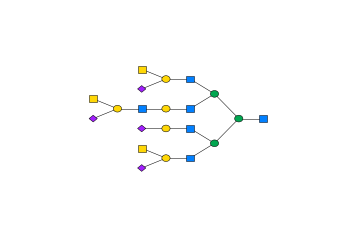

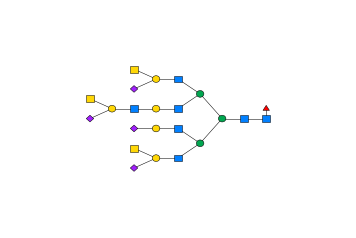

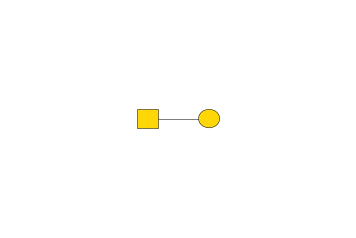

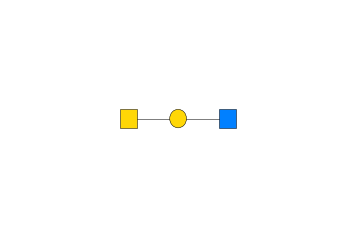

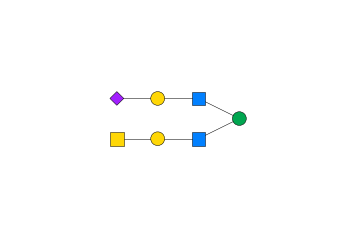

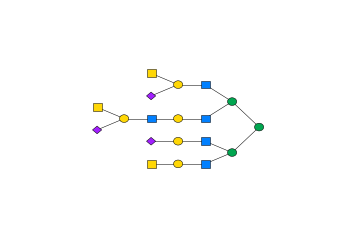

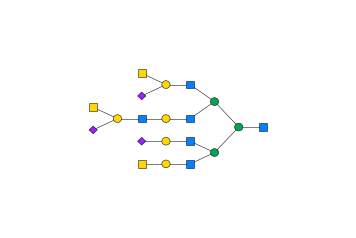

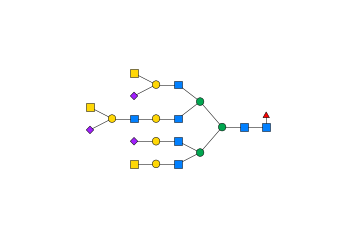

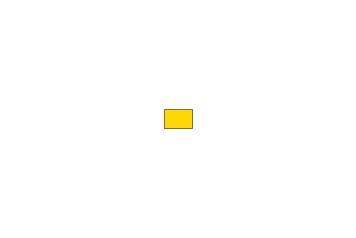

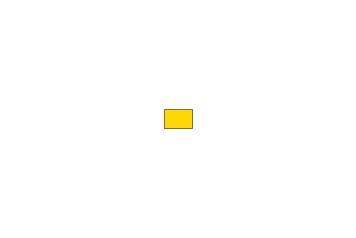

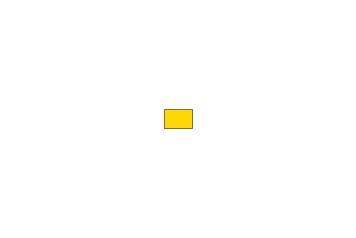

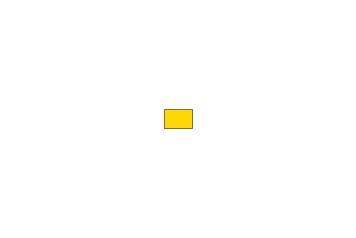

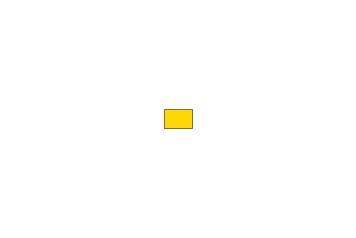

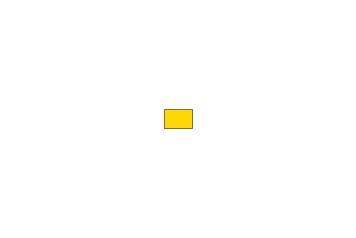

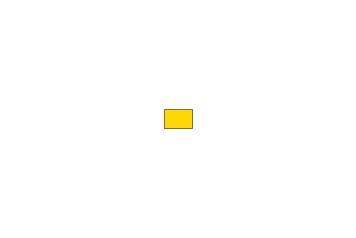

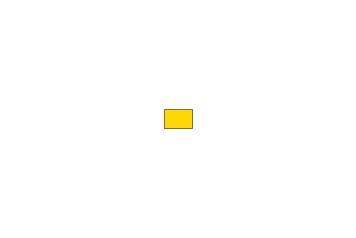

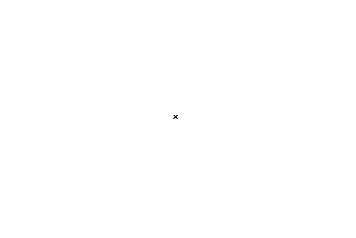

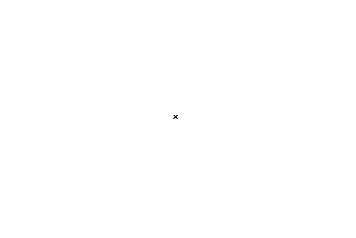

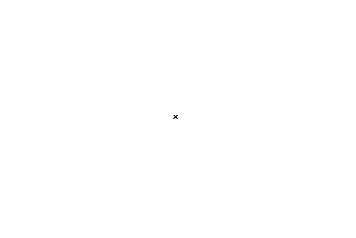

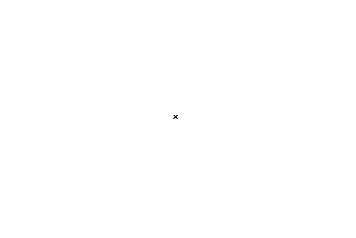

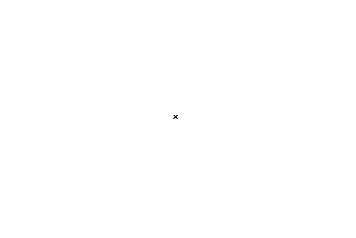

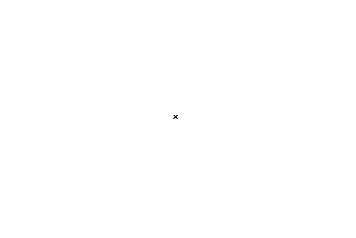

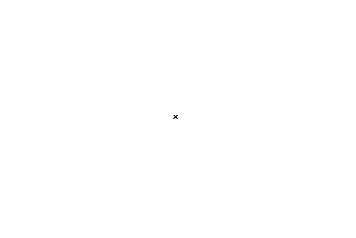

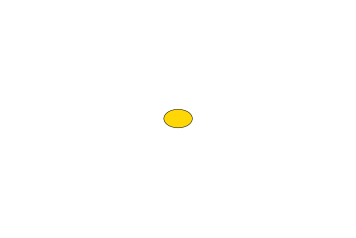

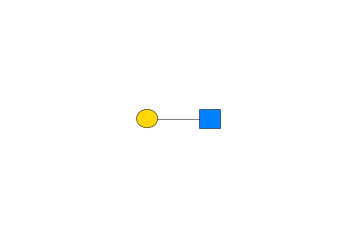

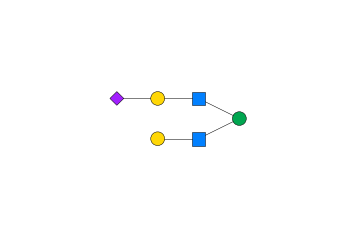

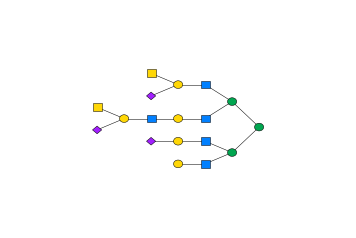

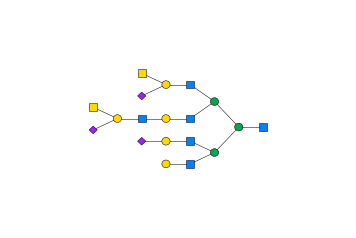

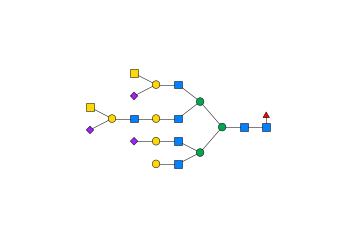

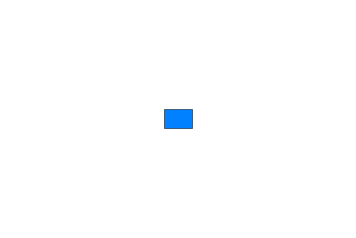

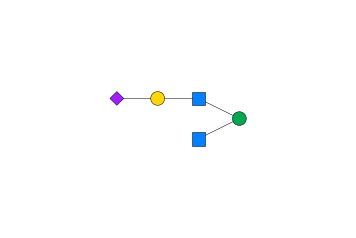

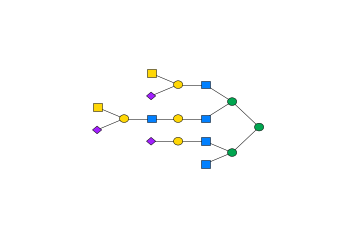

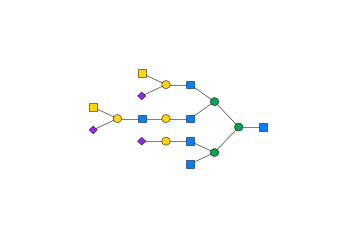

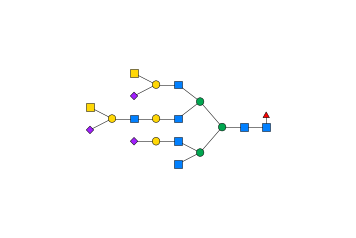

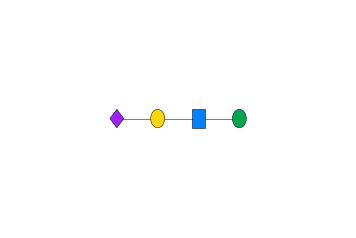

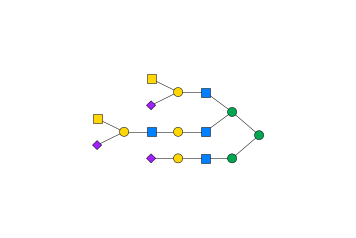

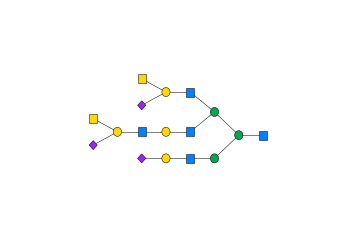

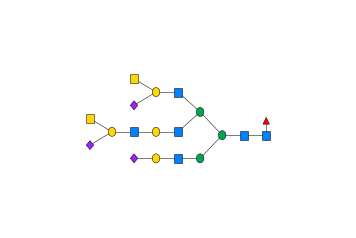

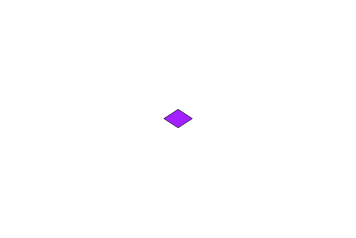

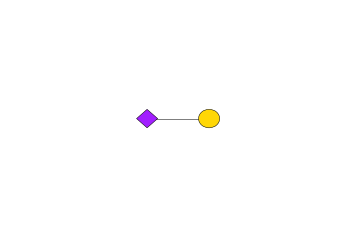

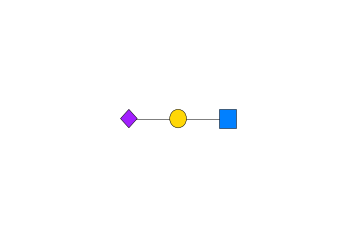

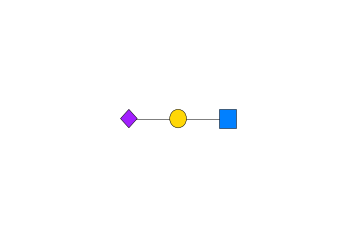

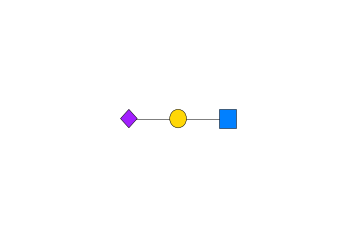

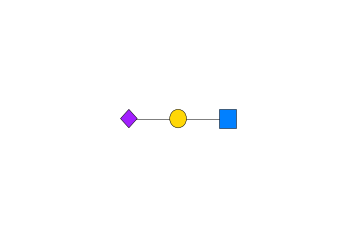

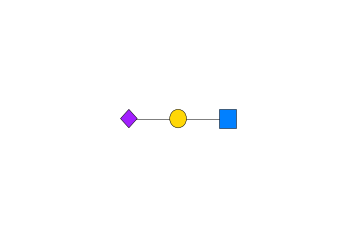

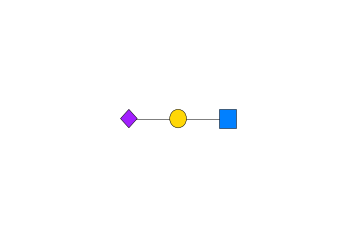

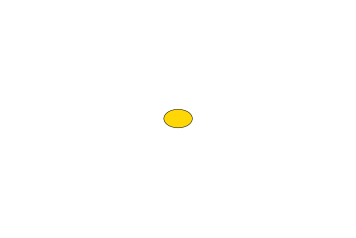

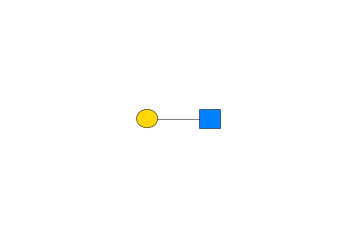

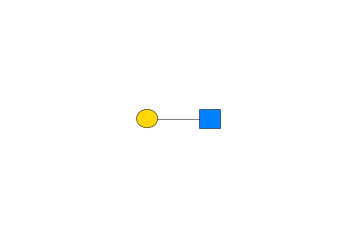

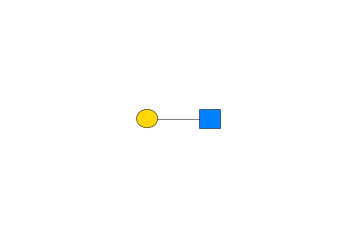

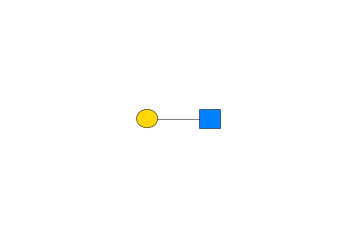

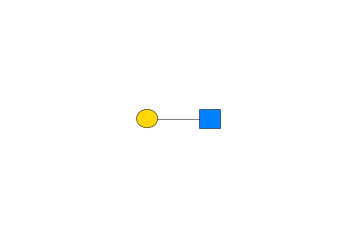

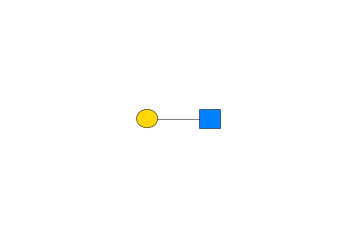

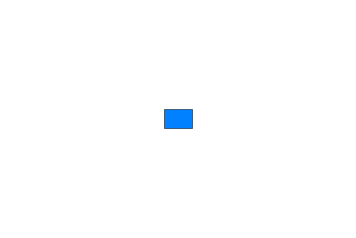

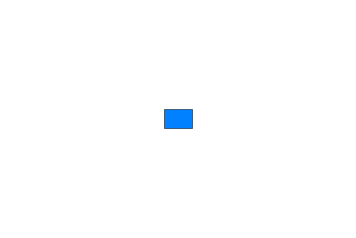

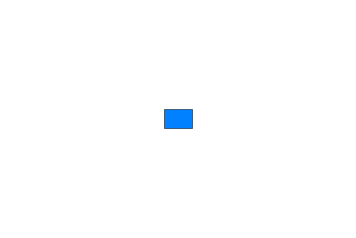

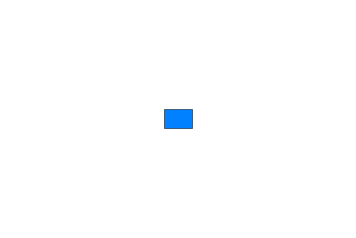

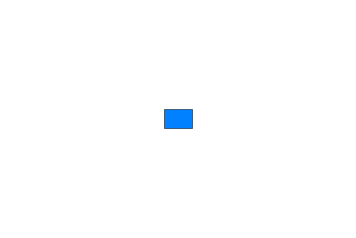

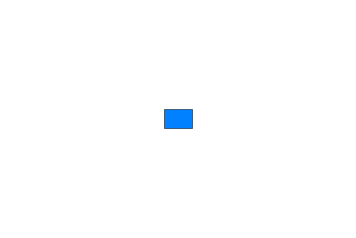

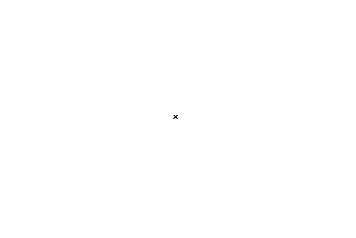

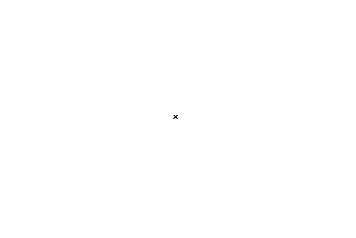

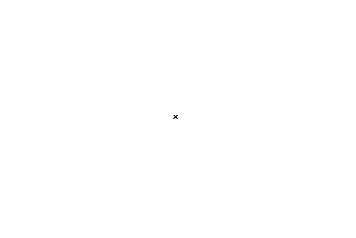

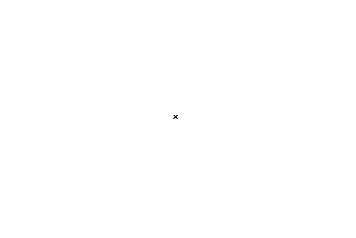

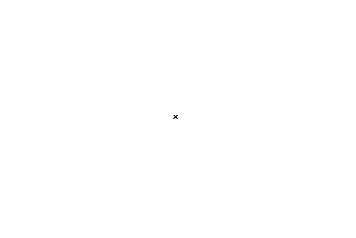

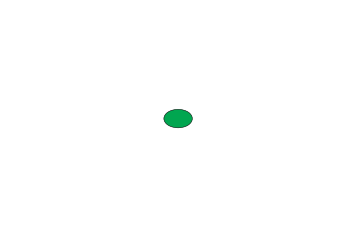

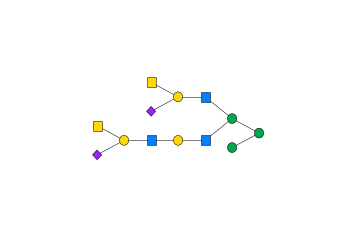

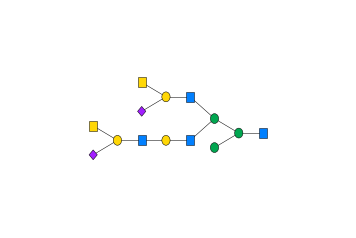

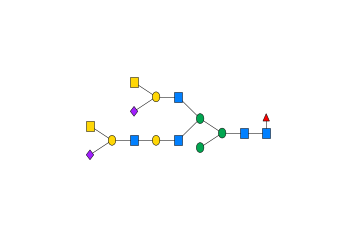

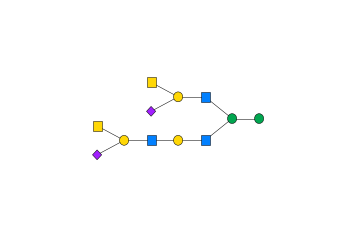

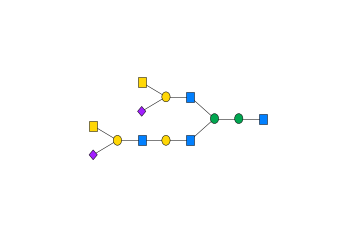

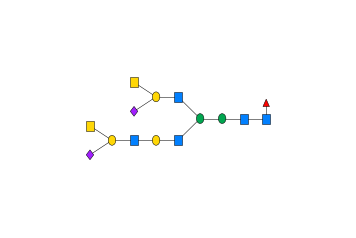

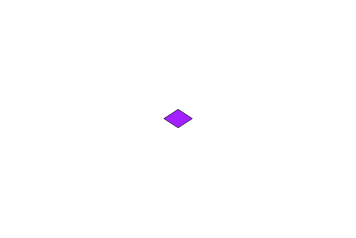

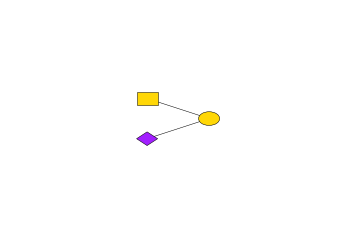

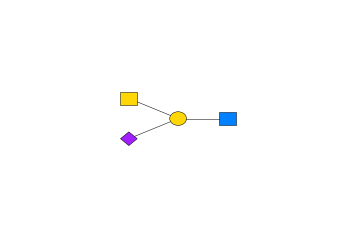

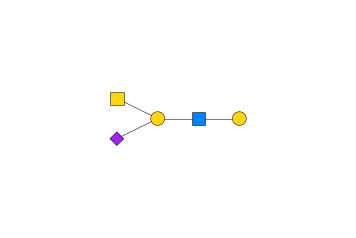

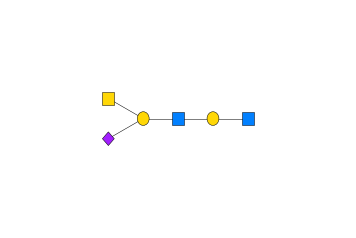

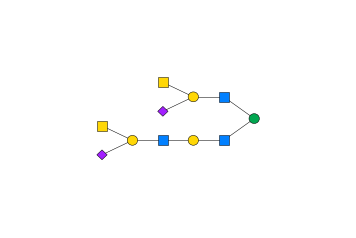

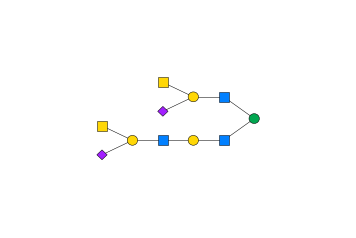

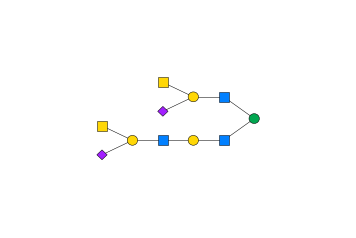

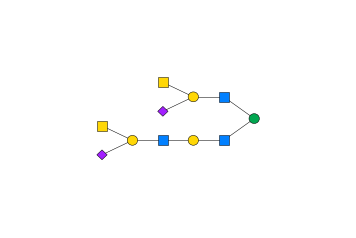

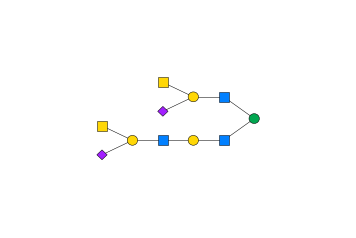

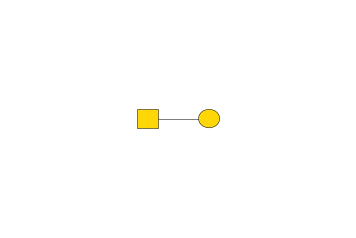

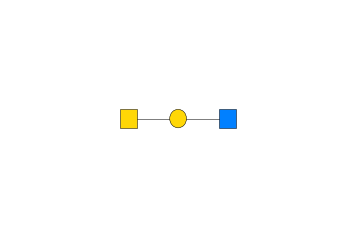

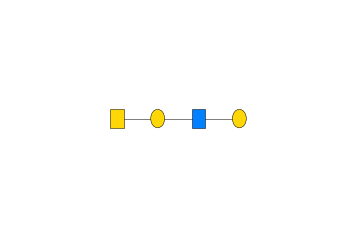

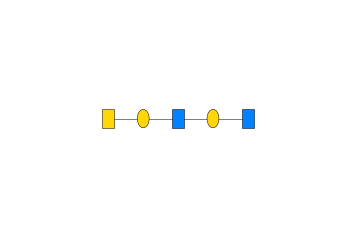

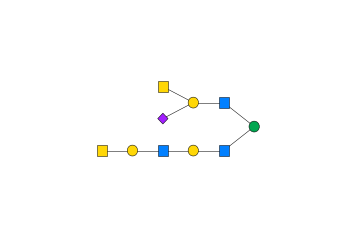

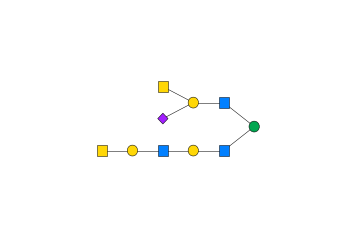

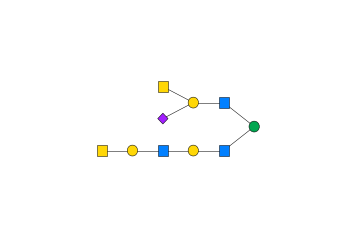

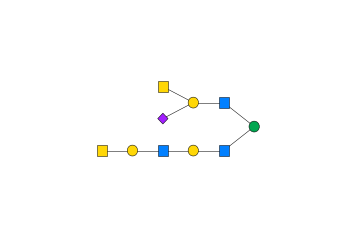

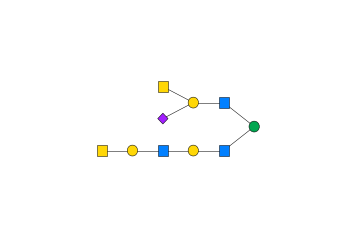

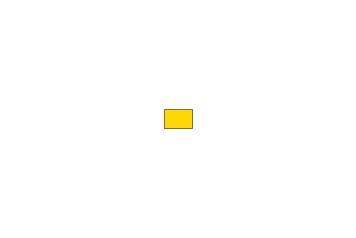

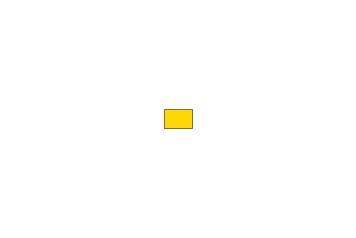

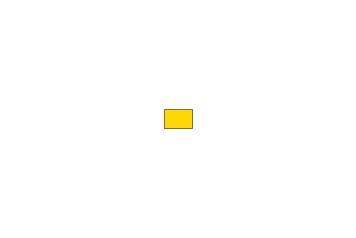

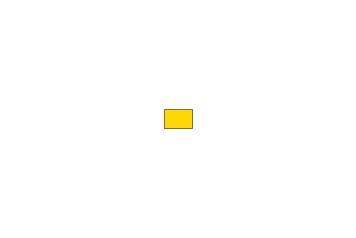

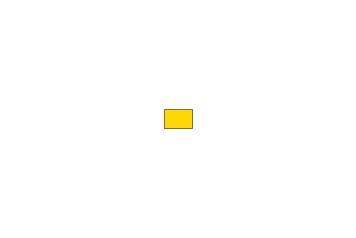

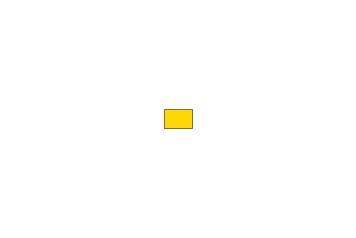

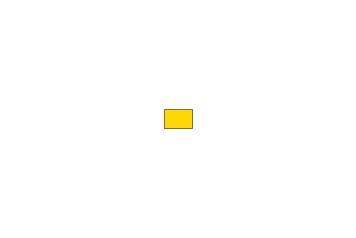

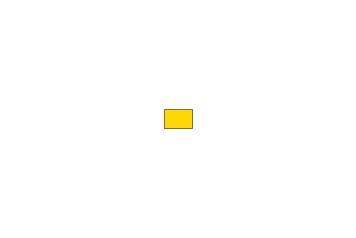

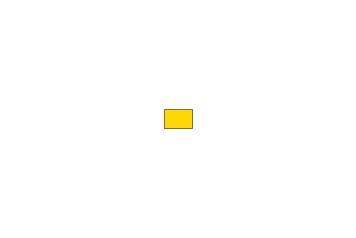

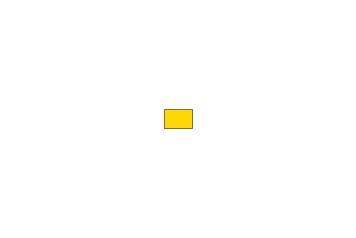

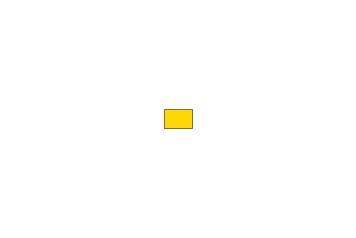

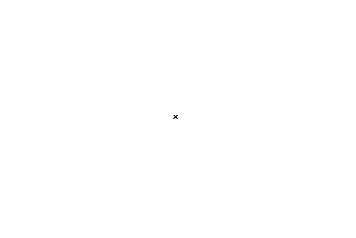

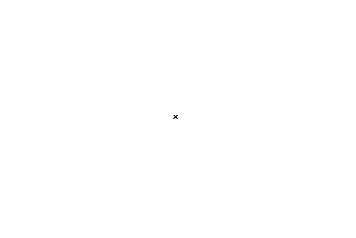

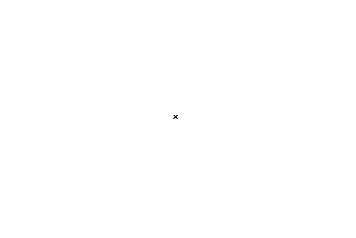

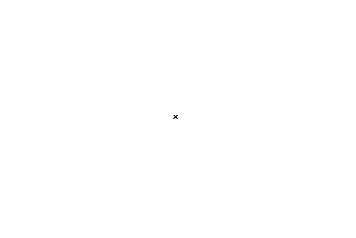

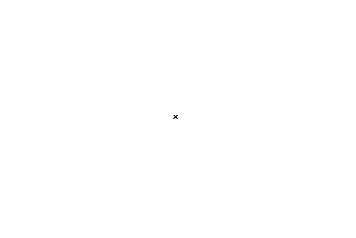

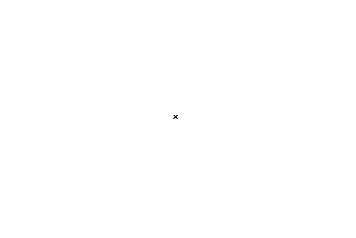

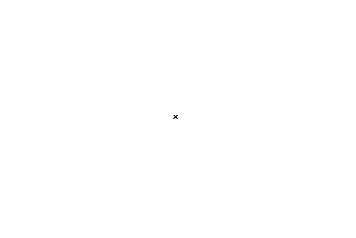

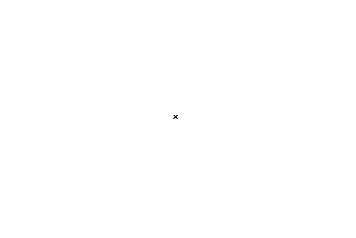

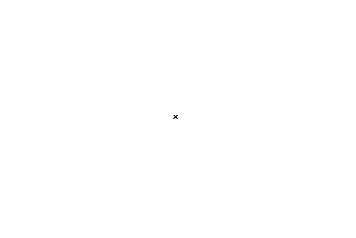

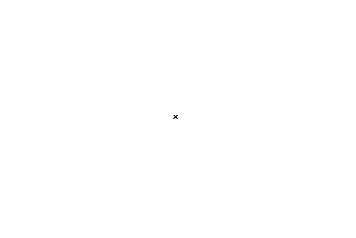

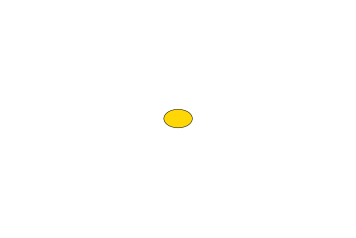

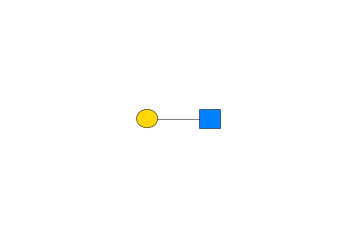

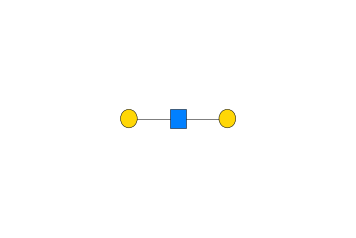

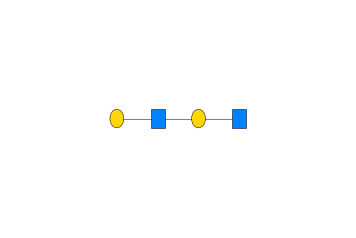

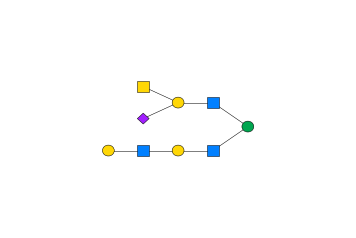

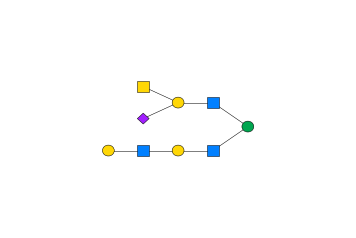

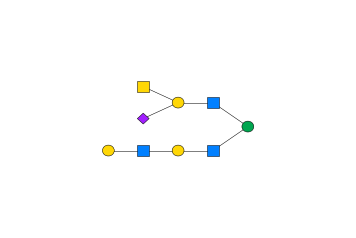

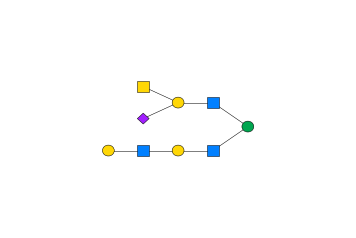

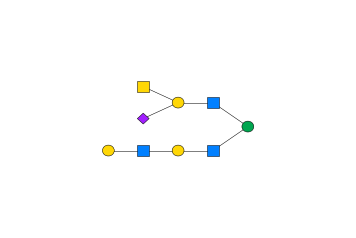

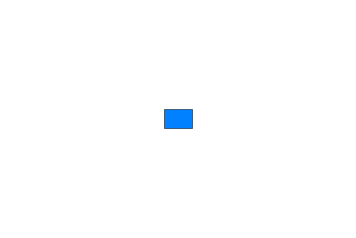

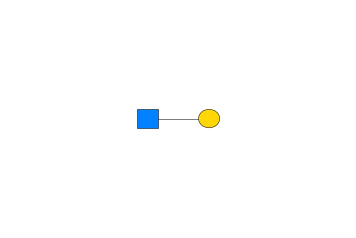

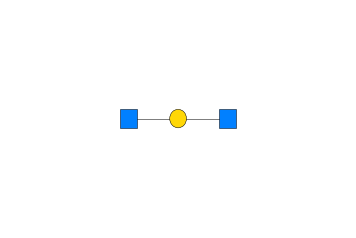

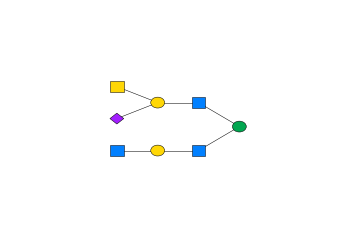

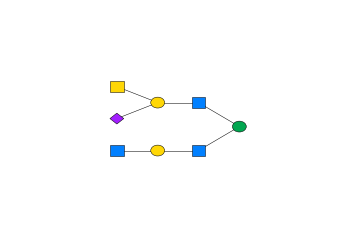

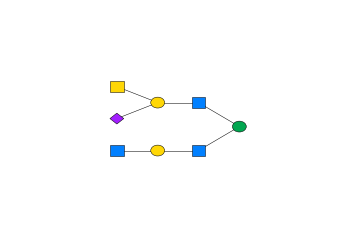

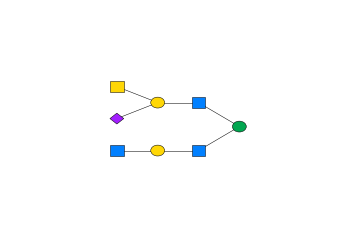

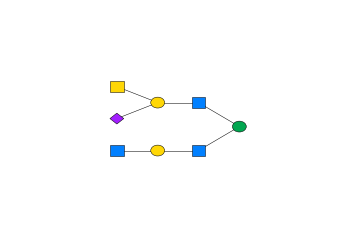

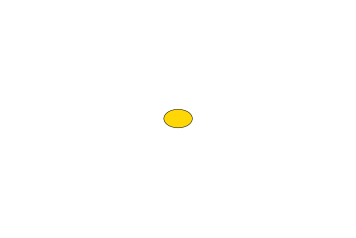

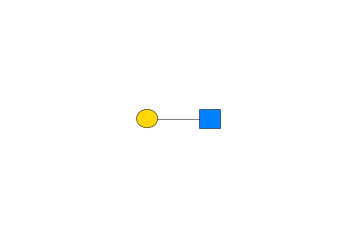

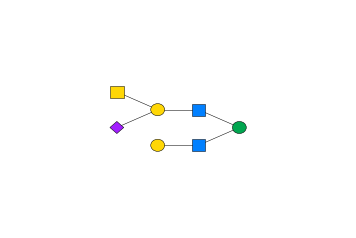

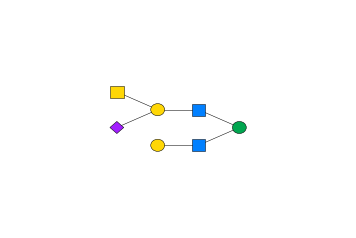

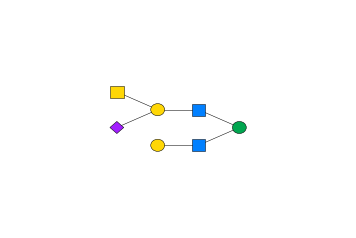

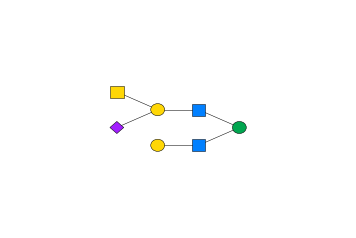

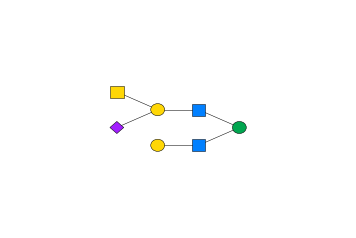

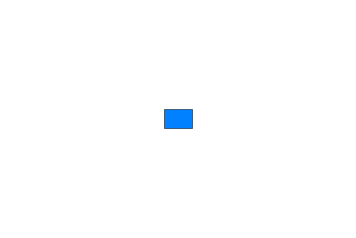

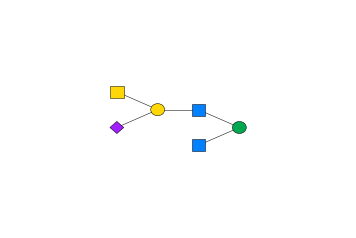

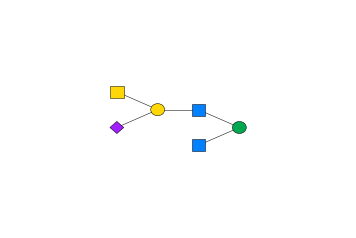

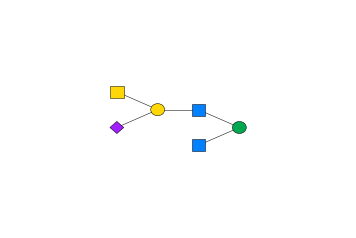

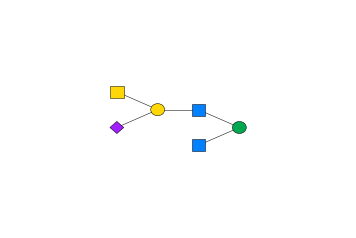

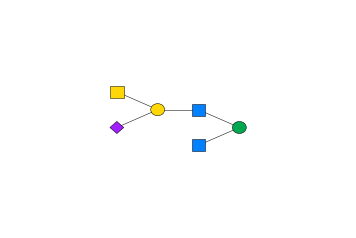

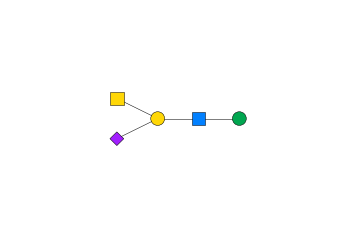

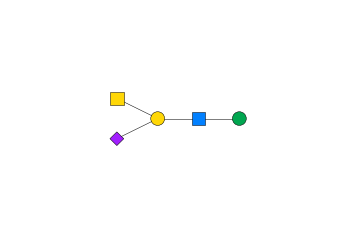

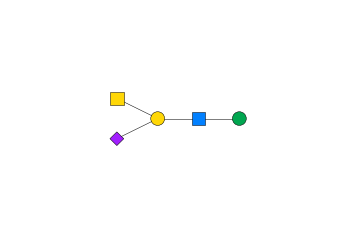

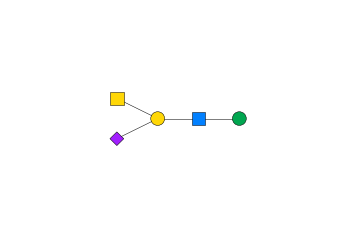

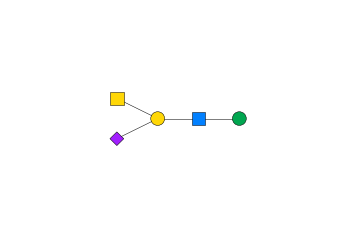

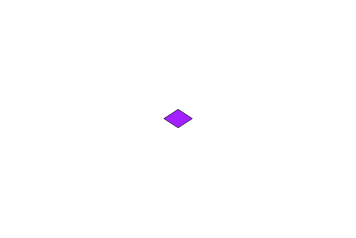

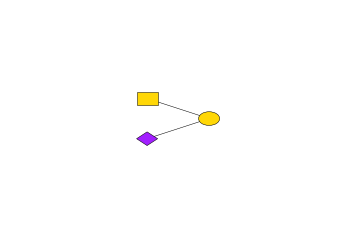

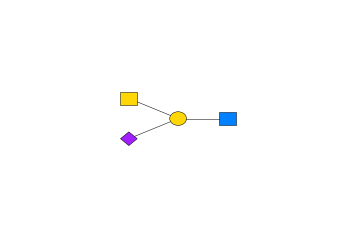

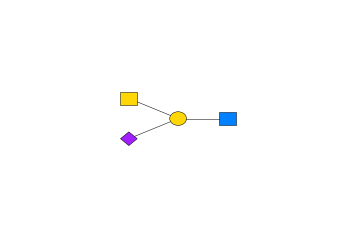

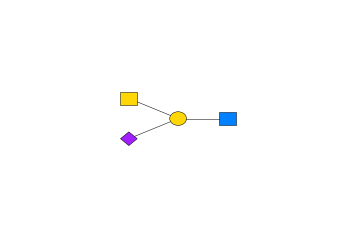

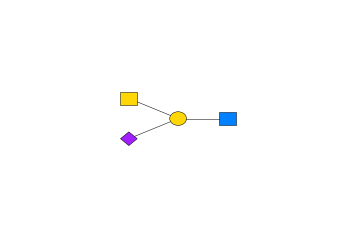

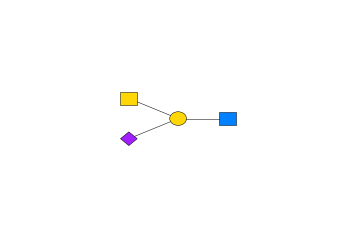

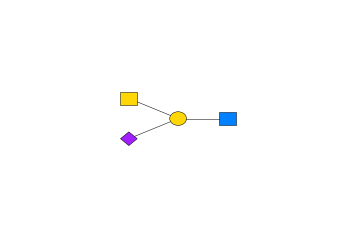

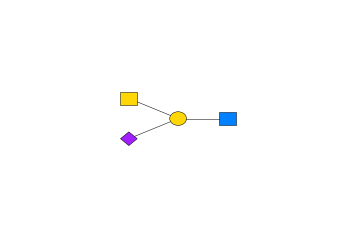

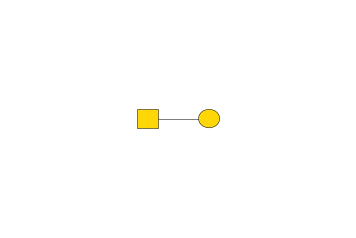

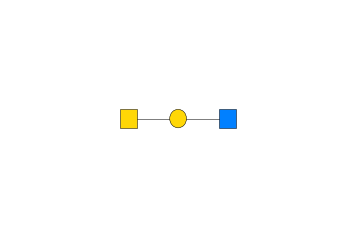

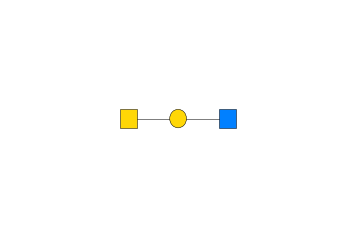

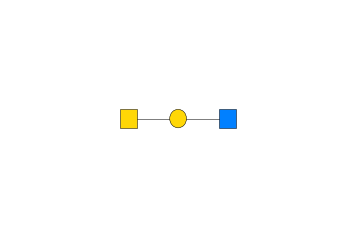

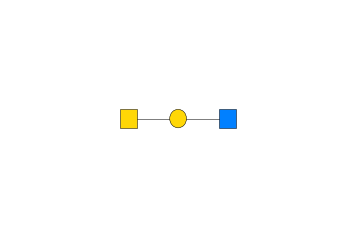

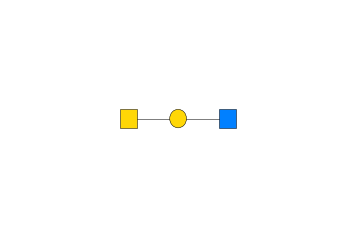

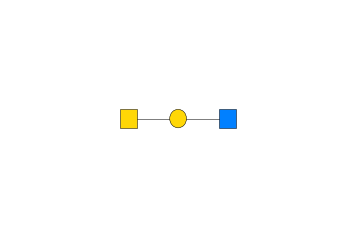

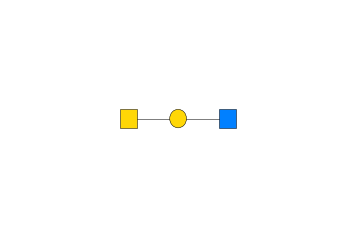

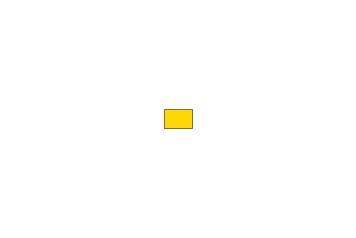

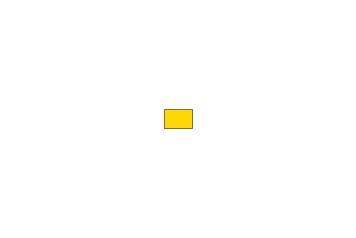

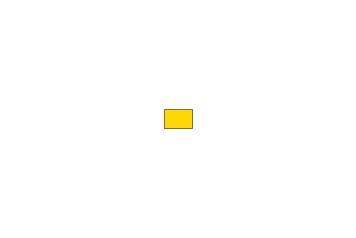

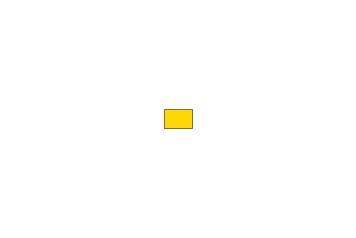

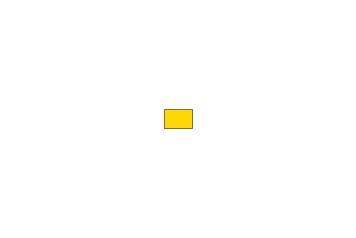

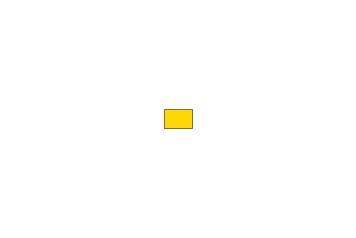

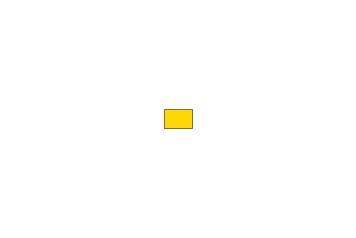

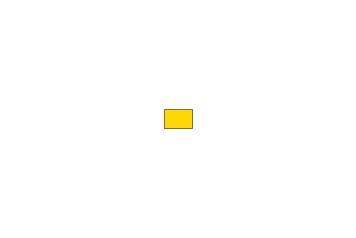

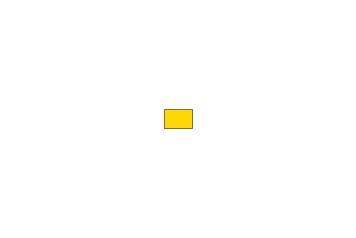

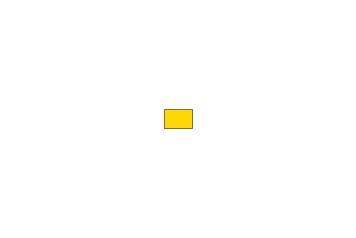

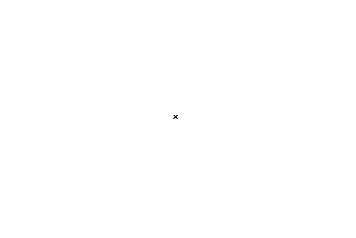

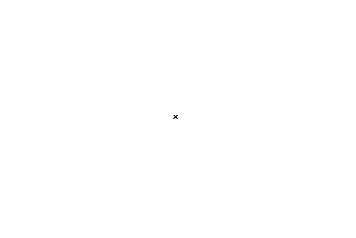

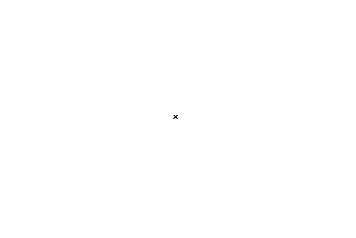

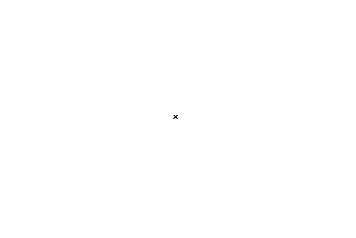

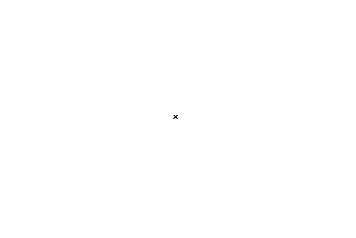

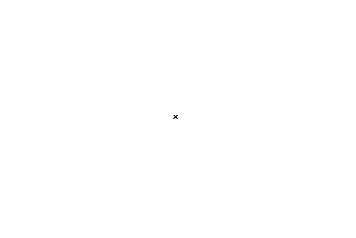

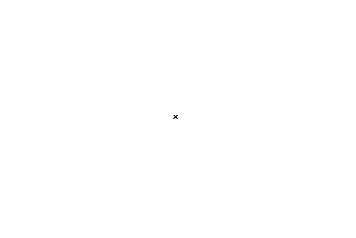

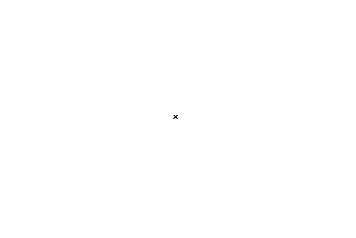

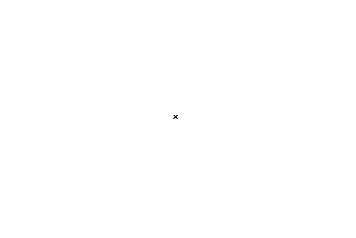

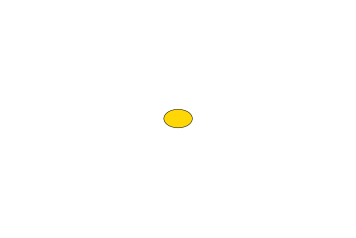

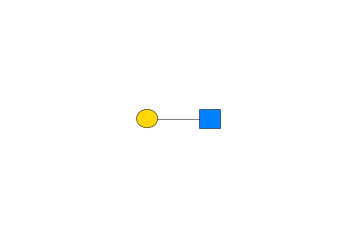

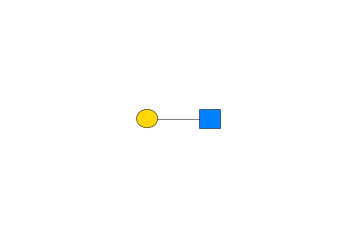

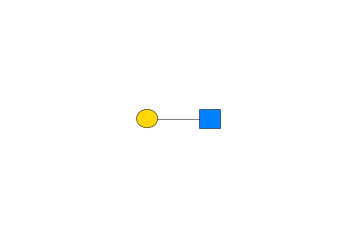

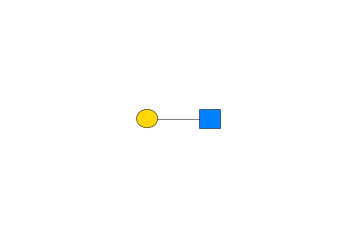

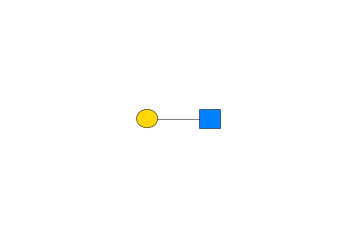

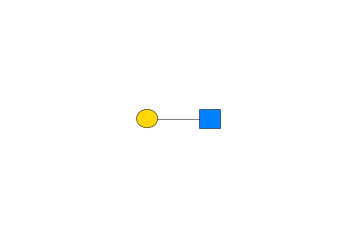

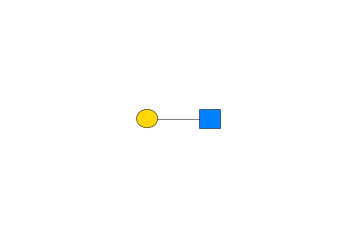

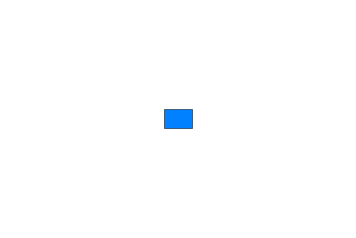

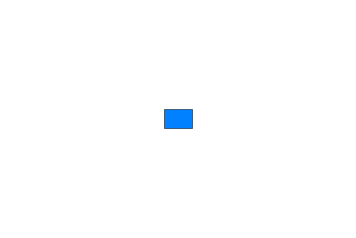

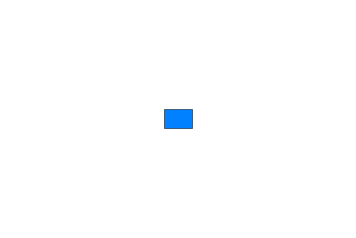

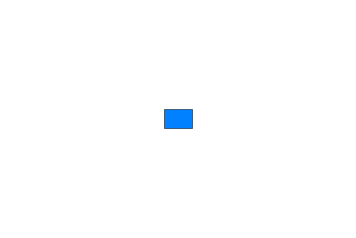

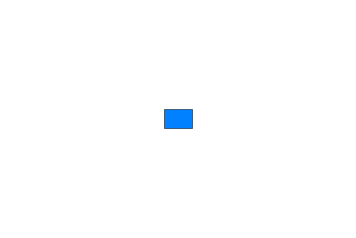

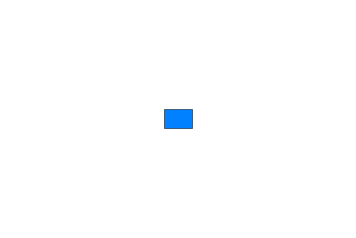

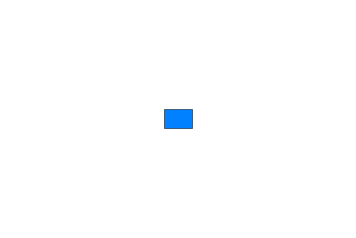

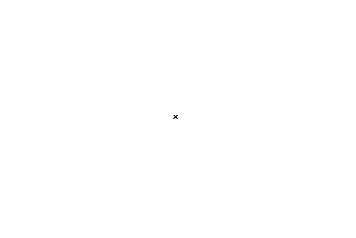

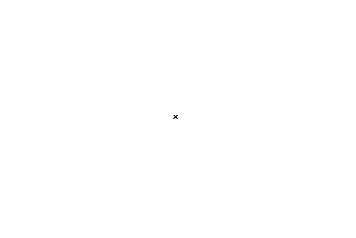

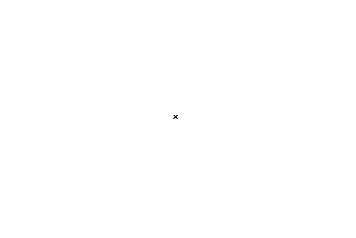

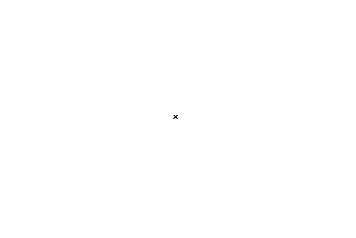

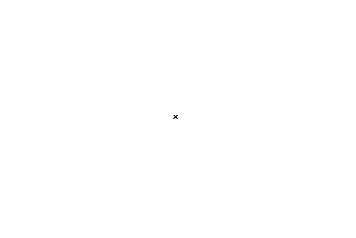

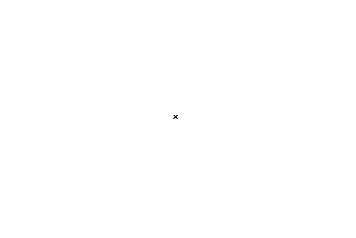

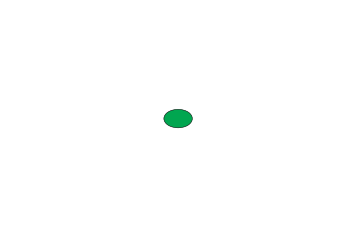

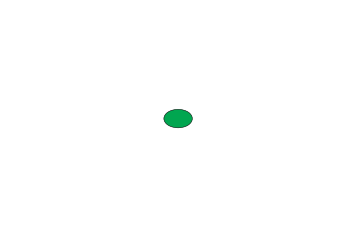

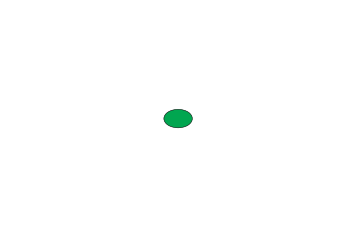

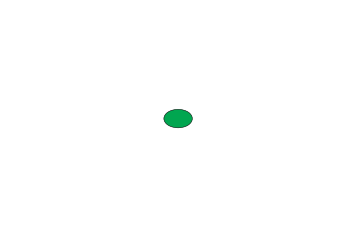

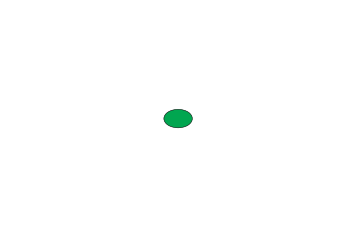

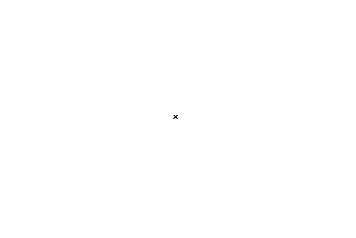

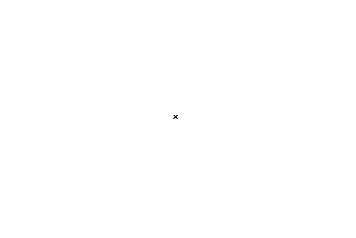

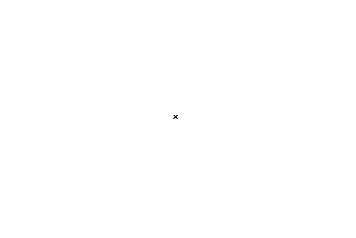

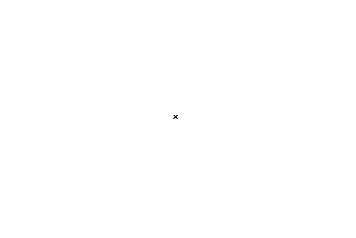

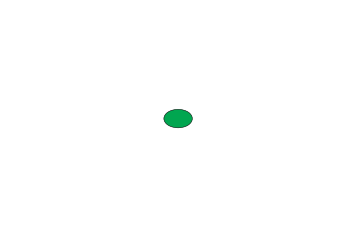

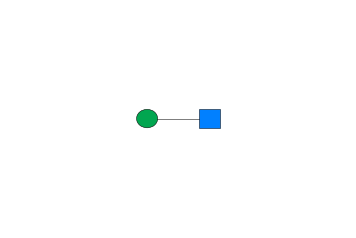

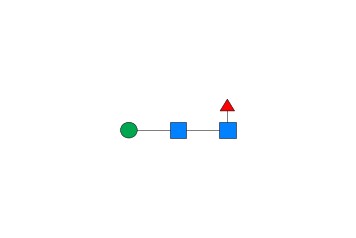

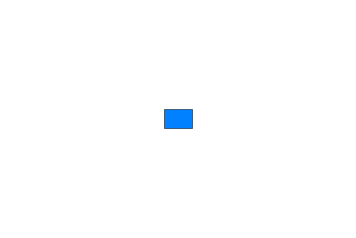

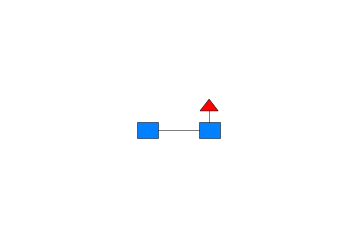

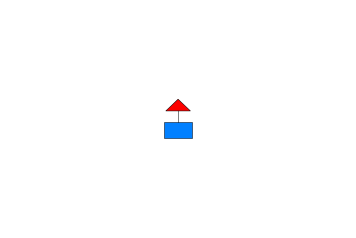

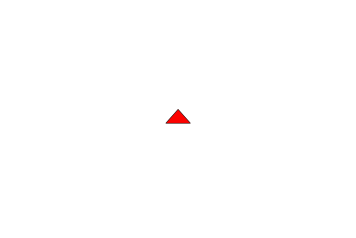

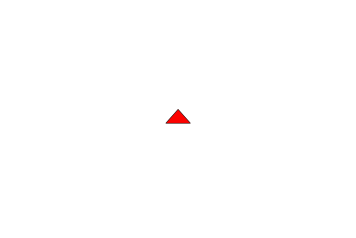

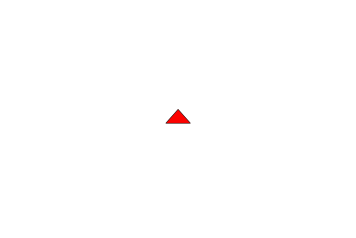

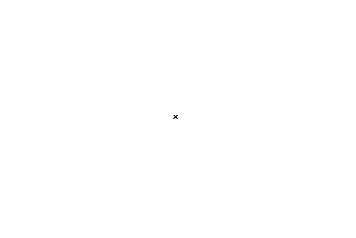

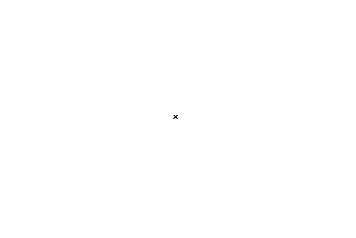

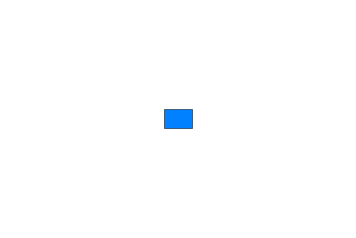

In [107]:
continuation_plottables = set()
continuation_unplottables = set()
for each_match in my_continuation_matches:
    each_lc = str_join('', each_match)
    try:
        parsePlot(each_lc)
        continuation_plottables.add(each_lc)
    except Exception as e:
        continuation_unplottables.add(each_lc)

In [108]:
my_tree

'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'

In [109]:
list(continuation_plottables)

['(ANb4)Ab4GNb3',
 '(ANb4)Ab4GNb2',
 '(ANb4)Ab4GNb6',
 'Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 'GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(NNa3(ANb4)Ab4GNb6)Ma6',
 ')Ma6)',
 'Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '(ANb4)Ab4GNb6)Ma6)',
 'NNa3(ANb4)Ab4',
 'ANb4)Ab4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'Ab4GNb2',
 'Ab4GNb4',
 'Ab4GNb3Ab4',
 'NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 ')Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 'ANb4)Ab4GNb6)Ma6)Ma4',
 '(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 'NNa6Ab4GNb4)',
 '(ANb4)Ab4GNb3Ab4GNb2',
 'NNa6Ab4',
 ')Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 ')Ab4GNb6)Ma6)Ma4GNb4',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'Ma6)Ma4GNb4(Fa6)GN',
 '(ANb4)Ab4GNb6)',
 '(ANb4)Ab4GNb3Ab4GNb2(NNa

In [110]:
#These all start with a parenthesis.
list(continuation_unplottables)

[')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 ')Ab4GNb2(NNa6Ab4GNb4)',
 'NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 ')Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 'GNb4(Fa6)',
 ')Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 'ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 '(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 'Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 '(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)',
 '(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 '(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 'Ab4GNb2(NNa3(ANb4)Ab4GNb6)',
 'Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 'ANb4)Ab4GNb2(NNa6Ab4GNb4)',
 'NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 'GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 '(ANb4)Ab4GNb2(NNa6Ab4GNb4)',
 'ANb4)Ab4GNb2

## Identifying what continuation wildcards can capture that ligand wildcards can't

Recall that all matches are based on:

'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'

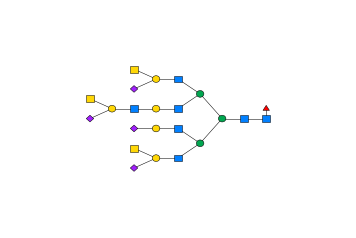

In [111]:
my_tree
parsePlot(my_tree)

### Continuation matches are a superset of ligand matches

In [112]:
len(my_ligand_matches)
len(my_continuation_matches)

122

298

In [113]:
len(set(map(tuple, my_ligand_matches)))
len(set(map(tuple, my_continuation_matches)))

my_ligand_matches_unique = set(map(tuple, my_ligand_matches))
my_continuation_matches_unique = set(map(tuple, my_continuation_matches))

103

267

In [114]:
len(my_ligand_matches_unique - my_continuation_matches_unique)
len(my_continuation_matches_unique - my_ligand_matches_unique)

0

164

As might be expected from their definitions, `ligand` wildcard matches are a proper subset of `continuation` matches.

### What's unique to continuation matches?

Let's take a look at what's unique to `continuation` matches relative to `ligand` matches:

In [115]:
map(partial(str_join, ''),
    (my_continuation_matches_unique - my_ligand_matches_unique))

# map(partial(str_join, ' '),
#     (my_continuation_matches_unique - my_ligand_matches_unique))

[')Ma6)Ma4',
 'GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 'Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 'Ab4GNb6)',
 'NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 'ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 'GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 'ANb4)Ab4GNb6)Ma6',
 'GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 'Fa6)GN',
 ')Ma4',
 'Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 'GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 ')Ab4GNb6)',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 'ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 'GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)',
 'NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 'GNb6)Ma6)Ma4GNb4(Fa6)',
 ')Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '(NNa3

In [116]:
#less garbage than the cell above
set(continuation_plottables) - set(ligand_plottables)

{'(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 '(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 '(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '(ANb4)Ab4GNb6)',
 '(ANb4)Ab4GNb6)Ma6',
 '(ANb4)Ab4GNb6)Ma6)',
 '(ANb4)Ab4GNb6)Ma6)Ma4',
 '(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '(NNa3(ANb4)Ab4GNb6)Ma6)',
 '(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 '(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 ')',
 ')Ab4',
 ')Ab4GNb2',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 ')Ab4GNb3',
 ')Ab4GNb3Ab4',
 ')Ab4GNb3Ab4GNb2',
 ')Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6',
 ')Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 ')Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',

Suppose a continuation wildcard `_` appears in a string `l_r` where `l` and `r` are such that `l_r` is a well-formed linear code expression. Let 'the context (of a continuation token)' denote `l,r`.

Continuation wildcards can match substrings `s` describing trees where at least one node branches, and it is neither the case that 
 - the rightmost subtree `b_r` of this branching is completely specified by `s`: how does it continue? as a chain? as a subtree? if as a subtree, what are its non-rightmost subbranches? All such questions must be answerable by `l`.
 - the branch/subtree `b_l` to the left of `b_r` is described by `s`

Let's see left contexts for continuation matches:

'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'

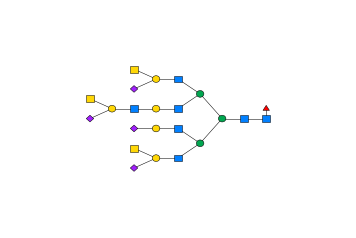

In [117]:
my_tree
parsePlot(my_tree)

In [118]:
my_continuation_matches_w_contexts, _ = split(is_continuation_match, 
                                              generate_subsequences(tokenizer(my_tree), 
                                                                    with_contexts=True))

len(my_continuation_matches_w_contexts)

703

In [119]:
print(my_continuation_matches_w_contexts[0])

([], ['NNa3'], ['(', 'ANb4', ')', 'Ab4', 'GNb2', '(', 'NNa6', 'Ab4', 'GNb4', ')', 'Ma3', '(', 'NNa3', '(', 'ANb4', ')', 'Ab4', 'GNb3', 'Ab4', 'GNb2', '(', 'NNa3', '(', 'ANb4', ')', 'Ab4', 'GNb6', ')', 'Ma6', ')', 'Ma4', 'GNb4', '(', 'Fa6', ')', 'GN'])


'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'

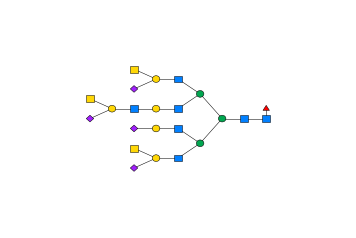

In [120]:
my_tree
parsePlot(my_tree)

In [121]:
plottable_matches_w_contexts = tuple(filter(lambda lcr: lcr[1] in set(continuation_plottables) - set(ligand_plottables),
                                            map(lambda lcr: tuple(map(partial(str_join, ''), lcr)),
                                                my_continuation_matches_w_contexts)))
plottable_matches_w_contexts

(('NNa3(',
  'ANb4)',
  'Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'),
 ('NNa3(',
  'ANb4)Ab4',
  'GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'),
 ('NNa3(',
  'ANb4)Ab4GNb2',
  '(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'),
 ('NNa3(',
  'ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3',
  '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'),
 ('NNa3(',
  'ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
  'GNb4(Fa6)GN'),
 ('NNa3(',
  'ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
  '(Fa6)GN'),
 ('NNa3(',
  'ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
  ''),
 ('NNa3(ANb4',
  ')',
  'Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'),
 ('NNa3(ANb4',
  ')Ab4',
  'GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4G

In [122]:
def removeUnbalancedCloseParens(s):
    clean_s = ''
    paren_stack = []
    for x in s:
        if x == '(':
            paren_stack.append(x)
            clean_s += x
        elif x == ')':
#             if len(paren_stack) == 0:
#                 return False
#             top = paren_stack[-1]
            if len(paren_stack) > 0:
                paren_stack.pop()
                clean_s += x
        else:
            clean_s += x
    return clean_s

In [123]:
test_cases = ['()', '(())', ')', '())', '))', ')())']

for each in test_cases:
    removeUnbalancedCloseParens(each)

'()'

'(())'

''

'()'

''

'()'

In [124]:
def removeDanglingBondLocation(lce):
    if lce[0] in bonds:
        return lce[1:]
    return lce

In [125]:
def analyze_match(i, matches):
    match = matches[i]
    l = match[0]
    c = match[1]
    r = match[2]
    tree = l + c + r
    ti = 'Whole tree:\n\t{0}'.format(tree)
#     ti = 'Whole tree:\n\t{0}\n\t= {1}'.format(tree, parse_exp(tree, 's-exp'))
    
    lci = "Left context:\n\t{0}".format(l)
    mi = "Match:\n\t{0}".format(c)
    rci = "Right context:\n\t{0}".format(r)
    
    print(ti + '\n' + lci + '\n' + mi + '\n' + rci)
    
    parsePlot(l + c + r)
    print('Showing whole tree...')
    
    try:
        parsePlot(l)
        print('Showing left context plot...')
    except Exception as e:
        try:
            parsePlot(l[:-1])
            print('Showing left context plot...')
        except Exception as e:
            print('Left context not plottable.')
    
    parsePlot(removeUnbalancedCloseParens(c))
    print('Showing match plot...')
    
    try:
        parsePlot(r)
        print('Showing right context plot...')
    except Exception as e:
        try:
            parsePlot(removeDanglingBondLocation(r))
#             parsePlot(removeUnbalancedCloseParens(r))
            print('Showing right context plot...')
        except Exception as e:
            print('Right context not plottable.')


Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(
Match:
	ANb4)
Right context:
	Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


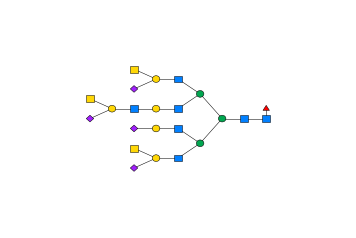

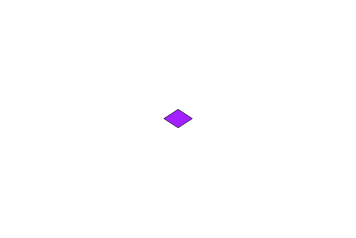

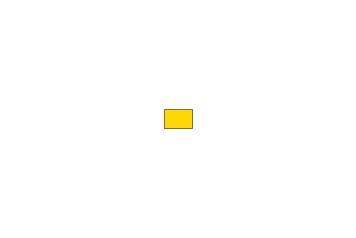

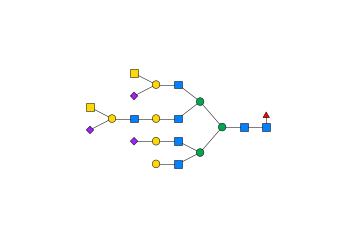

In [126]:
#Left context: all left sibling trees of the root of the match
#                (there's only one here)
#Right context: all right sibling trees of the root of the match (there are none here)
#               + the parent of the match root
#               + everything above parent(match root)
#               + everything below parent(parent(match root)) not in match or left context
analyze_match(0, plottable_matches_w_contexts)

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(
Match:
	ANb4)Ab4
Right context:
	GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


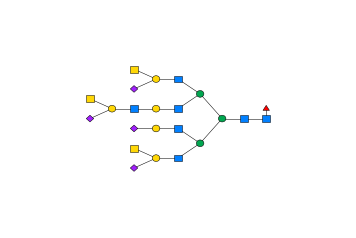

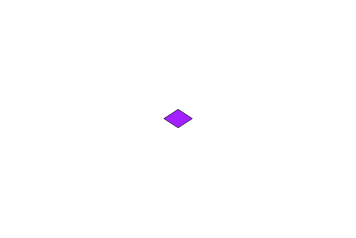

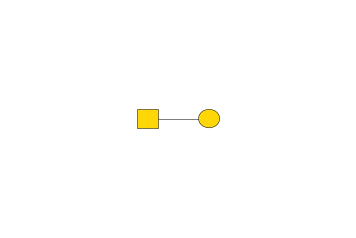

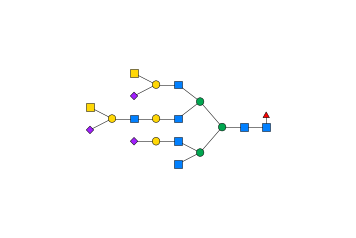

In [127]:
#because of the Israeli-notation/traversal of linear code,
# the left-context will always be ...

#Right context: all right sibling trees of the root of the match (there are none here)
#               + the parent of the match root
#               + everything above parent(match root)
#               + everything below parent(parent(match root)) not in match or left context

#Left context: all left sibling trees of the root of the match
#                (there's only one here)
#Right context: the parent of the match root,
#               + everything above parent(match root)
#               + everything below parent(match root) not in match or left context
analyze_match(1, plottable_matches_w_contexts)

('NNa3(',
 'ANb4)Ab4GNb2',
 '(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(
Match:
	ANb4)Ab4GNb2
Right context:
	(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


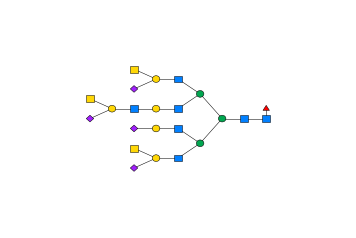

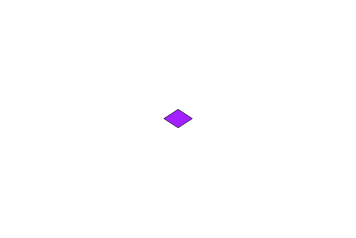

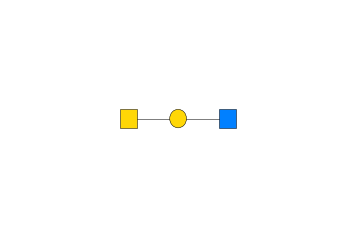

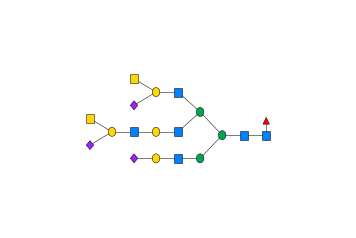

In [128]:
plottable_matches_w_contexts[2]
analyze_match(2, plottable_matches_w_contexts)

('NNa3(',
 'ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(
Match:
	ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3
Right context:
	(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


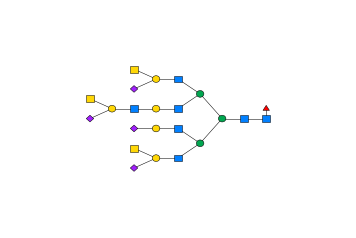

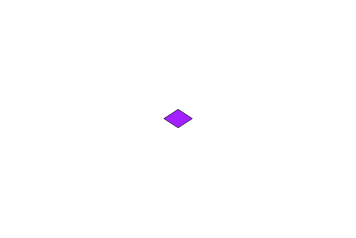

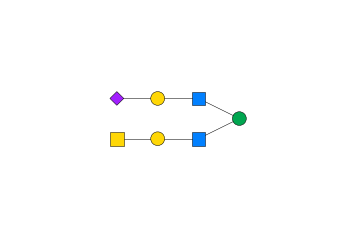

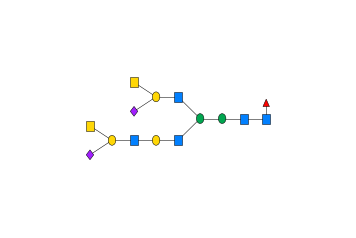

In [129]:
plottable_matches_w_contexts[3]
analyze_match(3, plottable_matches_w_contexts)

('NNa3(',
 'ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(
Match:
	ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4
Right context:
	GNb4(Fa6)GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


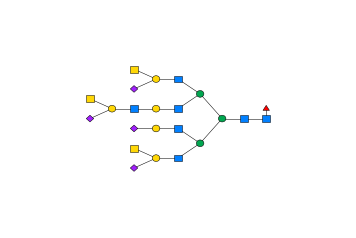

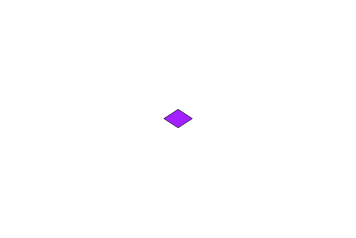

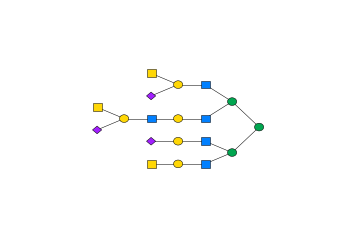

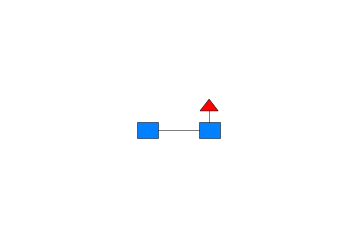

In [130]:
plottable_matches_w_contexts[4]
analyze_match(4, plottable_matches_w_contexts)

('NNa3(',
 'ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(
Match:
	ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4
Right context:
	(Fa6)GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


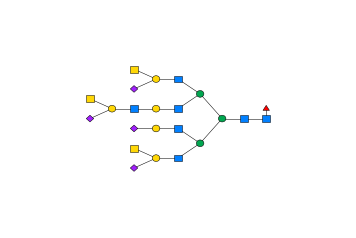

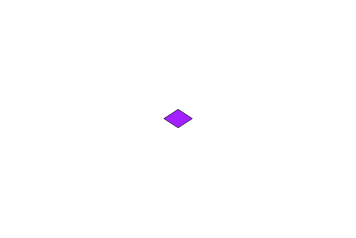

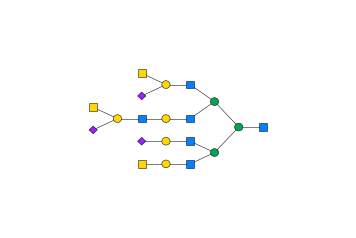

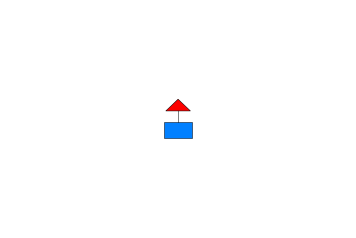

In [131]:
plottable_matches_w_contexts[5]
analyze_match(5, plottable_matches_w_contexts)

('NNa3(',
 'ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(
Match:
	ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Right context:
	
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


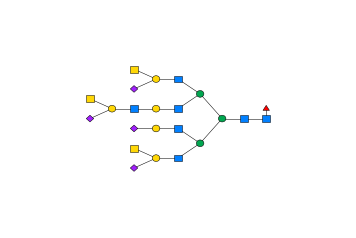

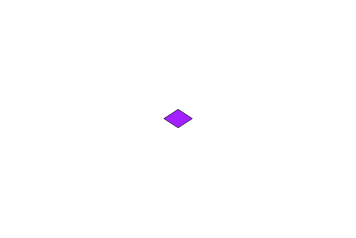

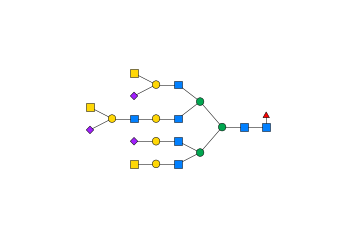

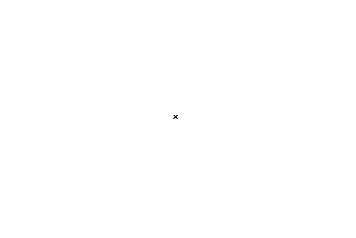

In [132]:
plottable_matches_w_contexts[6]
analyze_match(6, plottable_matches_w_contexts)

('NNa3(ANb4',
 ')',
 'Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4
Match:
	)
Right context:
	Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


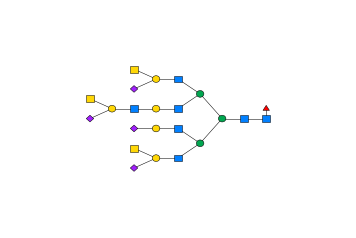

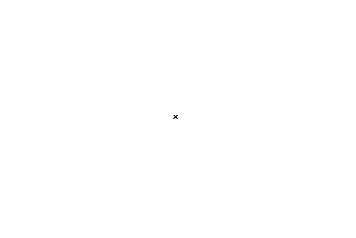

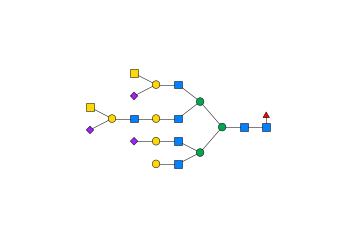

In [133]:
plottable_matches_w_contexts[7]
analyze_match(7, plottable_matches_w_contexts)

('NNa3(ANb4',
 ')Ab4',
 'GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4
Match:
	)Ab4
Right context:
	GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


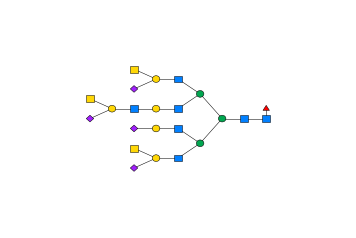

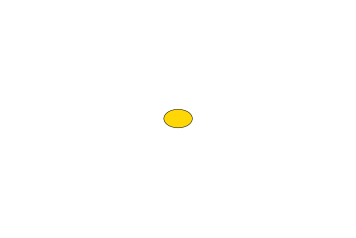

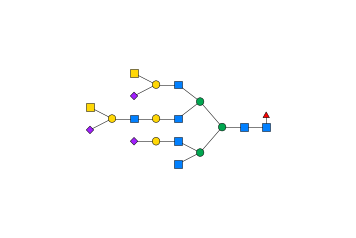

In [134]:
plottable_matches_w_contexts[8]
analyze_match(8, plottable_matches_w_contexts)

('NNa3(ANb4',
 ')Ab4GNb2',
 '(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4
Match:
	)Ab4GNb2
Right context:
	(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


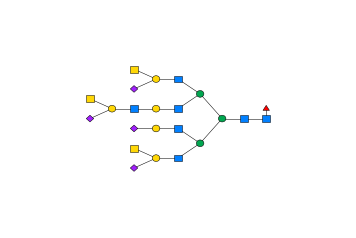

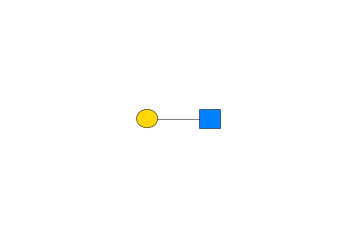

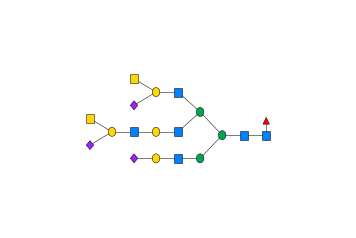

In [135]:
plottable_matches_w_contexts[9]
analyze_match(9, plottable_matches_w_contexts)

('NNa3(ANb4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4
Match:
	)Ab4GNb2(NNa6Ab4GNb4)Ma3
Right context:
	(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


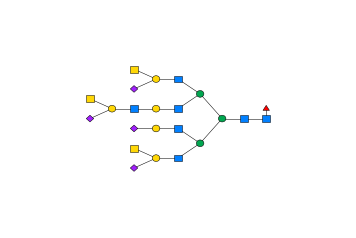

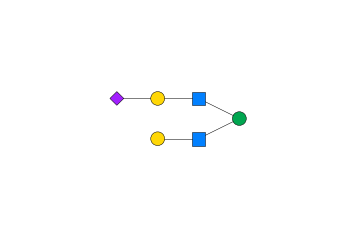

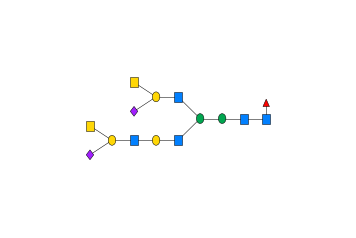

In [136]:
plottable_matches_w_contexts[10]
analyze_match(10, plottable_matches_w_contexts)

('NNa3(ANb4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4
Match:
	)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4
Right context:
	GNb4(Fa6)GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


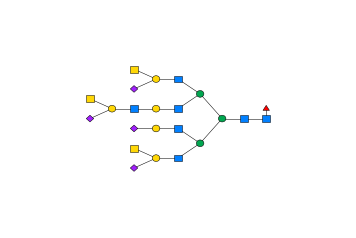

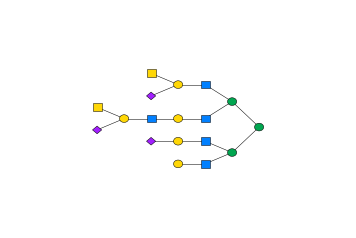

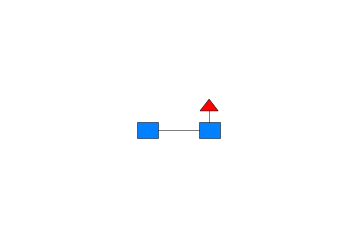

In [137]:
plottable_matches_w_contexts[11]
analyze_match(11, plottable_matches_w_contexts)

In [138]:
plottable_matches_w_contexts[11]
plottable_matches_w_contexts[12]

('NNa3(ANb4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'GNb4(Fa6)GN')

('NNa3(ANb4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(Fa6)GN')

('NNa3(ANb4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4
Match:
	)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4
Right context:
	(Fa6)GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


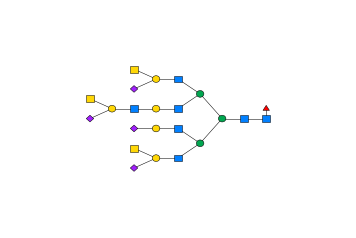

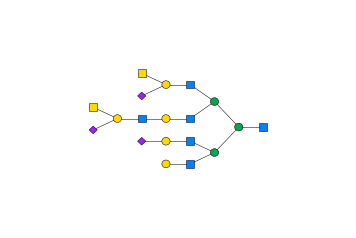

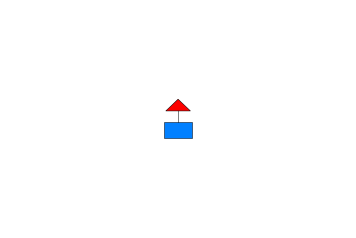

In [139]:
#this is dumb
plottable_matches_w_contexts[12]
analyze_match(12, plottable_matches_w_contexts)

In [140]:
plottable_matches_w_contexts[12]
plottable_matches_w_contexts[13]

('NNa3(ANb4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(Fa6)GN')

('NNa3(ANb4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '')

('NNa3(ANb4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4
Match:
	)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Right context:
	
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


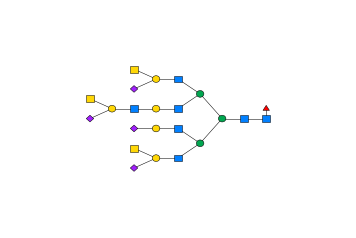

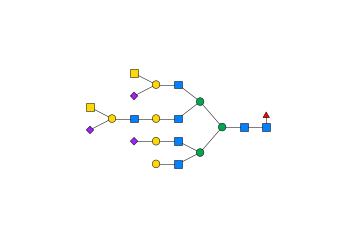

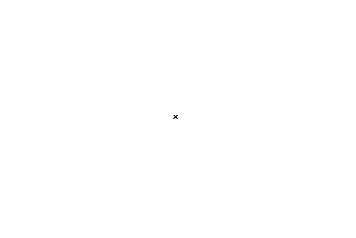

In [141]:
plottable_matches_w_contexts[13]
analyze_match(13, plottable_matches_w_contexts)

In [142]:
plottable_matches_w_contexts[13]
plottable_matches_w_contexts[14]

('NNa3(ANb4',
 ')Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '')

('NNa3(ANb4)Ab4GNb2(',
 'NNa6Ab4GNb4)',
 'Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(',
 'NNa6Ab4GNb4)',
 'Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4)Ab4GNb2(
Match:
	NNa6Ab4GNb4)
Right context:
	Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


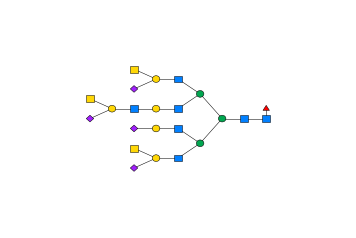

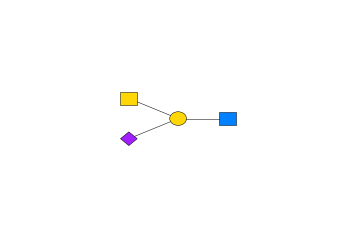

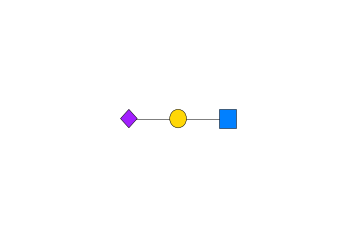

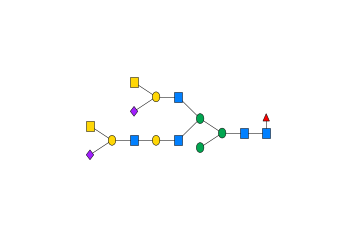

In [143]:
plottable_matches_w_contexts[14]
analyze_match(14, plottable_matches_w_contexts)

('NNa3(ANb4)Ab4GNb2(',
 'NNa6Ab4GNb4)Ma3',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4)Ab4GNb2(
Match:
	NNa6Ab4GNb4)Ma3
Right context:
	(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


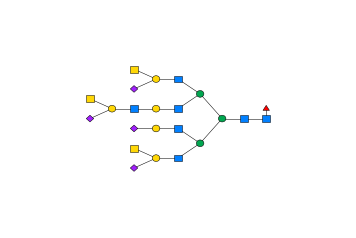

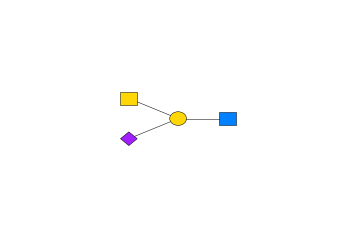

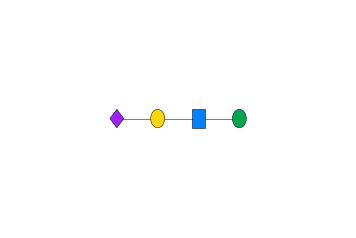

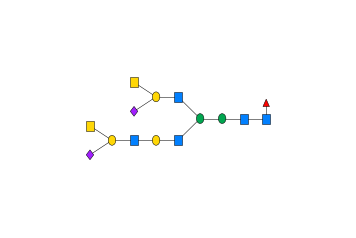

In [144]:
plottable_matches_w_contexts[15]
analyze_match(15, plottable_matches_w_contexts)

In [145]:
plottable_matches_w_contexts[15]
plottable_matches_w_contexts[16]
plottable_matches_w_contexts[17]
plottable_matches_w_contexts[18]
plottable_matches_w_contexts[19]

('NNa3(ANb4)Ab4GNb2(',
 'NNa6Ab4GNb4)Ma3',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(',
 'NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(',
 'NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(',
 'NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '')

('NNa3(ANb4)Ab4GNb2(NNa6',
 'Ab4GNb4)',
 'Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(',
 'NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4)Ab4GNb2(
Match:
	NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Right context:
	
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


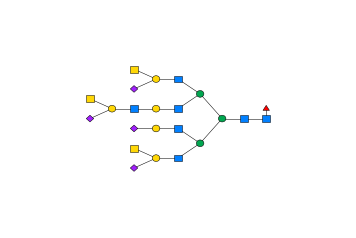

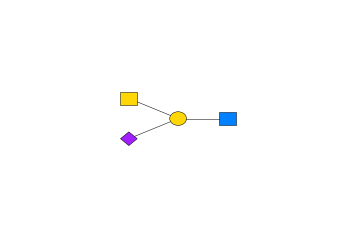

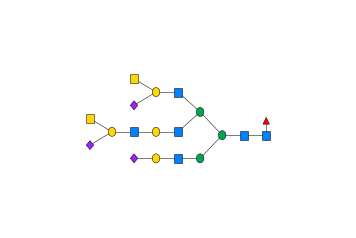

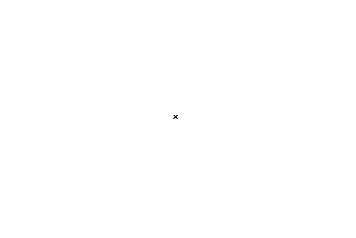

In [146]:
plottable_matches_w_contexts[18]
analyze_match(18, plottable_matches_w_contexts)

('NNa3(ANb4)Ab4GNb2(NNa6',
 'Ab4GNb4)',
 'Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4)Ab4GNb2(NNa6
Match:
	Ab4GNb4)
Right context:
	Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


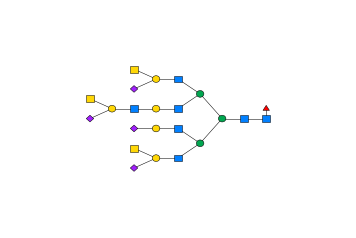

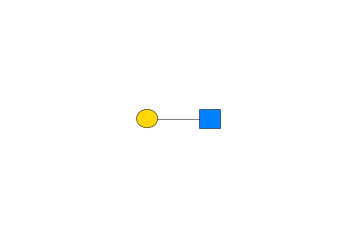

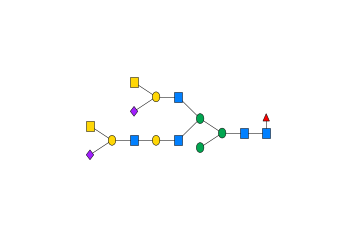

In [147]:
plottable_matches_w_contexts[19]
analyze_match(19, plottable_matches_w_contexts)

In [148]:
plottable_matches_w_contexts[19]
plottable_matches_w_contexts[20]
plottable_matches_w_contexts[21]
plottable_matches_w_contexts[22]
plottable_matches_w_contexts[23]
plottable_matches_w_contexts[24]

('NNa3(ANb4)Ab4GNb2(NNa6',
 'Ab4GNb4)',
 'Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6',
 'Ab4GNb4)Ma3',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6',
 'Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6',
 'Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6',
 'Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4',
 'GNb4)',
 'Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4',
 'GNb4)',
 'Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4
Match:
	GNb4)
Right context:
	Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


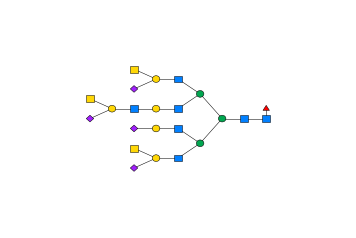

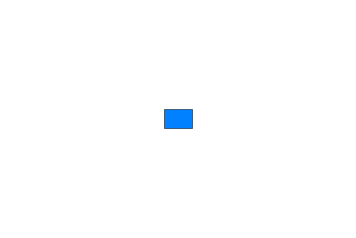

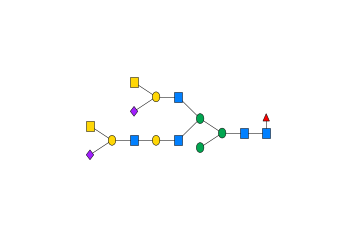

In [149]:
plottable_matches_w_contexts[24]
analyze_match(24, plottable_matches_w_contexts)

In [150]:
plottable_matches_w_contexts[24]
plottable_matches_w_contexts[25]

('NNa3(ANb4)Ab4GNb2(NNa6Ab4',
 'GNb4)',
 'Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4',
 'GNb4)Ma3',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4
Match:
	GNb4)Ma3
Right context:
	(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


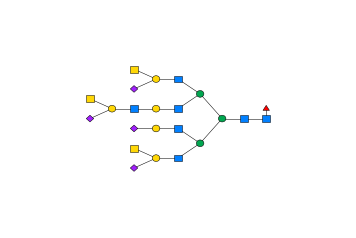

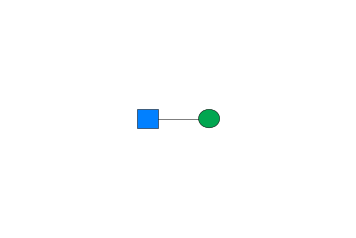

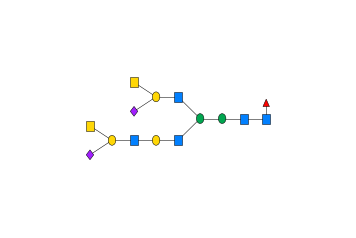

In [151]:
analyze_match(25, plottable_matches_w_contexts)

In [152]:
plottable_matches_w_contexts[25]
plottable_matches_w_contexts[26]
plottable_matches_w_contexts[27]
plottable_matches_w_contexts[28]
plottable_matches_w_contexts[29]
plottable_matches_w_contexts[30]

('NNa3(ANb4)Ab4GNb2(NNa6Ab4',
 'GNb4)Ma3',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4',
 'GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4',
 'GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4',
 'GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4',
 ')',
 'Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4',
 ')Ma3',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4',
 ')Ma3',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4
Match:
	)Ma3
Right context:
	(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


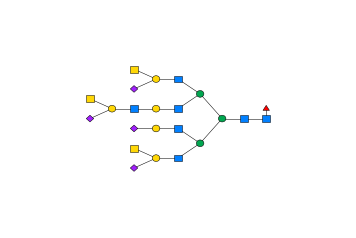

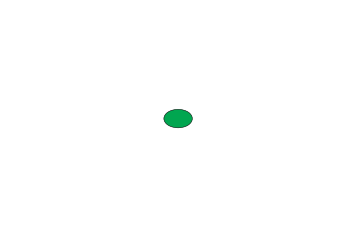

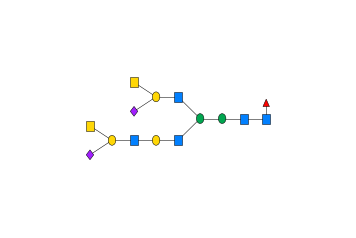

In [153]:
plottable_matches_w_contexts[30]
analyze_match(30, plottable_matches_w_contexts)

In [154]:
plottable_matches_w_contexts[31]
plottable_matches_w_contexts[32]
plottable_matches_w_contexts[33]
# analyze_match(30, plottable_matches_w_contexts)

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4',
 ')Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4',
 ')Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4',
 ')Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '')

In [155]:
plottable_matches_w_contexts[34]
plottable_matches_w_contexts[35]
plottable_matches_w_contexts[36]
# analyze_match(30, plottable_matches_w_contexts)

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(',
 'NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 'Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(',
 'NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(',
 'NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4',
 '(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(',
 'NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 'Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(
Match:
	NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)
Right context:
	Ma4GNb4(Fa6)GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


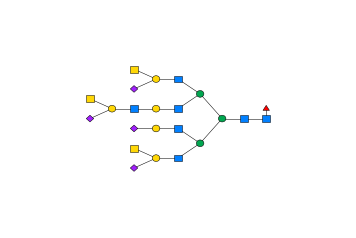

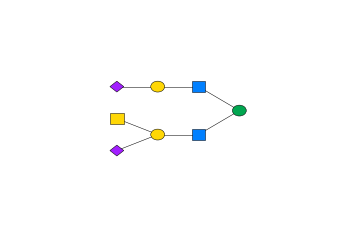

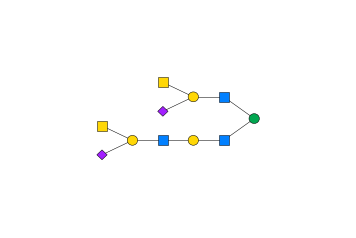

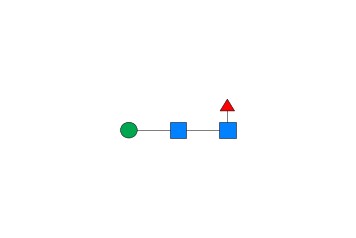

In [156]:
plottable_matches_w_contexts[34]
analyze_match(34, plottable_matches_w_contexts)

In [157]:
plottable_matches_w_contexts[37]
plottable_matches_w_contexts[38]
plottable_matches_w_contexts[39]
# analyze_match(30, plottable_matches_w_contexts)

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(',
 'NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN',
 '')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3',
 '(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 'Ma4GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3',
 '(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4',
 'GNb4(Fa6)GN')

('NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3',
 '(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 'Ma4GNb4(Fa6)GN')

Whole tree:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
Left context:
	NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3
Match:
	(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)
Right context:
	Ma4GNb4(Fa6)GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


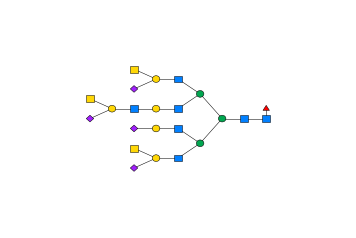

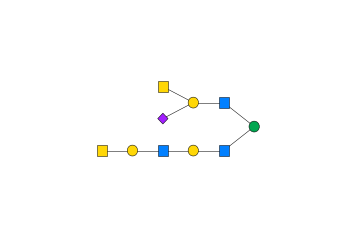

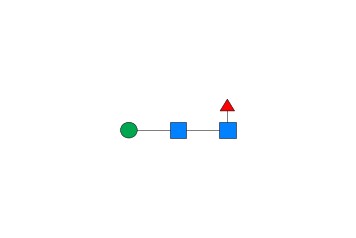

In [158]:
plottable_matches_w_contexts[38]
analyze_match(38, plottable_matches_w_contexts)

## Krambeck et al. 2009's `possible branch point` " | " uncertainty operator

According to Krambeck et al. 2009, `|` is supposed to match "Empty string or `(...)`" (Table 7).

BUT, according to the Glymmer manual, `|` is supposed to match "Empty string or `)` or `(...)` or `)(...)`" (Table 3)

In [159]:
def is_possible_branch_point_match(linear_code_expression):
    '''
    Indicates whether `linear_code_expression` (in its entirety) matches (i.e.
    could be substituted with/for) either `` or `(...)` or `)` or `)(...)`.
    '''
    s = linear_code_expression
    if len(s) == 0:
        return True
    if len(s) == 1 and s[0] == ')':
        return True
    
    if s[0] == ')' and is_possible_branch_point_match(s[1:]):
        return True

    left_edge_is_left_paren = s[0] == '('
    right_edge_is_right_paren = s[-1] == ')'
    center_matches_ligand = is_ligand_match(s[1:-1])
    return all([left_edge_is_left_paren, 
                right_edge_is_right_paren, 
                center_matches_ligand])

In [160]:
def get_possible_branch_point_matches(linear_code_expression, 
                                      as_generator=False, 
                                      with_contexts=False):
    '''
    Returns the nonempty substrings within `linear_code_expression` that match 
    Krambeck et al's `possible branch point` uncertainty operator `...`.
    '''
    s = linear_code_expression
    subsequences = generate_subsequences(list(tokenizer(s)), True, with_contexts)
#     subsequences = generate_subsequences(s, True)
    if as_generator:
        return (is_possible_branch_point_match(subseq) 
                for subseq in subsequences)
    else:
        return tuple(filter(is_possible_branch_point_match, subsequences))

'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'

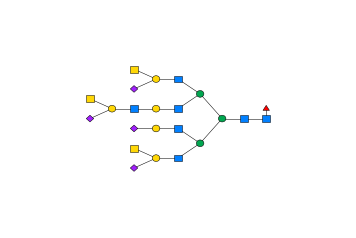

In [161]:
my_tree
parsePlot(my_tree)

In [162]:
my_possible_branch_point_matches, my_possible_branch_point_nonmatches = split(is_possible_branch_point_match, 
                                                                              generate_subsequences(tokenizer(my_tree)))

len(my_possible_branch_point_matches), len(my_possible_branch_point_nonmatches)

(14, 689)

In [163]:
my_possible_branch_point_matches

[['(', 'ANb4', ')'],
 [')'],
 ['(', 'NNa6', 'Ab4', 'GNb4', ')'],
 [')'],
 ['(',
  'NNa3',
  '(',
  'ANb4',
  ')',
  'Ab4',
  'GNb3',
  'Ab4',
  'GNb2',
  '(',
  'NNa3',
  '(',
  'ANb4',
  ')',
  'Ab4',
  'GNb6',
  ')',
  'Ma6',
  ')'],
 ['(', 'ANb4', ')'],
 [')'],
 ['(', 'NNa3', '(', 'ANb4', ')', 'Ab4', 'GNb6', ')'],
 ['(', 'ANb4', ')'],
 [')'],
 [')'],
 [')'],
 ['(', 'Fa6', ')'],
 [')']]

In [164]:
my_possible_branch_point_matches_lces = tuple(map(partial(str_join, ''),
                                                  my_possible_branch_point_matches))
my_possible_branch_point_matches_lces

('(ANb4)',
 ')',
 '(NNa6Ab4GNb4)',
 ')',
 '(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)',
 '(ANb4)',
 ')',
 '(NNa3(ANb4)Ab4GNb6)',
 '(ANb4)',
 ')',
 ')',
 ')',
 '(Fa6)',
 ')')

As you might expect from their definitions, every expression that matches the possible branch point operator also matches the ligand or continuation uncertainty operators, but the reverse is certainly not the case.

In [165]:
for each in my_possible_branch_point_matches_lces:
    print("{0} | {1}".format(each, each in ligand_unplottables))
    print("{0} | {1}".format(each, each in continuation_unplottables))

(ANb4) | True
(ANb4) | True
) | False
) | False
(NNa6Ab4GNb4) | True
(NNa6Ab4GNb4) | True
) | False
) | False
(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6) | True
(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6) | True
(ANb4) | True
(ANb4) | True
) | False
) | False
(NNa3(ANb4)Ab4GNb6) | True
(NNa3(ANb4)Ab4GNb6) | True
(ANb4) | True
(ANb4) | True
) | False
) | False
) | False
) | False
) | False
) | False
(Fa6) | True
(Fa6) | True
) | False
) | False


## Three-way comparison

'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN'

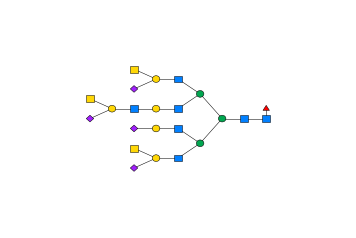

In [166]:
my_tree
parsePlot(my_tree)

In [167]:
my_subseqs = generate_subsequences(tokenizer(my_tree), 
                                   with_contexts=True)
len(my_subseqs)
print('Left, Match, Right')
for left, match, right in my_subseqs[90:95]:
    ls, ms, rs = tuple(map(partial(str_join, ''),
                           (left, match, right)))
    row_str = "{0}, {1}, {2}".format(ls, ms, rs)
    print(row_str)

703

Left, Match, Right
NNa3(, ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4, GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
NNa3(, ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2, (NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
NNa3(, ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(, NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
NNa3(, ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3, (ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN
NNa3(, ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(, ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN


In [168]:
type(my_subseqs[0])
len(my_subseqs[0])

tuple

3

In [169]:
def process_subsequence(lmr):
    center = lmr[1]
    return tuple(list(lmr) + [is_possible_branch_point_match(center)] + [is_ligand_match(center)] + [is_continuation_match(center)])

processed_subseqs = tuple(map(process_subsequence,
                              my_subseqs))

In [170]:
len(processed_subseqs)
print('Left, Match, Right, Possible_Branch_Point_Match?, Possible_Ligand_Match?, Possible_Continuation_Match?, Any_Uncertainty_Operator_Match?')
for left, match, right, pbp, pl, pc in processed_subseqs[90:95]:
    ls, ms, rs = tuple(map(partial(str_join, ''),
                           (left, match, right)))
    row_str = "{0}, {1}, {2}, {3}, {4}, {5}".format(ls, ms, rs, pbp, pl, pc)
    print(row_str)

703

Left, Match, Right, Possible_Branch_Point_Match?, Possible_Ligand_Match?, Possible_Continuation_Match?, Any_Uncertainty_Operator_Match?
NNa3(, ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4, GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN, False, False, False
NNa3(, ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2, (NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN, False, False, False
NNa3(, ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(, NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN, False, False, False
NNa3(, ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3, (ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN, False, False, False
NNa3(, ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(, ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN, False, False, False


In [172]:
len(processed_subseqs)
print('Left,Match,Right,Possible_Branch_Point_Match,Possible_Ligand_Match,Possible_Continuation_Match,Any_Uncertainty_Operator_Match')
for left, match, right, pbp, pl, pc in processed_subseqs:
    ls, ms, rs = tuple(map(partial(str_join, ''),
                           (left, match, right)))
    row_str = "{0},{1},{2},{3},{4},{5},{6}".format(ls, ms, rs, pbp, pl, pc, pbp or pl or pc)
    print(row_str)

703

Left,Match,Right,Possible_Branch_Point_Match,Possible_Ligand_Match,Possible_Continuation_Match,Any_Uncertainty_Operator_Match
,NNa3,(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,True,True,True
,NNa3(,ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,False,False,False
,NNa3(ANb4,)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,False,False,False
,NNa3(ANb4),Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,True,True,True
,NNa3(ANb4)Ab4,GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,True,True,True
,NNa3(ANb4)Ab4GNb2,(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,True,True,True
,NNa3(ANb4)Ab4GNb2(,NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,False,False,False
,NNa3(ANb4)Ab4GNb2(NNa6,Ab4GNb4)

In [188]:
with open('monster_matches.csv', 'w') as the_file:
#     len(processed_subseqs)
    the_file.write('Left,Match,Right,Possible_Branch_Point_Match,Possible_Ligand_Match,Possible_Continuation_Match,Any_Uncertainty_Operator_Match\n')
    for left, match, right, pbp, pl, pc in processed_subseqs:
        ls, ms, rs = tuple(map(partial(str_join, ''),
                               (left, match, right)))
        row_str = "{0},{1},{2},{3},{4},{5},{6}\n".format(ls, ms, rs, pbp, pl, pc, pbp or pl or pc)
        the_file.write(row_str)

In [189]:
!csvtk csv2md monster_matches.csv > monster_matches.md

In [190]:
subseqs_that_match_something = list(filter(lambda lmrblc: any(lmrblc[-3:]),
                                           processed_subseqs))
len(subseqs_that_match_something)
print('Left,Match,Right,Possible_Branch_Point_Match,Possible_Ligand_Match,Possible_Continuation_Match,Any_Uncertainty_Operator_Match')
for left, match, right, pbp, pl, pc in subseqs_that_match_something:
    ls, ms, rs = tuple(map(partial(str_join, ''),
                           (left, match, right)))
    row_str = "{0},{1},{2},{3},{4},{5},{6}".format(ls, ms, rs, pbp, pl, pc, pbp or pl or pc)
    if pbp or pl or pc:
        print(row_str)

298

Left,Match,Right,Possible_Branch_Point_Match,Possible_Ligand_Match,Possible_Continuation_Match,Any_Uncertainty_Operator_Match
,NNa3,(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,True,True,True
,NNa3(ANb4),Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,True,True,True
,NNa3(ANb4)Ab4,GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,True,True,True
,NNa3(ANb4)Ab4GNb2,(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,True,True,True
,NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4),Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,True,True,True
,NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3,(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN,False,True,True,True
,NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6),Ma4GNb4(Fa6)GN,False,True,True,True
,NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(A

In [191]:
subseqs_that_match_something = list(filter(lambda lmrblc: any(lmrblc[-3:]),
                                           processed_subseqs))
with open('monster_positive_matches.csv', 'w') as the_file:
    the_file.write('Left,Match,Right,Possible_Branch_Point_Match,Possible_Ligand_Match,Possible_Continuation_Match,Any_Uncertainty_Operator_Match\n')
    for left, match, right, pbp, pl, pc in subseqs_that_match_something:
        ls, ms, rs = tuple(map(partial(str_join, ''),
                               (left, match, right)))
        row_str = "{0},{1},{2},{3},{4},{5},{6}\n".format(ls, ms, rs, pbp, pl, pc, pbp or pl or pc)
        if pbp or pl or pc:
            the_file.write(row_str)

In [192]:
!csvtk csv2md monster_positive_matches.csv > monster_positive_matches.md

In [193]:
!python -m gregex 'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN' -o '|' -c | csvtk tab2csv -H -t | csvtk add-header -n Left,Match,Right > monster_possible_branch_point_matches.csv
!csvtk csv2md monster_possible_branch_point_matches.csv > monster_possible_branch_point_matches.md

!python -m gregex 'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN' -o '...' -c | csvtk tab2csv -H -t | csvtk add-header -n Left,Match,Right > monster_ligand_matches.csv
!csvtk csv2md monster_ligand_matches.csv > monster_ligand_matches.md

!python -m gregex 'NNa3(ANb4)Ab4GNb2(NNa6Ab4GNb4)Ma3(NNa3(ANb4)Ab4GNb3Ab4GNb2(NNa3(ANb4)Ab4GNb6)Ma6)Ma4GNb4(Fa6)GN' -o '_' -c | csvtk tab2csv -H -t | csvtk add-header -n Left,Match,Right > monster_continuation_matches.csv
!csvtk csv2md monster_continuation_matches.csv > monster_continuation_matches.md

In [194]:
!csvgrep -c Possible_Continuation_Match -m True monster_positive_matches.csv -c Possible_Ligand_Match -m False > monster_uniquely_continuation_matches.csv
!csvtk csv2md monster_uniquely_continuation_matches.csv > monster_uniquely_continuation_matches.md

# One-off example analysis

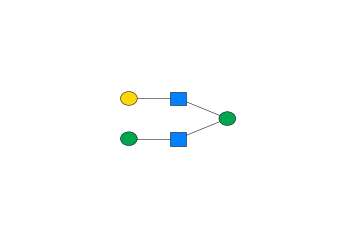

In [234]:
parsePlot('Mb4GNb2(Ab4GNb4)Ma3')

In [235]:
test_lce = 'Ab4GNb2(Ab4GNb4)Ma3'

In [238]:
!python -m gregex 'Ab4GNb2(Ab4GNb4)Ma3' -o '|' -c | csvtk tab2csv -H -t | csvtk add-header -n Left,Match,Right | csvtk csv2md

Left           |Match    |Right
:--------------|:--------|:----
Ab4GNb2        |(Ab4GNb4)|Ma3
Ab4GNb2(Ab4GNb4|)        |Ma3


In [226]:
print("'...' matches in:")
print(test_lce)
print('='*80)

test_ligand_matches_w_contexts, _ = split(lambda lmr: is_ligand_match(lmr[1]), 
                                          generate_subsequences(tokenizer(test_lce), 
                                                                with_contexts=True))
# test_ligand_matches_w_contexts[0][0]
# test_ligand_matches_w_contexts[0][1]
# test_ligand_matches_w_contexts[0][2]

# map(partial(str_join, ''), test_ligand_matches_w_contexts[0])
# print(str_join('\t', map(partial(str_join, ''), test_ligand_matches_w_contexts[0])))

len(test_ligand_matches_w_contexts)
print('Left\t\t\tMatch\t\t\tRight')
print('-'*80)
ligand_printables = map(lambda lmr: str_join('\t\t\t', map(partial(str_join, ''), 
                                                           lmr)), 
                        test_ligand_matches_w_contexts)
for each in ligand_printables: 
    print(each)

'...' matches in:
Ab4GNb2(Ab4GNb4)Ma3


13

Left			Match			Right
--------------------------------------------------------------------------------
			Ab4			GNb2(Ab4GNb4)Ma3
			Ab4GNb2			(Ab4GNb4)Ma3
			Ab4GNb2(Ab4GNb4)			Ma3
			Ab4GNb2(Ab4GNb4)Ma3			
Ab4			GNb2			(Ab4GNb4)Ma3
Ab4			GNb2(Ab4GNb4)			Ma3
Ab4			GNb2(Ab4GNb4)Ma3			
Ab4GNb2			(Ab4GNb4)			Ma3
Ab4GNb2			(Ab4GNb4)Ma3			
Ab4GNb2(			Ab4			GNb4)Ma3
Ab4GNb2(			Ab4GNb4			)Ma3
Ab4GNb2(Ab4			GNb4			)Ma3
Ab4GNb2(Ab4GNb4)			Ma3			


In [236]:
!python -m gregex 'Ab4GNb2(Ab4GNb4)Ma3' -o '...' -c | csvtk tab2csv -H -t | csvtk add-header -n Left,Match,Right | csvtk csv2md

Left            |Match              |Right
:---------------|:------------------|:---------------
                |Ab4                |GNb2(Ab4GNb4)Ma3
                |Ab4GNb2            |(Ab4GNb4)Ma3
                |Ab4GNb2(Ab4GNb4)   |Ma3
                |Ab4GNb2(Ab4GNb4)Ma3|
Ab4             |GNb2               |(Ab4GNb4)Ma3
Ab4             |GNb2(Ab4GNb4)      |Ma3
Ab4             |GNb2(Ab4GNb4)Ma3   |
Ab4GNb2         |(Ab4GNb4)          |Ma3
Ab4GNb2         |(Ab4GNb4)Ma3       |
Ab4GNb2(        |Ab4                |GNb4)Ma3
Ab4GNb2(        |Ab4GNb4            |)Ma3
Ab4GNb2(Ab4     |GNb4               |)Ma3
Ab4GNb2(Ab4GNb4)|Ma3                |


In [227]:
print("'_' matches in:")
print(test_lce)
print('='*80)

test_continuation_matches_w_contexts, _ = split(lambda lmr: is_continuation_match(lmr[1]), 
                                                generate_subsequences(tokenizer(test_lce), 
                                                                      with_contexts=True))
test_continuation_matches_w_contexts[:5]

len(test_continuation_matches_w_contexts)
print('Left\t\t\tMatch\t\t\tRight')
print('-'*80)
continuation_printables = map(lambda lmr: str_join('\t\t\t', map(partial(str_join, ''), 
                                                                 lmr)), 
                              test_continuation_matches_w_contexts)
for each in continuation_printables: 
    print(each)

'_' matches in:
Ab4GNb2(Ab4GNb4)Ma3


[([], ['Ab4'], ['GNb2', '(', 'Ab4', 'GNb4', ')', 'Ma3']),
 ([], ['Ab4', 'GNb2'], ['(', 'Ab4', 'GNb4', ')', 'Ma3']),
 ([], ['Ab4', 'GNb2', '(', 'Ab4', 'GNb4', ')'], ['Ma3']),
 ([], ['Ab4', 'GNb2', '(', 'Ab4', 'GNb4', ')', 'Ma3'], []),
 (['Ab4'], ['GNb2'], ['(', 'Ab4', 'GNb4', ')', 'Ma3'])]

19

Left			Match			Right
--------------------------------------------------------------------------------
			Ab4			GNb2(Ab4GNb4)Ma3
			Ab4GNb2			(Ab4GNb4)Ma3
			Ab4GNb2(Ab4GNb4)			Ma3
			Ab4GNb2(Ab4GNb4)Ma3			
Ab4			GNb2			(Ab4GNb4)Ma3
Ab4			GNb2(Ab4GNb4)			Ma3
Ab4			GNb2(Ab4GNb4)Ma3			
Ab4GNb2			(Ab4GNb4)			Ma3
Ab4GNb2			(Ab4GNb4)Ma3			
Ab4GNb2(			Ab4			GNb4)Ma3
Ab4GNb2(			Ab4GNb4			)Ma3
Ab4GNb2(			Ab4GNb4)			Ma3
Ab4GNb2(			Ab4GNb4)Ma3			
Ab4GNb2(Ab4			GNb4			)Ma3
Ab4GNb2(Ab4			GNb4)			Ma3
Ab4GNb2(Ab4			GNb4)Ma3			
Ab4GNb2(Ab4GNb4			)			Ma3
Ab4GNb2(Ab4GNb4			)Ma3			
Ab4GNb2(Ab4GNb4)			Ma3			


In [237]:
!python -m gregex 'Ab4GNb2(Ab4GNb4)Ma3' -o '_' -c | csvtk tab2csv -H -t | csvtk add-header -n Left,Match,Right | csvtk csv2md

Left            |Match              |Right
:---------------|:------------------|:---------------
                |Ab4                |GNb2(Ab4GNb4)Ma3
                |Ab4GNb2            |(Ab4GNb4)Ma3
                |Ab4GNb2(Ab4GNb4)   |Ma3
                |Ab4GNb2(Ab4GNb4)Ma3|
Ab4             |GNb2               |(Ab4GNb4)Ma3
Ab4             |GNb2(Ab4GNb4)      |Ma3
Ab4             |GNb2(Ab4GNb4)Ma3   |
Ab4GNb2         |(Ab4GNb4)          |Ma3
Ab4GNb2         |(Ab4GNb4)Ma3       |
Ab4GNb2(        |Ab4                |GNb4)Ma3
Ab4GNb2(        |Ab4GNb4            |)Ma3
Ab4GNb2(        |Ab4GNb4)           |Ma3
Ab4GNb2(        |Ab4GNb4)Ma3        |
Ab4GNb2(Ab4     |GNb4               |)Ma3
Ab4GNb2(Ab4     |GNb4)              |Ma3
Ab4GNb2(Ab4     |GNb4)Ma3           |
Ab4GNb2(Ab4GNb4 |)                  |Ma3
Ab4GNb2(Ab4GNb4 |)Ma3               |
Ab4GNb2(Ab4GNb4)|Ma3                |
